# Asset Selection Phase

In this notebook, we will begin by selecting the <b>stocks</b> we want to analyze, then retrieve their historical data in real-time. This data will be used to create our dataset, on which we will perform <b>clustering</b> and <b>classification</b>.

## I.Importing Libraries

We will begin by importing the necessary libraries for our analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt
import requests
import statistics
import ta
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import Ellipse
from sklearn.metrics import confusion_matrix, classification_report, f1_score

## II.Data Understanding

- We are using a CSV file that contains a list of existing stocks. Its purpose is solely to retrieve the symbols, making it easier to obtain the historical data for each stock by looping through them.

In [2]:
df_stocks = pd.read_csv("stocks_list.csv")

In [3]:
df_stocks

Symbol                                               Name Last Sale  \
0         A             Agilent Technologies Inc. Common Stock   $133.42   
1        AA                    Alcoa Corporation Common Stock     $34.53   
2      AACG   ATA Creativity Global American Depositary Shares     $0.65   
3      AACI            Armada Acquisition Corp. I Common Stock    $11.35   
4     AACIW                 Armada Acquisition Corp. I Warrant   $0.1448   
...     ...                                                ...       ...   
7077   ZVRA               Zevra Therapeutics Inc. Common Stock     $6.34   
7078   ZVSA             ZyVersa Therapeutics Inc. Common Stock     $3.86   
7079    ZWS  Zurn Elkay Water Solutions Corporation Common ...    $31.35   
7080   ZYME                        Zymeworks Inc. Common Stock    $10.26   
7081   ZYXI                            Zynex Inc. Common Stock    $10.15   

      Net Change % Change    Market Cap        Country  IPO Year   Volume  \
0         1.6400   1.244%  3.892674e+10  United States    1999.0  2009367   
1        -0.3900  -1.117%  6.200196e+09  United States    2016.0  6116269   
2        -0.0007  -0.108%  2.080008e+07          China    2008.0    21195   
3        -0.0400  -0.351%  0.000000e+00  United States    2021.0    15673   
4         0.0248  20.667%  0.000000e+00  United States    2021.0    52174   
...          ...      ...           ...            ...       ...      ...   
7077      0.2900   4.793%  2.653512e+08  United States       NaN   339052   
7078     -0.0500  -1.279%  3.222699e+06  United States    2022.0    54535   
7079      0.3900    1.26%  5.414046e+09  United States    2012.0   551722   
7080      0.4800   4.908%  7.254322e+08  United States       NaN   763023   
7081      0.0500   0.495%  3.225181e+08  United States       NaN   179550   

           Sector                                           Industry  
0     Industrials   Biotechnology: Laboratory Analytical Instruments  
1     Industrials                                           Aluminum  
2     Real Estate                            Other Consumer Services  
3         Finance                                       Blank Checks  
4         Finance                                       Blank Checks  
...           ...                                                ...  
7077  Health Care         Biotechnology: Pharmaceutical Preparations  
7078  Health Care         Biotechnology: Pharmaceutical Preparations  
7079  Industrials                    Industrial Machinery/Components  
7080  Health Care         Biotechnology: Pharmaceutical Preparations  
7081  Health Care  Biotechnology: Electromedical & Electrotherape...  

[7082 rows x 11 columns]

In [4]:
df_stocks = df_stocks[['Symbol','Market Cap','Net Change']]

In [5]:
df_stocks

Symbol    Market Cap  Net Change
0         A  3.892674e+10      1.6400
1        AA  6.200196e+09     -0.3900
2      AACG  2.080008e+07     -0.0007
3      AACI  0.000000e+00     -0.0400
4     AACIW  0.000000e+00      0.0248
...     ...           ...         ...
7077   ZVRA  2.653512e+08      0.2900
7078   ZVSA  3.222699e+06     -0.0500
7079    ZWS  5.414046e+09      0.3900
7080   ZYME  7.254322e+08      0.4800
7081   ZYXI  3.225181e+08      0.0500

[7082 rows x 3 columns]

- This code retrieves historical data for up to <b>60 selected stocks</b> from a list. 
It iterates through the list of stock symbols, downloads data for each symbol 
from January 1, 2019, to august 12, 2024 using the <b>yfinance library</b>, and stores 
the data in a list. If data is unavailable for a symbol, it skips that symbol and 
continues until 60 valid stocks are selected.

In [6]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2024, 8, 12)

stocks = df_stocks['Symbol'].tolist()

num_symbols_to_take = 60 
selected_stocks = []
dfs = []

i = 0
while len(selected_stocks) < num_symbols_to_take and i < len(stocks):
    company = stocks[i]
    try:
        data = yf.download(company, start=start, end=end)
        if not data.empty:
            selected_stocks.append(company)
            dfs.append(data)
        else:
            print(f"No data for symbol: {company}")
    except Exception as e:
        print(f"Error downloading data for symbol: {company}. Error: {e}")
    i += 1

print(f"Selected stocks: {selected_stocks}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AACIW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed


No data for symbol: AACIW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAGRW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed


No data for symbol: AAGRW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

No data for symbol: ABLLW



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABR^D']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


No data for symbol: ABR^D


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABR^E']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


No data for symbol: ABR^E


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABR^F']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

No data for symbol: ABR^F



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABVEW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


No data for symbol: ABVEW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ACACW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


No data for symbol: ACACW


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Selected stocks: ['A', 'AA', 'AACG', 'AACI', 'AACT', 'AADI', 'AAGR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AB', 'ABAT', 'ABBV', 'ABCB', 'ABCL', 'ABEO', 'ABEV', 'ABG', 'ABIO', 'ABL', 'ABLLL', 'ABLV', 'ABM', 'ABNB', 'ABOS', 'ABR', 'ABSI', 'ABT', 'ABTS', 'ABUS', 'ABVC', 'ABVE', 'ABVX', 'AC', 'ACA', 'ACAB', 'ACAC', 'ACAD', 'ACB', 'ACCD', 'ACCO', 'ACDC', 'ACEL', 'ACET', 'ACGL', 'ACGLN', 'ACGLO', 'ACHC', 'ACHL', 'ACHR', 'ACHV', 'ACI', 'ACIC', 'ACIU']


In [7]:
dfs_yf = []

for i in range(0,num_symbols_to_take):
    dfs_yf.append(dfs[i])

In [8]:
print("#"*80)
for i in range(0,num_symbols_to_take):
    print("Stock : ",selected_stocks[i])
    display(dfs[i])
    print("#"*80)

################################################################################
Stock :  A


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   66.500000   66.570000   65.300003   65.690002   63.161690   
2019-01-03   65.529999   65.779999   62.000000   63.270000   60.834827   
2019-01-04   64.089996   65.949997   64.089996   65.459999   62.940540   
2019-01-07   65.639999   67.430000   65.610001   66.849998   64.277031   
2019-01-08   67.589996   68.209999   66.699997   67.830002   65.219337   
...                ...         ...         ...         ...         ...   
2024-08-05  136.550003  136.820007  133.059998  134.699997  134.699997   
2024-08-06  135.419998  138.919998  134.270004  136.259995  136.259995   
2024-08-07  137.250000  138.089996  133.690002  133.960007  133.960007   
2024-08-08  134.149994  137.220001  133.779999  136.759995  136.759995   
2024-08-09  136.839996  137.860001  136.100006  136.899994  136.899994   

             Volume  
Date                 
2019-01-02  2113300  
2019-01-03  5383900  
2019-01-04  3123700  
2019-01-07  3235100  
2019-01-08  1578100  
...             ...  
2024-08-05  1885200  
2024-08-06  1462000  
2024-08-07  1553900  
2024-08-08   976900  
2024-08-09   737600  

[1411 rows x 6 columns]

################################################################################
Stock :  AA


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  25.955000  26.847000  25.480000  26.240000  25.445902   3067000
2019-01-03  26.120001  26.850000  25.530001  26.240000  25.445902   2979900
2019-01-04  26.840000  28.610001  26.650000  28.340000  27.482351   5653300
2019-01-07  28.530001  28.910000  28.146000  28.420000  27.559929   2441000
2019-01-08  28.730000  28.847000  27.650000  28.250000  27.395079   2218300
...               ...        ...        ...        ...        ...       ...
2024-08-05  27.980000  28.540001  27.120001  28.440001  28.346939  13153600
2024-08-06  28.500000  29.639999  28.200001  29.389999  29.293829  13447200
2024-08-07  30.000000  30.520000  28.930000  29.209999  29.114418   9780600
2024-08-08  29.610001  30.660000  29.549999  30.629999  30.529770   6061000
2024-08-09  31.260000  31.260000  30.389999  30.559999  30.459999   7073600

[1411 rows x 6 columns]

################################################################################
Stock :  AACG


Open  High   Low  Close  Adj Close  Volume
Date                                                  
2019-01-02  0.91  1.00  0.90   0.94       0.94   30600
2019-01-03  0.99  1.00  0.94   0.94       0.94   43300
2019-01-04  0.98  1.00  0.93   0.93       0.93    6900
2019-01-07  0.93  0.98  0.93   0.94       0.94   21600
2019-01-08  0.97  1.00  0.94   0.99       0.99   15000
...          ...   ...   ...    ...        ...     ...
2024-08-05  0.61  0.66  0.61   0.65       0.65    4600
2024-08-06  0.65  0.66  0.65   0.66       0.66    4900
2024-08-07  0.66  0.66  0.64   0.65       0.65   22000
2024-08-08  0.60  0.64  0.60   0.64       0.64   28100
2024-08-09  0.68  0.68  0.64   0.66       0.66    5800

[1411 rows x 6 columns]

################################################################################
Stock :  AACI


Open     High    Low  Close  Adj Close  Volume
Date                                                       
2021-11-10   9.77   9.7800   9.75   9.75       9.75  373293
2021-11-11   9.76   9.8200   9.75   9.78       9.78   24405
2021-11-12   9.78   9.8000   9.72   9.75       9.75  943316
2021-11-15   9.78   9.7900   9.73   9.79       9.79   13630
2021-11-16   9.75   9.7800   9.73   9.75       9.75  190750
...           ...      ...    ...    ...        ...     ...
2024-08-05   9.79  11.0000   9.49  11.00      11.00   29921
2024-08-06  10.89  14.5001  10.88  13.86      13.86  101850
2024-08-07  13.63  13.6300  10.60  10.60      10.60   29623
2024-08-08  10.77  12.5000   9.52  10.30      10.30   88668
2024-08-09  10.42  12.2000   8.70  11.39      11.39   63029

[690 rows x 6 columns]

################################################################################
Stock :  AACT


Open    High     Low   Close  Adj Close   Volume
Date                                                         
2023-06-13  10.14  10.140  10.110  10.110     10.110     5500
2023-06-14  10.11  10.130  10.095  10.100     10.100   143900
2023-06-15  10.11  10.110  10.100  10.110     10.110  2061100
2023-06-16  10.12  10.120  10.110  10.110     10.110   251000
2023-06-20  10.13  10.130  10.110  10.120     10.120   102800
...           ...     ...     ...     ...        ...      ...
2024-08-05  10.73  10.740  10.730  10.740     10.740    81300
2024-08-06  10.73  10.760  10.730  10.740     10.740   278300
2024-08-07  10.75  10.755  10.745  10.745     10.745     3800
2024-08-08  10.75  10.760  10.730  10.730     10.730    30400
2024-08-09  10.74  10.750  10.740  10.740     10.740   110200

[292 rows x 6 columns]

################################################################################
Stock :  AADI


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  26.400000  30.600000  26.400000  29.850000  29.850000    5640
2019-01-03  30.450001  32.250000  28.500000  31.049999  31.049999    5187
2019-01-04  32.250000  32.250000  31.049999  31.875000  31.875000    4660
2019-01-07  32.250000  33.450001  30.900000  31.950001  31.950001    5867
2019-01-08  32.250000  36.599998  30.180000  36.000000  36.000000    9260
...               ...        ...        ...        ...        ...     ...
2024-08-05   1.350000   1.420000   1.310000   1.380000   1.380000  108100
2024-08-06   1.410000   1.410000   1.370000   1.400000   1.400000   62600
2024-08-07   1.440000   1.470000   1.340000   1.350000   1.350000  125900
2024-08-08   1.390000   1.410000   1.210000   1.350000   1.350000  250300
2024-08-09   1.360000   1.410000   1.330000   1.390000   1.390000   86000

[1411 rows x 6 columns]

################################################################################
Stock :  AAGR


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-10-05  6.860215  7.025090  6.860215  7.025090   7.025090  800312
2021-10-06  6.939068  7.010753  6.936918  7.000000   7.000000  125690
2021-10-07  6.996416  7.025090  6.974910  6.996416   6.996416  420732
2021-10-08  6.977061  7.017921  6.977061  6.989247   6.989247   33201
2021-10-11  6.989247  6.996416  6.974910  6.989247   6.989247   54266
...              ...       ...       ...       ...        ...     ...
2024-08-05  0.133000  0.135000  0.121000  0.124000   0.124000  384500
2024-08-06  0.129000  0.135000  0.124000  0.135000   0.135000  351200
2024-08-07  0.140000  0.143000  0.135000  0.137000   0.137000  151600
2024-08-08  0.138000  0.150000  0.137000  0.139000   0.139000  289700
2024-08-09  0.137000  0.143000  0.132000  0.140000   0.140000  187500

[716 rows x 6 columns]

################################################################################
Stock :  AAL


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  31.459999  32.650002  31.049999  32.480000  31.963158   5229500
2019-01-03  31.690001  31.850000  28.809999  30.059999  29.581663  16822000
2019-01-04  30.440001  32.090000  30.400000  32.040001  31.530159   9369600
2019-01-07  31.990000  33.480000  31.240000  32.950001  32.425678   8010700
2019-01-08  33.360001  33.650002  32.200001  32.419998  31.904114   7107700
...               ...        ...        ...        ...        ...       ...
2024-08-05   9.100000   9.590000   9.070000   9.280000   9.280000  44554500
2024-08-06   9.460000   9.530000   9.220000   9.310000   9.310000  28905900
2024-08-07   9.400000   9.520000   9.210000   9.260000   9.260000  29020900
2024-08-08   9.350000   9.910000   9.350000   9.890000   9.890000  34701800
2024-08-09   9.890000   9.960000   9.720000   9.860000   9.860000  22614800

[1411 rows x 6 columns]

################################################################################
Stock :  AAMC


Open       High       Low     Close  Adj Close  Volume
Date                                                                  
2022-03-21  9.935294  11.000000  8.235294  9.264706   9.264706  123760
2022-03-22  8.655882  10.247059  8.352941  8.647059   8.647059  143820
2022-03-23  8.764706   9.352941  8.147059  8.264706   8.264706  102170
2022-03-24  8.326471   8.558824  8.294118  8.394118   8.394118   12580
2022-03-25  8.352941   9.250000  8.352941  8.958824   8.958824   56610
...              ...        ...       ...       ...        ...     ...
2024-08-05  3.390000   3.390000  3.000000  3.270000   3.270000   11500
2024-08-06  3.060000   3.500000  2.930000  2.970000   2.970000   13100
2024-08-07  2.930000   3.300000  2.860000  3.000000   3.000000    6500
2024-08-08  2.830000   3.150000  2.762000  3.080000   3.080000    8800
2024-08-09  2.950000   3.000000  2.810000  2.950000   2.950000    6800

[601 rows x 6 columns]

################################################################################
Stock :  AAME


Open  High   Low  Close  Adj Close  Volume
Date                                                  
2019-01-02  2.43  2.49  2.43   2.49   2.395549    1800
2019-01-03  2.51  2.72  2.50   2.65   2.549480    6900
2019-01-04  2.65  3.06  2.65   2.95   2.838101    1300
2019-01-07  2.41  3.06  2.41   2.77   2.664929    2600
2019-01-08  2.89  2.89  2.43   2.65   2.549480    6200
...          ...   ...   ...    ...        ...     ...
2024-08-05  1.56  1.56  1.56   1.56   1.560000     400
2024-08-06  1.49  1.57  1.49   1.52   1.520000   12900
2024-08-07  1.57  1.57  1.57   1.57   1.570000     400
2024-08-08  1.53  1.60  1.51   1.52   1.520000    2600
2024-08-09  1.51  1.51  1.51   1.51   1.510000     300

[1411 rows x 6 columns]

################################################################################
Stock :  AAN


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-11-25  30.000000  31.000000  26.500000  26.500000  23.394470     1200
2020-11-27  26.350000  26.350000  22.299999  22.299999  19.686668     5200
2020-11-30  23.288000  23.500000  19.190001  19.190001  16.941130    65100
2020-12-01  21.700001  22.110001  16.740000  18.410000  16.252539  8782600
2020-12-02  18.129999  18.600000  17.260000  18.250000  16.111282  2105400
...               ...        ...        ...        ...        ...      ...
2024-08-05   9.960000  10.020000   9.950000   9.970000   9.970000  1225200
2024-08-06   9.960000  10.090000   9.950000  10.040000  10.040000   747400
2024-08-07  10.000000  10.060000   9.990000  10.000000  10.000000   590200
2024-08-08  10.040000  10.040000  10.000000  10.020000  10.020000   214900
2024-08-09  10.010000  10.020000  10.000000  10.020000  10.020000   738500

[931 rows x 6 columns]

################################################################################
Stock :  AAOI


Open       High     Low  Close  Adj Close   Volume
Date                                                           
2019-01-02  15.00  16.290001  14.850  15.88      15.88   478300
2019-01-03  15.51  15.800000  15.015  15.06      15.06   398400
2019-01-04  15.33  15.770000  15.160  15.54      15.54   765400
2019-01-07  15.68  16.033001  15.330  15.68      15.68   546300
2019-01-08  15.90  16.389999  15.770  16.01      16.01   477500
...           ...        ...     ...    ...        ...      ...
2024-08-05   6.89   7.320000   6.700   6.97       6.97  1953700
2024-08-06   7.17   7.740000   6.800   7.29       7.29  3421600
2024-08-07   8.30   8.690000   6.860   6.87       6.87  4188400
2024-08-08   7.05   8.570000   7.040   8.57       8.57  2652600
2024-08-09   8.60   8.640000   7.600   7.74       7.74  2343500

[1411 rows x 6 columns]

################################################################################
Stock :  AAON


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  23.046667  23.600000  22.913334  23.379999  22.643106  187200
2019-01-03  23.299999  23.386667  22.346666  22.513332  21.803757  247500
2019-01-04  22.879999  23.866667  22.806667  23.740000  22.991760  368550
2019-01-07  23.733334  24.213333  23.453333  24.100000  23.340420  171000
2019-01-08  24.366667  24.606667  23.926666  24.219999  23.456633  212250
...               ...        ...        ...        ...        ...     ...
2024-08-05  82.300003  86.279999  79.650002  85.470001  85.470001  728600
2024-08-06  86.000000  87.800003  85.110001  86.269997  86.269997  493800
2024-08-07  87.660004  89.190002  85.260002  85.919998  85.919998  484200
2024-08-08  87.139999  87.919998  85.459999  86.070000  86.070000  471300
2024-08-09  86.089996  87.930000  84.980003  86.669998  86.669998  533300

[1411 rows x 6 columns]

################################################################################
Stock :  AAP


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  156.160004  159.919998  153.820007  157.919998  143.991577   
2019-01-03  158.229996  164.070007  157.740005  162.850006  148.486786   
2019-01-04  164.169998  164.500000  158.479996  158.809998  144.803116   
2019-01-07  161.679993  163.570007  156.830002  161.139999  146.927612   
2019-01-08  162.009995  162.949997  157.179993  160.020004  145.906403   
...                ...         ...         ...         ...         ...   
2024-08-05   58.349998   59.580002   57.020000   58.860001   58.860001   
2024-08-06   58.360001   59.529999   57.480000   58.220001   58.220001   
2024-08-07   59.139999   60.580002   58.590000   58.990002   58.990002   
2024-08-08   59.099998   61.099998   59.000000   60.919998   60.919998   
2024-08-09   61.330002   61.330002   59.919998   60.209999   60.209999   

             Volume  
Date                 
2019-01-02  1291000  
2019-01-03  1514700  
2019-01-04  1423000  
2019-01-07  2088300  
2019-01-08  1604700  
...             ...  
2024-08-05  1453200  
2024-08-06  1052200  
2024-08-07  1296000  
2024-08-08  1251700  
2024-08-09   867500  

[1411 rows x 6 columns]

################################################################################
Stock :  AAPL


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.750080   
2019-01-03   35.994999   36.430000   35.500000   35.547501   33.989906   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.440899   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.362019   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.036121   
...                ...         ...         ...         ...         ...   
2024-08-05  199.089996  213.500000  196.000000  209.270004  209.028061   
2024-08-06  205.300003  209.990005  201.070007  207.229996  206.990402   
2024-08-07  206.899994  213.639999  206.389999  209.820007  209.577423   
2024-08-08  213.110001  214.199997  208.830002  213.309998  213.063385   
2024-08-09  212.100006  216.779999  211.970001  216.240005  215.990005   

               Volume  
Date                   
2019-01-02  148158800  
2019-01-03  365248800  
2019-01-04  234428400  
2019-01-07  219111200  
2019-01-08  164101200  
...               ...  
2024-08-05  119548600  
2024-08-06   69660500  
2024-08-07   63516400  
2024-08-08   47161100  
2024-08-09   42201600  

[1411 rows x 6 columns]

################################################################################
Stock :  AAT


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  39.689999  39.689999  38.939999  39.299999  31.443975  235000
2019-01-03  39.369999  39.959999  39.040001  39.310001  31.451975  166400
2019-01-04  39.509998  40.070000  39.220001  39.630001  31.708015  240000
2019-01-07  39.820000  40.619999  39.750000  40.250000  32.204079  191300
2019-01-08  40.400002  41.230000  40.400002  41.080002  32.868164  324700
...               ...        ...        ...        ...        ...     ...
2024-08-05  24.770000  25.190001  24.309999  24.510000  24.510000  266600
2024-08-06  24.490000  25.799999  24.469999  25.510000  25.510000  304100
2024-08-07  25.740000  25.980000  25.070000  25.290001  25.290001  331800
2024-08-08  25.400000  25.670000  25.120001  25.219999  25.219999  249200
2024-08-09  25.219999  25.270000  24.950001  25.129999  25.129999  143200

[1411 rows x 6 columns]

################################################################################
Stock :  AB


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  26.959999  28.049999  26.910000  27.270000  16.823790  859500
2019-01-03  27.230000  28.000000  26.969999  27.469999  16.947178  532200
2019-01-04  27.940001  28.670000  27.900000  28.100000  17.335848  504100
2019-01-07  28.090000  28.540001  27.799999  27.959999  17.249475  492500
2019-01-08  28.219999  28.450001  27.799999  28.100000  17.335848  497400
...               ...        ...        ...        ...        ...     ...
2024-08-05  32.419998  32.740002  30.570000  31.870001  31.870001  884400
2024-08-06  31.809999  32.900002  31.809999  32.740002  32.740002  286200
2024-08-07  33.299999  33.630001  32.700001  32.880001  32.880001  350800
2024-08-08  33.200001  33.320000  32.599998  33.080002  33.080002  244800
2024-08-09  33.200001  33.480000  33.000000  33.290001  33.290001  188100

[1411 rows x 6 columns]

################################################################################
Stock :  ABAT


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-02  4.425  4.800  4.185  4.395      4.395   38360
2019-01-03  4.500  4.500  4.200  4.485      4.485   19153
2019-01-04  4.920  5.250  4.500  4.950      4.950   54580
2019-01-07  5.085  5.385  4.815  5.385      5.385   37600
2019-01-08  5.385  5.685  5.025  5.175      5.175   68200
...           ...    ...    ...    ...        ...     ...
2024-08-05  0.931  1.020  0.750  1.020      1.020  459000
2024-08-06  1.000  1.050  0.970  0.998      0.998  386600
2024-08-07  0.997  1.034  0.966  0.975      0.975  225400
2024-08-08  1.000  1.020  0.980  1.000      1.000  137000
2024-08-09  1.000  1.020  1.000  1.010      1.010  122400

[1411 rows x 6 columns]

################################################################################
Stock :  ABBV


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   91.239998   91.260002   88.419998   89.230003   68.699379   
2019-01-03   88.639999   88.800003   86.080002   86.290001   66.435837   
2019-01-04   87.750000   89.139999   86.269997   89.070000   68.576187   
2019-01-07   90.070000   90.760002   89.199997   90.370003   69.577080   
2019-01-08   91.199997   92.300003   90.400002   90.790001   69.900444   
...                ...         ...         ...         ...         ...   
2024-08-05  187.449997  189.289993  183.039993  184.360001  184.360001   
2024-08-06  185.429993  187.820007  183.080002  185.710007  185.710007   
2024-08-07  187.899994  189.589996  185.979996  187.509995  187.509995   
2024-08-08  186.919998  190.710007  186.919998  190.399994  190.399994   
2024-08-09  190.779999  191.009995  188.100006  189.929993  189.929993   

             Volume  
Date                 
2019-01-02  6908400  
2019-01-03  7653200  
2019-01-04  8910600  
2019-01-07  7281500  
2019-01-08  7478300  
...             ...  
2024-08-05  6459300  
2024-08-06  4273200  
2024-08-07  6351000  
2024-08-08  5744600  
2024-08-09  3206500  

[1411 rows x 6 columns]

################################################################################
Stock :  ABCB


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  31.270000  32.549999  31.270000  31.950001  29.379932  488700
2019-01-03  31.730000  32.470001  31.420000  31.840000  29.278782  434500
2019-01-04  32.310001  33.200001  32.070000  33.080002  30.419037  316500
2019-01-07  33.200001  34.450001  32.869999  34.389999  31.623657  581500
2019-01-08  34.849998  34.889999  33.570000  34.310001  31.550087  339300
...               ...        ...        ...        ...        ...     ...
2024-08-05  53.650002  55.439999  52.810001  55.130001  55.130001  451000
2024-08-06  54.959999  56.490002  54.770000  55.970001  55.970001  371800
2024-08-07  56.919998  57.480000  55.150002  55.400002  55.400002  224500
2024-08-08  56.169998  56.849998  55.650002  56.720001  56.720001  209400
2024-08-09  56.410000  56.660000  55.660000  56.259998  56.259998  271000

[1411 rows x 6 columns]

################################################################################
Stock :  ABCL


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-12-11  61.000000  71.910004  48.980000  58.900002  58.900002  9249200
2020-12-14  56.925999  60.691002  50.000000  50.009998  50.009998  1487300
2020-12-15  50.810001  52.209999  45.259998  46.990002  46.990002  3958000
2020-12-16  47.130001  49.730000  42.150002  47.529999  47.529999  1688700
2020-12-17  48.540001  50.500000  48.139999  48.599998  48.599998   636300
...               ...        ...        ...        ...        ...      ...
2024-08-05   2.690000   2.810000   2.650000   2.760000   2.760000  2188300
2024-08-06   2.850000   2.885000   2.730000   2.850000   2.850000  1454200
2024-08-07   2.750000   2.750000   2.560000   2.630000   2.630000  3002200
2024-08-08   2.680000   2.900000   2.660000   2.770000   2.770000  1417000
2024-08-09   2.760000   2.785000   2.590000   2.680000   2.680000  1627800

[920 rows x 6 columns]

################################################################################
Stock :  ABEO


Open    High     Low   Close  Adj Close  Volume
Date                                                         
2019-01-02  175.00  179.50  170.25  175.75     175.75   16636
2019-01-03  175.75  177.75  162.75  165.50     165.50   21540
2019-01-04  169.25  178.00  163.75  175.50     175.50   19528
2019-01-07  177.25  189.00  175.50  187.75     187.75   27528
2019-01-08  190.25  192.00  181.00  182.75     182.75   18572
...            ...     ...     ...     ...        ...     ...
2024-08-05    4.40    4.70    4.30    4.60       4.60  489600
2024-08-06    4.51    4.78    4.50    4.68       4.68  232900
2024-08-07    4.76    4.82    4.41    4.42       4.42  199500
2024-08-08    4.41    4.58    4.41    4.47       4.47  204800
2024-08-09    4.49    4.57    4.36    4.42       4.42  427200

[1411 rows x 6 columns]

################################################################################
Stock :  ABEV


Open  High   Low  Close  Adj Close    Volume
Date                                                    
2019-01-02  4.00  4.24  3.97   4.20   3.439978  20573600
2019-01-03  4.26  4.29  4.17   4.24   3.472739  21264400
2019-01-04  4.29  4.44  4.27   4.42   3.620167  25632200
2019-01-07  4.41  4.43  4.31   4.35   3.562834  29566800
2019-01-08  4.42  4.45  4.29   4.33   3.546453  28894000
...          ...   ...   ...    ...        ...       ...
2024-08-05  2.02  2.10  2.02   2.09   2.090000  25281800
2024-08-06  2.10  2.16  2.10   2.13   2.130000  16304600
2024-08-07  2.17  2.26  2.15   2.24   2.240000  64585900
2024-08-08  2.23  2.27  2.21   2.25   2.250000  27870400
2024-08-09  2.26  2.28  2.25   2.27   2.270000  11299400

[1411 rows x 6 columns]

################################################################################
Stock :  ABG


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-02   65.709999   68.459999   65.709999   68.120003   68.120003  252900
2019-01-03   67.699997   68.500000   66.769997   67.839996   67.839996  154100
2019-01-04   68.570000   69.180000   67.669998   68.470001   68.470001  227200
2019-01-07   67.900002   71.070000   67.900002   70.660004   70.660004  321300
2019-01-08   71.199997   71.199997   69.099998   69.830002   69.830002  459200
...                ...         ...         ...         ...         ...     ...
2024-08-05  220.820007  235.250000  220.000000  230.169998  230.169998  285000
2024-08-06  230.399994  235.830002  226.009995  232.699997  232.699997  138100
2024-08-07  236.779999  238.220001  227.179993  227.229996  227.229996  117900
2024-08-08  230.029999  234.789993  230.029999  234.300003  234.300003   86000
2024-08-09  235.380005  235.380005  231.350006  233.919998  233.919998   91300

[1411 rows x 6 columns]

################################################################################
Stock :  ABIO


Open  High   Low  Close  Adj Close  Volume
Date                                                  
2019-01-02  5.58  6.30  5.58   5.94       5.94    7250
2019-01-03  5.94  6.30  5.94   6.12       6.12    7922
2019-01-04  6.30  7.56  5.94   6.84       6.84   19650
2019-01-07  6.84  7.38  6.66   6.84       6.84    4728
2019-01-08  7.20  7.20  6.48   6.66       6.66    6367
...          ...   ...   ...    ...        ...     ...
2024-08-05  3.06  3.06  2.69   2.90       2.90   73100
2024-08-06  2.85  2.98  2.80   2.88       2.88   34600
2024-08-07  2.97  3.09  2.69   2.77       2.77    9400
2024-08-08  2.69  2.95  2.69   2.95       2.95   32700
2024-08-09  2.94  3.05  2.75   2.81       2.81   65400

[1411 rows x 6 columns]

################################################################################
Stock :  ABL


Open    High     Low  Close  Adj Close   Volume
Date                                                        
2020-09-14   9.80   9.800   9.710   9.71       9.71     7400
2020-09-15   9.80   9.840   9.700   9.70       9.70   511600
2020-09-16   9.70   9.800   9.700   9.80       9.80   471100
2020-09-17   9.80   9.800   9.770   9.78       9.78   463000
2020-09-18   9.81  10.000   9.755   9.76       9.76  1154700
...           ...     ...     ...    ...        ...      ...
2024-08-05   9.54   9.728   8.875   9.13       9.13    64900
2024-08-06   9.11   9.440   8.970   9.28       9.28    47100
2024-08-07   9.30   9.610   9.120   9.53       9.53    34200
2024-08-08  10.12  11.000   9.565  10.26      10.26   119500
2024-08-09  10.11  10.970  10.110  10.59      10.59    53400

[983 rows x 6 columns]

################################################################################
Stock :  ABLLL


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-11-24  25.000000  25.000000  24.900000  24.900000  23.710764    2400
2023-11-27  24.809999  24.900000  24.799999  24.900000  23.710764    1300
2023-11-28  24.790001  24.850000  24.750000  24.750000  23.567926    3300
2023-11-29  24.760000  24.760000  24.680000  24.680000  23.501270    2700
2023-11-30  24.760000  24.760000  24.670000  24.670000  23.491749     800
...               ...        ...        ...        ...        ...     ...
2024-08-05  25.450001  25.510000  25.400000  25.400000  24.786140    7200
2024-08-06  25.549999  25.549999  25.360001  25.400000  24.786140    6000
2024-08-07  25.400000  25.680000  25.360001  25.360001  24.747108    8900
2024-08-08  25.370001  25.590000  25.340000  25.379999  24.766624    3800
2024-08-09  25.379999  25.627001  25.370001  25.400000  24.786140    7400

[178 rows x 6 columns]

################################################################################
Stock :  ABLV


Open   High    Low  Close  Adj Close  Volume
Date                                                    
2023-09-05  4.15  4.150  3.465   3.50       3.50  162700
2023-09-06  3.59  3.590  3.000   3.00       3.00   74600
2023-09-07  2.91  3.000  2.820   2.89       2.89   45300
2023-09-08  2.82  2.880  2.710   2.82       2.82   35500
2023-09-11  2.82  2.880  2.781   2.85       2.85   15500
...          ...    ...    ...    ...        ...     ...
2024-08-05  1.06  1.155  1.060   1.09       1.09    4500
2024-08-06  1.10  1.150  1.030   1.09       1.09    7000
2024-08-07  1.12  1.560  1.060   1.12       1.12   40400
2024-08-08  1.21  1.250  1.120   1.12       1.12   70800
2024-08-09  1.27  1.360  1.070   1.18       1.18   30800

[235 rows x 6 columns]

################################################################################
Stock :  ABM


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-01-02  31.510000  31.629999  30.660000  31.280001  28.090830  1039300
2019-01-03  31.219999  31.809999  30.790001  30.950001  27.794477   720600
2019-01-04  31.290001  32.009998  31.049999  32.009998  28.746401  1242800
2019-01-07  32.119999  33.630001  31.580000  33.480000  30.066526   881400
2019-01-08  34.029999  35.889999  33.860001  34.980000  31.413591  1673300
...               ...        ...        ...        ...        ...      ...
2024-08-05  53.009998  53.310001  52.250000  52.759998  52.759998   330200
2024-08-06  52.549999  52.860001  51.880001  52.160000  52.160000   446000
2024-08-07  52.650002  53.200001  51.669998  51.980000  51.980000   378900
2024-08-08  52.200001  52.820000  52.080002  52.410000  52.410000   218500
2024-08-09  52.450001  52.840000  51.880001  52.799999  52.799999   263000

[1411 rows x 6 columns]

################################################################################
Stock :  ABNB


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-10  146.000000  165.000000  141.250000  144.710007  144.710007   
2020-12-11  146.550003  151.500000  135.100006  139.250000  139.250000   
2020-12-14  135.000000  135.300003  125.160004  130.000000  130.000000   
2020-12-15  126.690002  127.599998  121.500000  124.800003  124.800003   
2020-12-16  125.830002  142.000000  124.910004  137.990005  137.990005   
...                ...         ...         ...         ...         ...   
2024-08-05  123.769997  125.949997  122.059998  125.309998  125.309998   
2024-08-06  126.904999  131.449997  126.300003  130.470001  130.470001   
2024-08-07  112.440002  115.550003  110.379997  113.010002  113.010002   
2024-08-08  113.980003  116.430000  112.419998  114.639999  114.639999   
2024-08-09  114.464996  116.260002  112.599998  115.080002  115.080002   

              Volume  
Date                  
2020-12-10  70447500  
2020-12-11  26980800  
2020-12-14  16966100  
2020-12-15  10914400  
2020-12-16  20409600  
...              ...  
2024-08-05   7521900  
2024-08-06  11148400  
2024-08-07  29027900  
2024-08-08   8006200  
2024-08-09   4764400  

[921 rows x 6 columns]

################################################################################
Stock :  ABOS


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-07-01  26.000000  26.980000  18.900000  20.100000  20.100000  2246700
2021-07-02  19.500000  20.990000  16.927999  20.280001  20.280001   414600
2021-07-06  19.309999  20.590000  18.010000  20.200001  20.200001   151600
2021-07-07  20.040001  20.068001  18.360001  18.750000  18.750000   169200
2021-07-08  18.549999  18.620001  17.030001  17.780001  17.780001   120800
...               ...        ...        ...        ...        ...      ...
2024-08-05   2.630000   2.835000   2.612000   2.830000   2.830000   341100
2024-08-06   2.860000   2.950000   2.750000   2.870000   2.870000   197400
2024-08-07   2.920000   2.940000   2.645000   2.660000   2.660000   176100
2024-08-08   2.700000   2.770000   2.650000   2.740000   2.740000   135600
2024-08-09   2.730000   2.750000   2.605000   2.640000   2.640000   113200

[782 rows x 6 columns]

################################################################################
Stock :  ABR


Open   High    Low  Close  Adj Close   Volume
Date                                                      
2019-01-02  10.00  10.19   9.94  10.18   5.705210   715900
2019-01-03  10.14  10.37  10.13  10.34   5.794880   853600
2019-01-04  10.48  10.64  10.36  10.62   5.951802  1302000
2019-01-07  10.65  10.94  10.61  10.88   6.097515  1519200
2019-01-08  10.94  11.05  10.83  11.05   6.192788  1307600
...           ...    ...    ...    ...        ...      ...
2024-08-05  12.90  13.36  12.65  13.28  12.867399  5533500
2024-08-06  13.40  13.69  13.18  13.58  13.158078  2755600
2024-08-07  13.71  13.74  13.20  13.27  12.857710  3872900
2024-08-08  13.49  13.61  13.28  13.51  13.090254  2008400
2024-08-09  13.56  13.69  13.47  13.55  13.129010  1843500

[1411 rows x 6 columns]

################################################################################
Stock :  ABSI


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-07-22  21.000000  22.893999  20.879999  21.590000  21.590000  2545400
2021-07-23  22.000000  24.000000  21.500000  22.889999  22.889999   664300
2021-07-26  23.200001  24.809999  23.000000  23.490000  23.490000   642500
2021-07-27  23.629999  23.777000  22.000000  23.200001  23.200001   584300
2021-07-28  23.100000  24.750000  22.850000  24.500000  24.500000  1213500
...               ...        ...        ...        ...        ...      ...
2024-08-05   3.460000   3.625000   3.340000   3.580000   3.580000  1347400
2024-08-06   3.600000   3.900000   3.440000   3.740000   3.740000   733700
2024-08-07   3.870000   3.920000   3.590000   3.640000   3.640000  1009700
2024-08-08   3.710000   3.830000   3.660000   3.770000   3.770000   690200
2024-08-09   3.760000   3.800000   3.645000   3.690000   3.690000   775800

[768 rows x 6 columns]

################################################################################
Stock :  ABT


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   70.389999   70.959999   69.070000   69.500000   62.953064   
2019-01-03   68.739998   68.879997   65.500000   66.220001   59.982048   
2019-01-04   67.120003   68.580002   66.989998   68.110001   61.694008   
2019-01-07   68.190002   69.860001   68.180000   69.129997   62.617912   
2019-01-08   69.550003   69.639999   67.000000   68.300003   61.866104   
...                ...         ...         ...         ...         ...   
2024-08-05  111.339996  112.000000  108.370003  108.629997  108.629997   
2024-08-06  108.949997  110.639999  108.629997  109.500000  109.500000   
2024-08-07  109.610001  112.349998  109.400002  109.940002  109.940002   
2024-08-08  109.949997  111.220001  109.220001  109.760002  109.760002   
2024-08-09  109.279999  109.279999  107.690002  108.709999  108.709999   

              Volume  
Date                  
2019-01-02   8737200  
2019-01-03  10570700  
2019-01-04   8299100  
2019-01-07   9503000  
2019-01-08   8905100  
...              ...  
2024-08-05   7121400  
2024-08-06   5634800  
2024-08-07   6365100  
2024-08-08   5476600  
2024-08-09   5435000  

[1411 rows x 6 columns]

################################################################################
Stock :  ABTS


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-02  1.700  1.700  1.700  1.700      1.700    2020
2019-01-03  1.800  2.125  1.700  1.750      1.750    4620
2019-01-04  1.950  2.000  1.600  1.600      1.600    5180
2019-01-07  1.600  1.875  1.600  1.875      1.875      40
2019-01-08  1.875  2.450  1.800  2.000      2.000    1540
...           ...    ...    ...    ...        ...     ...
2024-08-05  0.577  0.577  0.517  0.520      0.520   10200
2024-08-06  0.580  0.580  0.504  0.579      0.579    5300
2024-08-07  0.607  0.607  0.502  0.520      0.520    3500
2024-08-08  0.520  0.570  0.520  0.540      0.540    4100
2024-08-09  0.520  0.524  0.486  0.486      0.486   21200

[1411 rows x 6 columns]

################################################################################
Stock :  ABUS


Open  High   Low  Close  Adj Close   Volume
Date                                                   
2019-01-02  3.74  4.03  3.71   4.00       4.00   479500
2019-01-03  3.97  4.06  3.76   3.77       3.77   464100
2019-01-04  3.86  4.17  3.78   4.10       4.10   465800
2019-01-07  4.14  4.35  4.13   4.20       4.20   326300
2019-01-08  4.26  4.26  4.02   4.05       4.05   102100
...          ...   ...   ...    ...        ...      ...
2024-08-05  3.34  3.63  3.30   3.62       3.62  1436200
2024-08-06  3.57  3.69  3.50   3.62       3.62   626000
2024-08-07  3.67  3.67  3.48   3.51       3.51   682900
2024-08-08  3.56  3.62  3.48   3.60       3.60   606400
2024-08-09  3.61  3.67  3.55   3.65       3.65  1142300

[1411 rows x 6 columns]

################################################################################
Stock :  ABVC


Open     High      Low    Close  Adj Close  Volume
Date                                                            
2019-01-02  378.00  378.000  378.000  378.000    378.000       1
2019-01-03  360.00  360.000  360.000  360.000    360.000       1
2019-01-04  360.00  360.000  360.000  360.000    360.000       0
2019-01-07  360.00  360.000  360.000  360.000    360.000       1
2019-01-08  360.00  360.000  360.000  360.000    360.000       3
...            ...      ...      ...      ...        ...     ...
2024-08-05    0.69    0.720    0.600    0.693      0.693  126000
2024-08-06    0.71    0.710    0.650    0.695      0.695   19700
2024-08-07    0.69    0.690    0.664    0.674      0.674   19700
2024-08-08    0.67    0.709    0.667    0.684      0.684   18600
2024-08-09    0.70    0.710    0.680    0.689      0.689   41700

[1411 rows x 6 columns]

################################################################################
Stock :  ABVE


Open   High    Low  Close  Adj Close   Volume
Date                                                     
2024-07-02  4.07  4.070  3.160  3.730      3.730   211400
2024-07-03  3.57  3.705  2.900  2.990      2.990   182500
2024-07-05  2.80  3.295  2.430  3.220      3.220   139700
2024-07-08  2.95  3.220  2.340  2.520      2.520    96700
2024-07-09  2.35  2.567  2.180  2.330      2.330    85200
2024-07-10  2.20  2.890  2.100  2.408      2.408   108800
2024-07-11  2.49  2.600  2.230  2.254      2.254    68200
2024-07-12  2.30  2.400  2.060  2.300      2.300  2130000
2024-07-15  2.27  2.270  1.931  2.010      2.010   210000
2024-07-16  1.98  1.980  1.690  1.791      1.791   258400
2024-07-17  1.81  1.890  1.600  1.680      1.680   235700
2024-07-18  1.72  1.810  1.630  1.720      1.720   146000
2024-07-19  1.67  1.700  1.550  1.600      1.600   135400
2024-07-22  1.62  1.880  1.580  1.740      1.740   216800
2024-07-23  1.75  1.940  1.630  1.880      1.880   292100
2024-07-24  1.89  1.950  1.700  1.760      1.760   308100
2024-07-25  1.76  1.980  1.700  1.830      1.830   513800
2024-07-26  1.73  1.750  1.400  1.460      1.460   212500
2024-07-29  1.52  1.570  1.400  1.430      1.430    64800
2024-07-30  1.49  1.530  1.230  1.265      1.265   107200
2024-07-31  1.34  1.340  1.160  1.220      1.220    93300
2024-08-01  1.20  1.430  1.200  1.380      1.380   135400
2024-08-02  1.40  2.035  1.362  1.568      1.568   466000
2024-08-05  1.49  1.730  1.490  1.570      1.570   167600
2024-08-06  1.63  1.630  1.433  1.440      1.440    80200
2024-08-07  1.49  1.550  1.290  1.330      1.330   107900
2024-08-08  1.37  1.470  1.240  1.300      1.300    66200
2024-08-09  1.48  1.940  1.330  1.390      1.390  6704600

################################################################################
Stock :  ABVX


Open    High     Low  Close  Adj Close   Volume
Date                                                        
2023-10-20  11.60  11.600   8.000   8.30       8.30  2992200
2023-10-23   8.14   8.160   7.995   8.10       8.10   777700
2023-10-24   8.50   8.850   8.320   8.74       8.74   405000
2023-10-25   8.91   9.155   8.520   9.10       9.10   511500
2023-10-26   9.00   9.100   8.750   9.05       9.05   230500
...           ...     ...     ...    ...        ...      ...
2024-08-05  11.61  11.680  10.880  11.05      11.05    76700
2024-08-06  11.49  11.490  10.900  10.93      10.93   149200
2024-08-07  11.24  11.590  10.800  11.26      11.26   252800
2024-08-08  11.21  11.520  10.950  11.23      11.23   150900
2024-08-09  11.29  11.400  11.060  11.19      11.19   100300

[202 rows x 6 columns]

################################################################################
Stock :  AC


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  34.676617  35.641792  34.676617  35.462688  34.419228    7638
2019-01-03  35.343285  36.318409  35.343285  35.980099  34.921413    8543
2019-01-04  36.338306  36.338306  35.781094  35.820896  34.766895    7638
2019-01-07  35.910446  37.860699  34.845772  37.860699  36.746677   10954
2019-01-08  37.850746  39.004974  37.850746  38.059700  36.939827    9547
...               ...        ...        ...        ...        ...     ...
2024-08-05  33.080002  33.200001  32.630001  32.669998  32.669998    2900
2024-08-06  32.509998  33.080002  32.509998  32.549999  32.549999    2200
2024-08-07  32.580002  33.209999  32.580002  32.910000  32.910000    2000
2024-08-08  32.990002  33.799999  32.980000  33.090000  33.090000    5200
2024-08-09  33.520000  33.715000  33.520000  33.580002  33.580002    2700

[1411 rows x 6 columns]

################################################################################
Stock :  ACA


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  27.480000  28.270000  26.569000  28.260000  27.616243  334500
2019-01-03  28.049999  28.600000  27.959999  28.280001  27.635786  309600
2019-01-04  28.500000  29.350000  28.389999  29.010000  28.349157  223000
2019-01-07  29.000000  30.510000  28.629999  30.450001  29.756353  723600
2019-01-08  30.790001  31.000000  29.990000  30.219999  29.531599  598200
...               ...        ...        ...        ...        ...     ...
2024-08-05  75.309998  78.099998  72.750000  76.269997  76.269997  512800
2024-08-06  75.629997  78.000000  74.370003  77.699997  77.699997  436800
2024-08-07  81.580002  81.910004  77.974998  79.110001  79.110001  499200
2024-08-08  80.550003  82.860001  80.110001  82.099998  82.099998  340800
2024-08-09  82.089996  82.160004  80.900002  81.330002  81.330002  301700

[1411 rows x 6 columns]

################################################################################
Stock :  ACAB


Open    High     Low   Close  Adj Close  Volume
Date                                                         
2022-03-09   9.920   9.920   9.900   9.900      9.900    1600
2022-03-10   9.920   9.920   9.920   9.920      9.920    1700
2022-03-11   9.880   9.895   9.870   9.871      9.871    1200
2022-03-14   9.880   9.880   9.880   9.880      9.880     200
2022-03-15   9.880   9.880   9.880   9.880      9.880       0
...            ...     ...     ...     ...        ...     ...
2024-08-05  11.050  11.050  11.050  11.050     11.050    3100
2024-08-06  10.990  11.140  10.900  11.000     11.000   13400
2024-08-07  11.108  11.108  10.955  11.010     11.010    5800
2024-08-08  10.900  11.365  10.900  10.990     10.990    3300
2024-08-09  10.900  11.580  10.900  11.020     11.020    6900

[609 rows x 6 columns]

################################################################################
Stock :  ACAC


Open   High     Low   Close  Adj Close  Volume
Date                                                        
2022-08-08  10.060  10.06  10.032  10.045     10.045    4100
2022-08-09  10.050  10.05  10.010  10.030     10.030    1700
2022-08-10  10.001  10.03  10.000  10.030     10.030     800
2022-08-11  10.030  10.03   9.990  10.000     10.000    3100
2022-08-12  10.010  10.03  10.010  10.030     10.030    1200
...            ...    ...     ...     ...        ...     ...
2024-08-05  11.550  11.55  11.550  11.550     11.550       0
2024-08-06  11.520  11.52  11.520  11.520     11.520     800
2024-08-07  11.500  11.50  11.500  11.500     11.500     300
2024-08-08  11.500  11.50  11.500  11.500     11.500       0
2024-08-09  11.500  11.50  11.500  11.500     11.500       0

[505 rows x 6 columns]

################################################################################
Stock :  ACAD


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-01-02  15.840000  16.750000  15.730000  16.650000  16.650000  1649400
2019-01-03  16.799999  17.270000  16.150000  16.170000  16.170000  1847600
2019-01-04  16.440001  17.650000  16.440001  17.570000  17.570000  2198400
2019-01-07  17.879999  18.400000  17.299999  18.230000  18.230000  2200500
2019-01-08  18.410000  18.540001  17.600000  18.540001  18.540001  1765200
...               ...        ...        ...        ...        ...      ...
2024-08-05  17.920000  18.850000  17.870001  18.410000  18.410000  2016200
2024-08-06  18.490000  18.959999  18.160000  18.850000  18.850000  3123200
2024-08-07  15.400000  16.049999  15.080000  15.170000  15.170000  7113900
2024-08-08  15.310000  15.840000  15.180000  15.720000  15.720000  2474700
2024-08-09  15.650000  16.000000  15.360000  15.630000  15.630000  3837100

[1411 rows x 6 columns]

################################################################################
Stock :  ACB


Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  586.799988  633.599976  579.599976  628.799988  628.799988   
2019-01-03  621.599976  634.799988  609.599976  616.799988  616.799988   
2019-01-04  625.200012  642.000000  617.039978  626.400024  626.400024   
2019-01-07  636.000000  642.000000  625.200012  631.200012  631.200012   
2019-01-08  638.400024  642.000000  600.000000  603.599976  603.599976   
...                ...         ...         ...         ...         ...   
2024-08-05    5.230000    5.650000    5.100000    5.540000    5.540000   
2024-08-06    5.810000    5.960000    5.690000    5.880000    5.880000   
2024-08-07    6.230000    6.808000    5.950000    6.250000    6.250000   
2024-08-08    6.350000    7.110000    6.250000    7.050000    7.050000   
2024-08-09    6.900000    6.900000    6.330000    6.460000    6.460000   

             Volume  
Date                 
2019-01-02    74403  
2019-01-03    52063  
2019-01-04    69827  
2019-01-07    52155  
2019-01-08   115852  
...             ...  
2024-08-05  1152500  
2024-08-06  1057700  
2024-08-07  4917000  
2024-08-08  2922100  
2024-08-09  2144000  

[1411 rows x 6 columns]

################################################################################
Stock :  ACCD


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-07-01   0.550000   0.550000   0.550000   0.550000   0.550000      100
2020-07-02  35.000000  36.889999  29.110001  29.700001  29.700001  8507600
2020-07-06  31.000000  31.179001  28.680000  30.000000  30.000000  1781400
2020-07-07  30.299999  30.850000  29.440001  30.150000  30.150000   852100
2020-07-08  30.250000  34.570000  30.080000  34.310001  34.310001  1392800
...               ...        ...        ...        ...        ...      ...
2024-08-05   3.375000   3.720000   3.360000   3.640000   3.640000  1451000
2024-08-06   3.680000   3.710000   3.550000   3.580000   3.580000   700100
2024-08-07   3.680000   3.770000   3.550000   3.560000   3.560000   569200
2024-08-08   3.600000   3.685000   3.550000   3.630000   3.630000   497700
2024-08-09   3.650000   3.700000   3.510000   3.520000   3.520000   533800

[1034 rows x 6 columns]

################################################################################
Stock :  ACCO


Open  High   Low  Close  Adj Close   Volume
Date                                                   
2019-01-02  6.69  7.41  6.69   7.17   5.601397  1173400
2019-01-03  7.10  7.35  7.04   7.20   5.624834  1030100
2019-01-04  7.20  7.70  7.20   7.68   5.999824   961100
2019-01-07  7.62  7.90  7.59   7.76   6.062322   883100
2019-01-08  7.83  7.92  7.74   7.90   6.171692   917100
...          ...   ...   ...    ...        ...      ...
2024-08-05  4.50  4.60  4.37   4.55   4.482022   836700
2024-08-06  4.55  4.71  4.50   4.65   4.580528   591700
2024-08-07  4.72  4.78  4.62   4.64   4.570677  1053100
2024-08-08  4.69  4.85  4.69   4.82   4.747988   541000
2024-08-09  4.80  4.86  4.73   4.74   4.669183   407100

[1411 rows x 6 columns]

################################################################################
Stock :  ACDC


Open       High    Low      Close  Adj Close   Volume
Date                                                                  
2022-05-13  17.600000  18.950001  17.60  18.110001  18.110001  6325600
2022-05-16  18.000000  18.590000  17.16  17.990000  17.990000  1283600
2022-05-17  18.219999  18.370001  17.68  18.080000  18.080000   898000
2022-05-18  18.049999  18.299999  17.77  17.980000  17.980000   790800
2022-05-19  17.820000  18.000000  16.75  16.879999  16.879999  2122300
...               ...        ...    ...        ...        ...      ...
2024-08-05   7.350000   7.420000   7.07   7.390000   7.390000   751100
2024-08-06   7.400000   7.550000   7.14   7.160000   7.160000   498400
2024-08-07   7.440000   7.590000   7.14   7.200000   7.200000   879500
2024-08-08   6.500000   6.690000   6.02   6.105000   6.105000  2198200
2024-08-09   6.110000   6.174000   5.60   5.770000   5.770000  1394800

[563 rows x 6 columns]

################################################################################
Stock :  ACEL


Open    High    Low  Close  Adj Close  Volume
Date                                                      
2019-01-02   9.98  10.010   9.98  10.01      10.01   42100
2019-01-03   9.98  10.001   9.98  10.00      10.00    3000
2019-01-04  10.05  10.050   9.99  10.00      10.00   25900
2019-01-07  10.02  10.050  10.02  10.05      10.05     300
2019-01-08  10.00  10.050  10.00  10.05      10.05   36900
...           ...     ...    ...    ...        ...     ...
2024-08-05  10.35  10.640  10.30  10.45      10.45  218800
2024-08-06  10.42  10.650  10.39  10.56      10.56  177600
2024-08-07  10.65  10.730  10.50  10.61      10.61  185900
2024-08-08  10.68  10.900  10.65  10.89      10.89  162800
2024-08-09  10.85  10.900  10.76  10.84      10.84  134500

[1411 rows x 6 columns]

################################################################################
Stock :  ACET


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  58.520000  63.139999  56.349998  62.299999  62.299999    9471
2019-01-03  62.230000  62.230000  56.630001  58.029999  58.029999    5771
2019-01-04  59.220001  62.160000  58.099998  61.459999  61.459999    5243
2019-01-07  62.160000  64.330002  59.570000  62.369999  62.369999    6443
2019-01-08  63.209999  63.209999  55.650002  59.360001  59.360001    6171
...               ...        ...        ...        ...        ...     ...
2024-08-05   1.370000   1.390000   1.300000   1.300000   1.300000  661800
2024-08-06   1.360000   1.380000   1.290000   1.330000   1.330000  494400
2024-08-07   1.360000   1.420000   1.310000   1.340000   1.340000  673300
2024-08-08   1.340000   1.400000   1.300000   1.330000   1.330000  583800
2024-08-09   1.330000   1.350000   1.290000   1.340000   1.340000  591900

[1411 rows x 6 columns]

################################################################################
Stock :  ACGL


Open        High        Low      Close  Adj Close   Volume
Date                                                                        
2019-01-02   26.370001   26.520000  26.040001  26.190001  26.190001   818400
2019-01-03   25.969999   26.160000  25.750000  25.780001  25.780001   897000
2019-01-04   25.980000   26.480000  25.070000  26.389999  26.389999   913200
2019-01-07   26.379999   26.719999  26.260000  26.330000  26.330000   766800
2019-01-08   26.420000   26.500000  25.850000  26.430000  26.430000  1098900
...                ...         ...        ...        ...        ...      ...
2024-08-05  100.330002  100.570000  94.410004  96.059998  96.059998  2599900
2024-08-06   96.220001   97.669998  96.220001  96.639999  96.639999  1402000
2024-08-07   96.370003   97.970001  96.349998  96.800003  96.800003  1537200
2024-08-08   96.430000   98.709999  96.150002  98.400002  98.400002  1091800
2024-08-09   98.400002   98.949997  97.870003  98.790001  98.790001   737400

[1411 rows x 6 columns]

################################################################################
Stock :  ACGLN


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-06-03  25.000000  25.040001  24.980000  25.000000  21.058872  3787900
2021-06-04  25.100000  25.400000  25.010000  25.270000  21.286303   843000
2021-06-07  25.200001  25.350000  25.190001  25.270000  21.286303   728300
2021-06-08  25.299999  25.299999  25.150000  25.250000  21.269459   364400
2021-06-09  25.270000  25.389999  25.250000  25.320000  21.328423   413400
...               ...        ...        ...        ...        ...      ...
2024-08-05  19.110001  19.510000  19.045000  19.370001  19.370001    24000
2024-08-06  19.299999  19.590000  19.230000  19.559999  19.559999    35600
2024-08-07  19.530001  19.740000  19.469999  19.590000  19.590000    23100
2024-08-08  19.580000  19.590000  19.430000  19.590000  19.590000    21200
2024-08-09  19.540001  19.600000  19.459999  19.500000  19.500000    11700

[802 rows x 6 columns]

################################################################################
Stock :  ACGLO


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  20.299999  20.886000  20.270000  20.809999  15.226485   63800
2019-01-03  20.870001  21.040001  20.459999  20.770000  15.197221   35200
2019-01-04  20.980000  21.604000  20.980000  21.480000  15.716722   71900
2019-01-07  21.580000  22.059999  21.580000  21.850000  15.987446   80100
2019-01-08  21.990000  22.170000  21.930000  22.129999  16.192320   41600
...               ...        ...        ...        ...        ...     ...
2024-08-05  22.790001  22.885000  22.610001  22.809999  22.809999   12600
2024-08-06  22.770000  22.990000  22.639999  22.889999  22.889999   23600
2024-08-07  23.000000  23.080000  22.850000  23.070000  23.070000   10800
2024-08-08  23.080000  23.080000  22.809999  23.049999  23.049999   10000
2024-08-09  23.100000  23.100000  22.920000  22.959999  22.959999    7800

[1411 rows x 6 columns]

################################################################################
Stock :  ACHC


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-01-02  25.420000  26.100000  25.129999  25.860001  25.860001   796800
2019-01-03  25.700001  26.270000  25.190001  25.400000  25.400000  1172600
2019-01-04  25.620001  26.430000  25.420000  26.139999  26.139999  2271900
2019-01-07  25.990000  26.820000  25.790001  26.299999  26.299999   809700
2019-01-08  26.610001  27.030001  26.190001  26.990000  26.990000   713800
...               ...        ...        ...        ...        ...      ...
2024-08-05  71.930000  71.930000  68.910004  71.019997  71.019997  1165600
2024-08-06  70.970001  73.040001  68.370003  70.940002  70.940002   730200
2024-08-07  70.730003  72.059998  70.610001  70.739998  70.739998   793000
2024-08-08  70.669998  71.760002  70.669998  71.699997  71.699997   722600
2024-08-09  71.680000  72.699997  70.269997  71.580002  71.580002   870000

[1411 rows x 6 columns]

################################################################################
Stock :  ACHL


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2021-03-31  18.000000  18.948000  16.059999  16.549999  16.549999  2110800
2021-04-01  16.299999  17.344000  15.060000  16.000000  16.000000   506500
2021-04-05  15.630000  15.950000  14.730000  14.920000  14.920000   169200
2021-04-06  14.870000  17.990000  14.729000  17.860001  17.860001   447200
2021-04-07  17.510000  17.790001  15.550000  15.610000  15.610000   173300
...               ...        ...        ...        ...        ...      ...
2024-08-05   0.760000   0.800000   0.760000   0.770000   0.770000    37300
2024-08-06   0.790000   0.800000   0.770000   0.779000   0.779000    12100
2024-08-07   0.800000   0.800000   0.765000   0.765000   0.765000    30700
2024-08-08   0.778000   0.800000   0.765000   0.780000   0.780000    26700
2024-08-09   0.780000   0.790000   0.741000   0.772000   0.772000   112200

[846 rows x 6 columns]

################################################################################
Stock :  ACHR


Open    High   Low  Close  Adj Close    Volume
Date                                                       
2020-12-18  10.15  10.150  9.96   9.97       9.97     54500
2020-12-21  10.34  10.340  9.83  10.07      10.07     23700
2020-12-22  10.09  10.120  9.96  10.02      10.02    186000
2020-12-23  10.14  10.230  9.73  10.06      10.06     30500
2020-12-24  10.05  10.190  9.95  10.03      10.03    254300
...           ...     ...   ...    ...        ...       ...
2024-08-05   3.58   3.950  3.51   3.91       3.91   7551900
2024-08-06   4.08   4.098  3.81   3.92       3.92   4827000
2024-08-07   4.00   4.140  3.83   3.84       3.84   6449900
2024-08-08   3.94   4.090  3.89   3.99       3.99   9117400
2024-08-09   3.55   3.810  3.43   3.64       3.64  21316300

[915 rows x 6 columns]

################################################################################
Stock :  ACHV


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  25.200001  27.200001  25.000000  25.600000  25.600000    5675
2019-01-03  25.400000  27.200001  23.200001  26.200001  26.200001   12235
2019-01-04  26.000000  29.000000  25.200001  27.000000  27.000000    8595
2019-01-07  27.400000  28.600000  24.600000  27.000000  27.000000    6000
2019-01-08  29.200001  29.200001  26.200001  26.600000  26.600000    2935
...               ...        ...        ...        ...        ...     ...
2024-08-05   4.560000   4.630000   4.460000   4.470000   4.470000  275500
2024-08-06   4.480000   4.690000   4.440000   4.590000   4.590000  110900
2024-08-07   4.630000   4.730000   4.390000   4.410000   4.410000  204100
2024-08-08   4.450000   4.520000   4.370000   4.510000   4.510000  102700
2024-08-09   4.510000   4.510000   4.270000   4.280000   4.280000  157600

[1411 rows x 6 columns]

################################################################################
Stock :  ACI


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-06-26  15.500000  16.500000  15.310000  15.450000  10.656269  37289500
2020-06-29  15.890000  16.010000  15.500000  15.570000  10.739034   7374000
2020-06-30  15.570000  15.900000  15.450000  15.770000  10.876983   5047200
2020-07-01  15.790000  15.890000  15.550000  15.760000  10.870084   3415200
2020-07-02  15.820000  15.890000  15.600000  15.810000  10.904570   7213100
...               ...        ...        ...        ...        ...       ...
2024-08-05  19.620001  19.709999  19.360001  19.440001  19.440001   2958800
2024-08-06  19.580000  19.665001  19.469999  19.530001  19.530001   2900500
2024-08-07  19.650000  19.754999  19.450001  19.450001  19.450001   1960300
2024-08-08  19.540001  19.719999  19.490000  19.570000  19.570000   2018900
2024-08-09  19.559999  19.570000  19.400000  19.510000  19.510000   1775900

[1037 rows x 6 columns]

################################################################################
Stock :  ACIC


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-02  16.459999  16.459999  16.059999  16.219999  14.425933   92600
2019-01-03  16.190001  16.190001  15.910000  15.910000  14.150221   62100
2019-01-04  16.090000  16.250000  16.070000  16.170000  14.381464   90100
2019-01-07  16.120001  16.280001  16.049999  16.110001  14.328099   67600
2019-01-08  16.129999  16.160000  15.950000  16.059999  14.283630   79900
...               ...        ...        ...        ...        ...     ...
2024-08-05  10.410000  11.230000  10.280000  11.220000  11.220000  321100
2024-08-06  11.230000  11.790000  11.130000  11.650000  11.650000  246300
2024-08-07  11.640000  11.700000  11.440000  11.650000  11.650000  198400
2024-08-08  10.790000  11.390000  10.790000  11.270000  11.270000  368800
2024-08-09  11.340000  11.590000  11.100000  11.480000  11.480000  309600

[1411 rows x 6 columns]

################################################################################
Stock :  ACIU


Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-02   9.38  10.22   9.20  10.22      10.22   44700
2019-01-03  10.20  10.57   9.43   9.43       9.43   56800
2019-01-04   9.91  10.69   9.91  10.05      10.05  119600
2019-01-07  10.37  10.90  10.37  10.50      10.50  186200
2019-01-08  10.68  10.99  10.42  10.71      10.71  509100
...           ...    ...    ...    ...        ...     ...
2024-08-05   3.27   3.51   3.20   3.49       3.49  142500
2024-08-06   3.52   3.69   3.39   3.53       3.53  110300
2024-08-07   3.44   3.63   3.24   3.34       3.34  156300
2024-08-08   3.35   3.49   3.31   3.44       3.44   62000
2024-08-09   3.44   3.44   3.25   3.28       3.28   69300

[1411 rows x 6 columns]

################################################################################


=> These are The historical data for each stock.

- After retrieving the data, we'll focus on the 'Adjusted Close' column. Using this column, we can begin creating our dataset by adding various indicators for each stock.

In [9]:
for i in range(0,num_symbols_to_take):
    dfs[i] = dfs[i][['Adj Close']]

In [10]:
dfs[0]

Adj Close
Date                  
2019-01-02   63.161690
2019-01-03   60.834827
2019-01-04   62.940540
2019-01-07   64.277031
2019-01-08   65.219337
...                ...
2024-08-05  134.699997
2024-08-06  136.259995
2024-08-07  133.960007
2024-08-08  136.759995
2024-08-09  136.899994

[1411 rows x 1 columns]

## III.Data Preparation

### Indicators Calculations

Our goal is to classify stocks based on the <b>client's objectives</b>, such as seeking higher returns with low risk or maintaining returns with minimal risk. To achieve this, we need meaningful and useful features, such as <b>indicators</b> like return, risk, beta value, and Sharpe ratio...

### 1.Return 

Starting with a stock's return, it's essentially the price change from the previous day to today (for daily returns).

#### Simple Daily Return

In [11]:
log_returns = pd.DataFrame()

for i in range(0,num_symbols_to_take):
    log_returns = dfs[i]['Adj Close'].pct_change()
    dfs[i]['Simple Daily Returns'] = log_returns

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\2228388729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Simple Daily Returns'] = log_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\2228388729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Simple Daily Returns'] = log_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\2228388729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [12]:
dfs[0]

Adj Close  Simple Daily Returns
Date                                        
2019-01-02   63.161690                   NaN
2019-01-03   60.834827             -0.036840
2019-01-04   62.940540              0.034614
2019-01-07   64.277031              0.021234
2019-01-08   65.219337              0.014660
...                ...                   ...
2024-08-05  134.699997             -0.031214
2024-08-06  136.259995              0.011581
2024-08-07  133.960007             -0.016879
2024-08-08  136.759995              0.020902
2024-08-09  136.899994              0.001024

[1411 rows x 2 columns]

To calculate the percentage change over the entire period, we need to compute the cumulative daily returns.

#### Cumulative Daily Return

In [13]:
for i in range(0,num_symbols_to_take):
    df_cum_daily_returns = (1 + dfs[i]['Simple Daily Returns']).cumprod() - 1 
    dfs[i]['Cum Daily Returns'] = df_cum_daily_returns

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\3782098163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Cum Daily Returns'] = df_cum_daily_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\3782098163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[i]['Cum Daily Returns'] = df_cum_daily_returns
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\3782098163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [14]:
dfs[0]

Adj Close  Simple Daily Returns  Cum Daily Returns
Date                                                           
2019-01-02   63.161690                   NaN                NaN
2019-01-03   60.834827             -0.036840          -0.036840
2019-01-04   62.940540              0.034614          -0.003501
2019-01-07   64.277031              0.021234           0.017659
2019-01-08   65.219337              0.014660           0.032577
...                ...                   ...                ...
2024-08-05  134.699997             -0.031214           1.132622
2024-08-06  136.259995              0.011581           1.157320
2024-08-07  133.960007             -0.016879           1.120906
2024-08-08  136.759995              0.020902           1.165236
2024-08-09  136.899994              0.001024           1.167453

[1411 rows x 3 columns]

Last record of the dataframe multiplied by 100 is giving us <b>the percentage change</b> of the stock prices for our entire period <b>(2019-01-02 to 2024-07-30)</b>.

In [15]:
dfs[0].iloc[-1]['Cum Daily Returns']*100

116.74529991258291

Looks like <b>'A'</b> stock price increased by 115% during the period

Notice that we got the same results as when we applied formula (b).

- Percentage Return
$$
\text{Percentage Return} = \left(\frac{\text{Current Price} - \text{Initial Price}}{\text{Initial Price}}\right) \times 100
$$


In [16]:
df_ret_0 = dfs[0]['Adj Close']
cum_return = ((df_ret_0.iloc[-1] - df_ret_0.iloc[0]) / df_ret_0.iloc[0])*100

In [17]:
cum_return

116.7452999125832

In [18]:
perc_returns = []

for i in range(0,num_symbols_to_take):
    df_ret = dfs[i]['Adj Close']
    value = ((df_ret.iloc[-1] - df_ret.iloc[0]) / df_ret.iloc[0])*100
    perc_returns.append(value)

perc_returns

[116.7452999125832,
 19.704930244634934,
 -29.787231074463133,
 16.820516341771835,
 6.231455349504669,
 -95.34338369202243,
 -98.00714302222772,
 -69.1519850339243,
 -68.15872887284364,
 -36.9664405510456,
 -57.16936367549798,
 -51.2594476364041,
 282.76549341789655,
 -58.18505479497345,
 472.1577407824226,
 -20.080082743230967,
 97.87456758457644,
 -77.01934027653084,
 176.46537062034645,
 91.49124493801622,
 -95.44991511489233,
 -97.48506396796931,
 -34.011199646916424,
 243.39399403603576,
 -52.693604112616086,
 9.062822976145473,
 4.535393771947176,
 -66.28571578434536,
 87.96169255385351,
 -20.475436050113274,
 -86.8656713691508,
 130.12318244381052,
 -82.90875390856282,
 72.68420667369256,
 -71.411765423613,
 -8.749997615814209,
 -99.81772486494962,
 -62.7345850244753,
 34.81926895465003,
 -2.438246955433095,
 194.50059794051538,
 11.31314022615761,
 14.484817448034008,
 -6.126123288040007,
 -98.9726462844217,
 539.9999826604674,
 -16.642531387426267,
 -68.13915082019149,
 8.291

In [19]:
dfs_ind = []

for i in range(0,num_symbols_to_take):
    df = pd.DataFrame({ 'Percentage Return': perc_returns[i] }, index=[selected_stocks[i]])
    dfs_ind.append(df)

In [20]:
print("-"*80)
for i in range(0,num_symbols_to_take):
    print("Stock :",selected_stocks[i])
    display(dfs_ind[i])
    print("-"*80)


--------------------------------------------------------------------------------
Stock : A


Percentage Return
A           116.7453

--------------------------------------------------------------------------------
Stock : AA


Percentage Return
AA           19.70493

--------------------------------------------------------------------------------
Stock : AACG


Percentage Return
AACG         -29.787231

--------------------------------------------------------------------------------
Stock : AACI


Percentage Return
AACI          16.820516

--------------------------------------------------------------------------------
Stock : AACT


Percentage Return
AACT           6.231455

--------------------------------------------------------------------------------
Stock : AADI


Percentage Return
AADI         -95.343384

--------------------------------------------------------------------------------
Stock : AAGR


Percentage Return
AAGR         -98.007143

--------------------------------------------------------------------------------
Stock : AAL


Percentage Return
AAL         -69.151985

--------------------------------------------------------------------------------
Stock : AAMC


Percentage Return
AAMC         -68.158729

--------------------------------------------------------------------------------
Stock : AAME


Percentage Return
AAME         -36.966441

--------------------------------------------------------------------------------
Stock : AAN


Percentage Return
AAN         -57.169364

--------------------------------------------------------------------------------
Stock : AAOI


Percentage Return
AAOI         -51.259448

--------------------------------------------------------------------------------
Stock : AAON


Percentage Return
AAON         282.765493

--------------------------------------------------------------------------------
Stock : AAP


Percentage Return
AAP         -58.185055

--------------------------------------------------------------------------------
Stock : AAPL


Percentage Return
AAPL         472.157741

--------------------------------------------------------------------------------
Stock : AAT


Percentage Return
AAT         -20.080083

--------------------------------------------------------------------------------
Stock : AB


Percentage Return
AB          97.874568

--------------------------------------------------------------------------------
Stock : ABAT


Percentage Return
ABAT          -77.01934

--------------------------------------------------------------------------------
Stock : ABBV


Percentage Return
ABBV         176.465371

--------------------------------------------------------------------------------
Stock : ABCB


Percentage Return
ABCB          91.491245

--------------------------------------------------------------------------------
Stock : ABCL


Percentage Return
ABCL         -95.449915

--------------------------------------------------------------------------------
Stock : ABEO


Percentage Return
ABEO         -97.485064

--------------------------------------------------------------------------------
Stock : ABEV


Percentage Return
ABEV           -34.0112

--------------------------------------------------------------------------------
Stock : ABG


Percentage Return
ABG         243.393994

--------------------------------------------------------------------------------
Stock : ABIO


Percentage Return
ABIO         -52.693604

--------------------------------------------------------------------------------
Stock : ABL


Percentage Return
ABL           9.062823

--------------------------------------------------------------------------------
Stock : ABLLL


Percentage Return
ABLLL           4.535394

--------------------------------------------------------------------------------
Stock : ABLV


Percentage Return
ABLV         -66.285716

--------------------------------------------------------------------------------
Stock : ABM


Percentage Return
ABM          87.961693

--------------------------------------------------------------------------------
Stock : ABNB


Percentage Return
ABNB         -20.475436

--------------------------------------------------------------------------------
Stock : ABOS


Percentage Return
ABOS         -86.865671

--------------------------------------------------------------------------------
Stock : ABR


Percentage Return
ABR         130.123182

--------------------------------------------------------------------------------
Stock : ABSI


Percentage Return
ABSI         -82.908754

--------------------------------------------------------------------------------
Stock : ABT


Percentage Return
ABT          72.684207

--------------------------------------------------------------------------------
Stock : ABTS


Percentage Return
ABTS         -71.411765

--------------------------------------------------------------------------------
Stock : ABUS


Percentage Return
ABUS          -8.749998

--------------------------------------------------------------------------------
Stock : ABVC


Percentage Return
ABVC         -99.817725

--------------------------------------------------------------------------------
Stock : ABVE


Percentage Return
ABVE         -62.734585

--------------------------------------------------------------------------------
Stock : ABVX


Percentage Return
ABVX          34.819269

--------------------------------------------------------------------------------
Stock : AC


Percentage Return
AC          -2.438247

--------------------------------------------------------------------------------
Stock : ACA


Percentage Return
ACA         194.500598

--------------------------------------------------------------------------------
Stock : ACAB


Percentage Return
ACAB           11.31314

--------------------------------------------------------------------------------
Stock : ACAC


Percentage Return
ACAC          14.484817

--------------------------------------------------------------------------------
Stock : ACAD


Percentage Return
ACAD          -6.126123

--------------------------------------------------------------------------------
Stock : ACB


Percentage Return
ACB         -98.972646

--------------------------------------------------------------------------------
Stock : ACCD


Percentage Return
ACCD         539.999983

--------------------------------------------------------------------------------
Stock : ACCO


Percentage Return
ACCO         -16.642531

--------------------------------------------------------------------------------
Stock : ACDC


Percentage Return
ACDC         -68.139151

--------------------------------------------------------------------------------
Stock : ACEL


Percentage Return
ACEL           8.291707

--------------------------------------------------------------------------------
Stock : ACET


Percentage Return
ACET         -97.849117

--------------------------------------------------------------------------------
Stock : ACGL


Percentage Return
ACGL         277.205036

--------------------------------------------------------------------------------
Stock : ACGLN


Percentage Return
ACGLN          -7.402449

--------------------------------------------------------------------------------
Stock : ACGLO


Percentage Return
ACGLO          50.789882

--------------------------------------------------------------------------------
Stock : ACHC


Percentage Return
ACHC         176.798144

--------------------------------------------------------------------------------
Stock : ACHL


Percentage Return
ACHL         -95.335347

--------------------------------------------------------------------------------
Stock : ACHR


Percentage Return
ACHR         -63.490471

--------------------------------------------------------------------------------
Stock : ACHV


Percentage Return
ACHV         -83.281249

--------------------------------------------------------------------------------
Stock : ACI


Percentage Return
ACI          83.084718

--------------------------------------------------------------------------------
Stock : ACIC


Percentage Return
ACIC         -20.421094

--------------------------------------------------------------------------------
Stock : ACIU


Percentage Return
ACIU         -67.906068

--------------------------------------------------------------------------------


These are the percentage returns for each stock. For example, Stock A's price increased by 115%, Stock AA's price rose by 22%, while Stock AACG's price decreased by 37% during the period.

### 2.Risk

For risk calculation, we first compute the daily volatility, which measures the standard deviation of daily returns. Next, we annualize this daily volatility by multiplying it by the square root of 252, assuming 252 trading days in a year. This provides an estimate of the annualized volatility, which we then convert to a percentage to express the risk in percentage terms.

1. **Calculate Daily Volatility:**

To calculate the Daily Volatility for each stock, we used the following formula:

   $$
   \text{Volatility}_{\text{daily}} = \sqrt{\frac{1}{N-1} \sum_{t=1}^N (r_t - \bar{r})^2}
   $$

   where:
   - \( r_t \) is the return on day \( t \)
   - \( \bar{r} \) is the average return
   - \( N \) is the number of days

In [21]:
daily_volatility = []

for i in range(0,num_symbols_to_take):
    volatility_daily = statistics.stdev(dfs[i]['Simple Daily Returns'][1:])
    daily_volatility.append(volatility_daily)

daily_volatility

[0.018380598103314282,
 0.038219715698558206,
 0.2634353501072048,
 0.01997984607217947,
 0.001295168161213787,
 0.05743920769264452,
 0.05664198329621071,
 0.03757670877524647,
 0.07243437650310473,
 0.055337715178190104,
 0.03795889419949878,
 0.05777368663857955,
 0.023508966412687987,
 0.024557761857476566,
 0.019868340160445478,
 0.023196063927521385,
 0.02371101195679873,
 0.09210643338374928,
 0.015723365556677357,
 0.027092914202488657,
 0.04283588982806896,
 0.06537128481155866,
 0.024007485611830727,
 0.029805767078949507,
 0.11548595666521208,
 0.025885860155647,
 0.006619621757063747,
 0.05672927140206727,
 0.023468593728183884,
 0.031842675572078816,
 0.06639880001689995,
 0.029988047431269378,
 0.06112610731398961,
 0.016173765196027156,
 0.09794881234568226,
 0.06336284701010646,
 0.3669641604482441,
 0.09689790848951918,
 0.02775829449989688,
 0.028747579280294398,
 0.02555255293029918,
 0.009901246707894922,
 0.004226657348530149,
 0.04181464380610395,
 0.0680391878457

In [22]:
print("-"*80)
for i in range(0,num_symbols_to_take):
    print("Stock : ",selected_stocks[i])
    display(daily_volatility[i])
    print("-"*80)

--------------------------------------------------------------------------------
Stock :  A


0.018380598103314282

--------------------------------------------------------------------------------
Stock :  AA


0.038219715698558206

--------------------------------------------------------------------------------
Stock :  AACG


0.2634353501072048

--------------------------------------------------------------------------------
Stock :  AACI


0.01997984607217947

--------------------------------------------------------------------------------
Stock :  AACT


0.001295168161213787

--------------------------------------------------------------------------------
Stock :  AADI


0.05743920769264452

--------------------------------------------------------------------------------
Stock :  AAGR


0.05664198329621071

--------------------------------------------------------------------------------
Stock :  AAL


0.03757670877524647

--------------------------------------------------------------------------------
Stock :  AAMC


0.07243437650310473

--------------------------------------------------------------------------------
Stock :  AAME


0.055337715178190104

--------------------------------------------------------------------------------
Stock :  AAN


0.03795889419949878

--------------------------------------------------------------------------------
Stock :  AAOI


0.05777368663857955

--------------------------------------------------------------------------------
Stock :  AAON


0.023508966412687987

--------------------------------------------------------------------------------
Stock :  AAP


0.024557761857476566

--------------------------------------------------------------------------------
Stock :  AAPL


0.019868340160445478

--------------------------------------------------------------------------------
Stock :  AAT


0.023196063927521385

--------------------------------------------------------------------------------
Stock :  AB


0.02371101195679873

--------------------------------------------------------------------------------
Stock :  ABAT


0.09210643338374928

--------------------------------------------------------------------------------
Stock :  ABBV


0.015723365556677357

--------------------------------------------------------------------------------
Stock :  ABCB


0.027092914202488657

--------------------------------------------------------------------------------
Stock :  ABCL


0.04283588982806896

--------------------------------------------------------------------------------
Stock :  ABEO


0.06537128481155866

--------------------------------------------------------------------------------
Stock :  ABEV


0.024007485611830727

--------------------------------------------------------------------------------
Stock :  ABG


0.029805767078949507

--------------------------------------------------------------------------------
Stock :  ABIO


0.11548595666521208

--------------------------------------------------------------------------------
Stock :  ABL


0.025885860155647

--------------------------------------------------------------------------------
Stock :  ABLLL


0.006619621757063747

--------------------------------------------------------------------------------
Stock :  ABLV


0.05672927140206727

--------------------------------------------------------------------------------
Stock :  ABM


0.023468593728183884

--------------------------------------------------------------------------------
Stock :  ABNB


0.031842675572078816

--------------------------------------------------------------------------------
Stock :  ABOS


0.06639880001689995

--------------------------------------------------------------------------------
Stock :  ABR


0.029988047431269378

--------------------------------------------------------------------------------
Stock :  ABSI


0.06112610731398961

--------------------------------------------------------------------------------
Stock :  ABT


0.016173765196027156

--------------------------------------------------------------------------------
Stock :  ABTS


0.09794881234568226

--------------------------------------------------------------------------------
Stock :  ABUS


0.06336284701010646

--------------------------------------------------------------------------------
Stock :  ABVC


0.3669641604482441

--------------------------------------------------------------------------------
Stock :  ABVE


0.09689790848951918

--------------------------------------------------------------------------------
Stock :  ABVX


0.02775829449989688

--------------------------------------------------------------------------------
Stock :  AC


0.028747579280294398

--------------------------------------------------------------------------------
Stock :  ACA


0.02555255293029918

--------------------------------------------------------------------------------
Stock :  ACAB


0.009901246707894922

--------------------------------------------------------------------------------
Stock :  ACAC


0.004226657348530149

--------------------------------------------------------------------------------
Stock :  ACAD


0.04181464380610395

--------------------------------------------------------------------------------
Stock :  ACB


0.06803918784575126

--------------------------------------------------------------------------------
Stock :  ACCD


1.6498729461947423

--------------------------------------------------------------------------------
Stock :  ACCO


0.02741265896937666

--------------------------------------------------------------------------------
Stock :  ACDC


0.0403627893860013

--------------------------------------------------------------------------------
Stock :  ACEL


0.02750254183364

--------------------------------------------------------------------------------
Stock :  ACET


0.061347176976797764

--------------------------------------------------------------------------------
Stock :  ACGL


0.02020480518170521

--------------------------------------------------------------------------------
Stock :  ACGLN


0.01073166661331783

--------------------------------------------------------------------------------
Stock :  ACGLO


0.011367831084810855

--------------------------------------------------------------------------------
Stock :  ACHC


0.029143647012398778

--------------------------------------------------------------------------------
Stock :  ACHL


0.04266718062799114

--------------------------------------------------------------------------------
Stock :  ACHR


0.04969012979708323

--------------------------------------------------------------------------------
Stock :  ACHV


0.05467291993238681

--------------------------------------------------------------------------------
Stock :  ACI


0.020476484272694058

--------------------------------------------------------------------------------
Stock :  ACIC


0.056721181862857045

--------------------------------------------------------------------------------
Stock :  ACIU


0.05259089574145656

--------------------------------------------------------------------------------


2. **Annualize the Daily Volatility:**

- starting with the <b>trading days</b>: </br>
we need to know how much of trading days there are in each year in order to determine the annualized daily volatility

In [23]:
tr_days_per_year = []

for i in range(0,num_symbols_to_take):
    tr_dys_pr_year = dfs[i]['Adj Close'].groupby([dfs[i]['Adj Close'].index.year]).agg('count')
    tr_dys_pr_year = pd.DataFrame([tr_dys_pr_year], index = [f"For {selected_stocks[i]} stock"])
    tr_days_per_year.append(tr_dys_pr_year)

    
print('='*50)
for i in range(0,num_symbols_to_take):
    display(tr_days_per_year[i])
    print('='*50)

Date         2019  2020  2021  2022  2023  2024
For A stock   252   253   252   251   250   153

Date          2019  2020  2021  2022  2023  2024
For AA stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For AACG stock   252   253   252   251   250   153

Date            2021  2022  2023  2024
For AACI stock    36   251   250   153

Date            2023  2024
For AACT stock   139   153

Date            2019  2020  2021  2022  2023  2024
For AADI stock   252   253   252   251   250   153

Date            2021  2022  2023  2024
For AAGR stock    62   251   250   153

Date           2019  2020  2021  2022  2023  2024
For AAL stock   252   253   252   251   250   153

Date            2022  2023  2024
For AAMC stock   198   250   153

Date            2019  2020  2021  2022  2023  2024
For AAME stock   252   253   252   251   250   153

Date           2020  2021  2022  2023  2024
For AAN stock    25   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For AAOI stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For AAON stock   252   253   252   251   250   153

Date           2019  2020  2021  2022  2023  2024
For AAP stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For AAPL stock   252   253   252   251   250   153

Date           2019  2020  2021  2022  2023  2024
For AAT stock   252   253   252   251   250   153

Date          2019  2020  2021  2022  2023  2024
For AB stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABAT stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABBV stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABCB stock   252   253   252   251   250   153

Date            2020  2021  2022  2023  2024
For ABCL stock    14   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABEO stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABEV stock   252   253   252   251   250   153

Date           2019  2020  2021  2022  2023  2024
For ABG stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABIO stock   252   253   252   251   250   153

Date           2020  2021  2022  2023  2024
For ABL stock    77   252   251   250   153

Date             2023  2024
For ABLLL stock    25   153

Date            2023  2024
For ABLV stock    82   153

Date           2019  2020  2021  2022  2023  2024
For ABM stock   252   253   252   251   250   153

Date            2020  2021  2022  2023  2024
For ABNB stock    15   252   251   250   153

Date            2021  2022  2023  2024
For ABOS stock   128   251   250   153

Date           2019  2020  2021  2022  2023  2024
For ABR stock   252   253   252   251   250   153

Date            2021  2022  2023  2024
For ABSI stock   114   251   250   153

Date           2019  2020  2021  2022  2023  2024
For ABT stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABTS stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABUS stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ABVC stock   252   253   252   251   250   153

Date            2024
For ABVE stock    28

Date            2023  2024
For ABVX stock    49   153

Date          2019  2020  2021  2022  2023  2024
For AC stock   252   253   252   251   250   153

Date           2019  2020  2021  2022  2023  2024
For ACA stock   252   253   252   251   250   153

Date            2022  2023  2024
For ACAB stock   206   250   153

Date            2022  2023  2024
For ACAC stock   102   250   153

Date            2019  2020  2021  2022  2023  2024
For ACAD stock   252   253   252   251   250   153

Date           2019  2020  2021  2022  2023  2024
For ACB stock   252   253   252   251   250   153

Date            2020  2021  2022  2023  2024
For ACCD stock   128   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACCO stock   252   253   252   251   250   153

Date            2022  2023  2024
For ACDC stock   160   250   153

Date            2019  2020  2021  2022  2023  2024
For ACEL stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACET stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACGL stock   252   253   252   251   250   153

Date             2021  2022  2023  2024
For ACGLN stock   148   251   250   153

Date             2019  2020  2021  2022  2023  2024
For ACGLO stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACHC stock   252   253   252   251   250   153

Date            2021  2022  2023  2024
For ACHL stock   192   251   250   153

Date            2020  2021  2022  2023  2024
For ACHR stock     9   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACHV stock   252   253   252   251   250   153

Date           2020  2021  2022  2023  2024
For ACI stock   131   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACIC stock   252   253   252   251   250   153

Date            2019  2020  2021  2022  2023  2024
For ACIU stock   252   253   252   251   250   153

I decided to work with 252 days as trading days for each year cause it seems to be the most suitable one

In [24]:
AnnualizedDailyVolatilityTradingDays = volatility_daily*np.sqrt(252)
print("The annualized daily volatility of 'A' Stock measured in trading days is: {:.2%}".format(AnnualizedDailyVolatilityTradingDays))

The annualized daily volatility of 'A' Stock measured in trading days is: 83.49%


- To calculate the Annualized volatility for each stock, we used the following formulas:
   $$
   \text{Annualized Volatility} = \text{Volatility}_{\text{daily}} \times \sqrt{252}
   $$

3. **Convert to Percentage:**

$$
   \text{perc_risk} = \text{Annualized Volatility} \times 100
   $$

In [25]:
perc_risks = []

for i in range(0,num_symbols_to_take):
    volatility_daily_value = statistics.stdev(dfs[i]['Simple Daily Returns'][1:])
    AnnualizedDailyVolatilityTradingDays_value = volatility_daily_value*np.sqrt(252)
    perc_risks.append(AnnualizedDailyVolatilityTradingDays_value*100)

perc_risks

[29.178294917997054,
 60.671917750785774,
 418.190653756138,
 31.717022364202528,
 2.0560157163482957,
 91.18191543559533,
 89.91636094034888,
 59.6511759045604,
 114.98600795954133,
 87.84589949040922,
 60.25787645693159,
 91.71288430143399,
 37.3193272248856,
 38.984238378738375,
 31.540012216905534,
 36.82260992866666,
 37.64006458282106,
 146.21443012952284,
 24.960069021556166,
 43.0086679630769,
 67.9998670039391,
 103.77369749769485,
 38.11070191971926,
 47.31518839584988,
 183.32827275392003,
 41.092529066902614,
 10.50832376550186,
 90.05492651265509,
 37.25523757511085,
 50.54868038557917,
 105.40482731869716,
 47.60454948452885,
 97.03468713975772,
 25.675056283343817,
 155.48891920848504,
 100.58540132986455,
 582.5375451717952,
 153.82066105533727,
 44.06492643961151,
 45.635367342463304,
 40.56342024983184,
 15.717741875152171,
 6.709610532776657,
 66.37868920301904,
 108.00886226799982,
 2619.092106290843,
 43.516247044796884,
 64.07394176174213,
 43.658931668377065,
 97

In [26]:
df_rind = []

for i in range(0,num_symbols_to_take):
    df_risk = pd.DataFrame({'Volatility percentage': perc_risks[i] }, index=[selected_stocks[i]])
    df_rind.append(df_risk)
    
    
df_rind[0]

Volatility percentage
A              29.178295

- Here, we begin constructing our dataset: each row represents a stock, and we add each calculated indicator as a new column.

In [27]:
dfs_merge = []

for i in range(0,num_symbols_to_take):
    df = pd.concat([dfs_ind[i], df_rind[i]], axis=1)
    dfs_merge.append(df)

dfs_merge[0]

Percentage Return  Volatility percentage
A           116.7453              29.178295

### 3.Beta

We are now adding another column to our dataset, which will contain the <b>beta</b> value. This will help us determine whether a stock is <b>more or less volatile</b> compared to the <b>market</b>.

- Starting to import the <b>S&P 500</b> dataset to work with.

In [28]:
sp500_ticker = '^GSPC'

start = dt.datetime(2019, 1, 1)
end = dt.datetime(2024, 8, 12)

sp500_data = yf.download(sp500_ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [29]:
sp500_data

Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  2549.689941   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  2574.409912   
...                 ...          ...          ...          ...          ...   
2024-08-05  5151.140137  5250.890137  5119.259766  5186.330078  5186.330078   
2024-08-06  5206.419922  5312.339844  5193.560059  5240.029785  5240.029785   
2024-08-07  5293.129883  5330.640137  5195.540039  5199.500000  5199.500000   
2024-08-08  5252.569824  5328.029785  5233.850098  5319.310059  5319.310059   
2024-08-09  5314.660156  5358.669922  5300.839844  5344.160156  5344.160156   

                Volume  
Date                    
2019-01-02  3733160000  
2019-01-03  3858830000  
2019-01-04  4234140000  
2019-01-07  4133120000  
2019-01-08  4120060000  
...                ...  
2024-08-05  5333250000  
2024-08-06  4690190000  
2024-08-07  4558260000  
2024-08-08  4016830000  
2024-08-09  3516400000  

[1411 rows x 6 columns]

- We will apply the same approach to this data, keeping only the <b>'Adj Close'</b> column. This will allow us to calculate the <b>daily market returns</b>, which will be used to compute the <b>beta</b> value.

In [30]:
sp500_data = sp500_data[['Adj Close']]

In [31]:
market_returns = pd.DataFrame()
market_returns['Market Returns'] = sp500_data['Adj Close'].pct_change()

In [32]:
market_returns

Market Returns
Date                      
2019-01-02             NaN
2019-01-03       -0.024757
2019-01-04        0.034336
2019-01-07        0.007010
2019-01-08        0.009695
...                    ...
2024-08-05       -0.029969
2024-08-06        0.010354
2024-08-07       -0.007735
2024-08-08        0.023043
2024-08-09        0.004672

[1411 rows x 1 columns]

The beta value (β) is calculated using the formula:

$$
\beta = \frac{\text{Cov}(\text{Stock Returns}, \text{Market Returns})}{\text{Var}(\text{Market Returns})}
$$


where:
- $$ (\text{Cov}(\text{Stock Returns}, \text{Market Returns})) $$ is the covariance between the stock's daily returns and the market's daily returns.  
- $$ (\text{Var}(\text{Market Returns})) $$ is the variance of the market's daily returns.


In [33]:
beta = []

for i in range(0,num_symbols_to_take):
    value = dfs[i]['Simple Daily Returns'].cov(market_returns['Market Returns']) / market_returns['Market Returns'].var()
    df = pd.DataFrame({'Beta': value }, index=[selected_stocks[i]])
    beta.append(df)

beta 

[       Beta
 A  0.975385,
        Beta
 AA  1.55201,
           Beta
 AACG  0.744478,
           Beta
 AACI -0.004645,
           Beta
 AACT  0.006121,
          Beta
 AADI  0.57446,
           Beta
 AAGR  0.068614,
          Beta
 AAL  1.392439,
         Beta
 AAMC  0.6751,
           Beta
 AAME  0.331921,
          Beta
 AAN  0.763437,
           Beta
 AAOI  1.371386,
           Beta
 AAON  0.905205,
          Beta
 AAP  0.911595,
           Beta
 AAPL  1.209668,
          Beta
 AAT  1.049554,
         Beta
 AB  1.177733,
           Beta
 ABAT  1.138824,
           Beta
 ABBV  0.572709,
           Beta
 ABCB  1.255515,
           Beta
 ABCL  0.835524,
           Beta
 ABEO  1.083543,
           Beta
 ABEV  0.805028,
          Beta
 ABG  1.261185,
           Beta
 ABIO  0.416351,
          Beta
 ABL  0.062829,
            Beta
 ABLLL  0.011064,
           Beta
 ABLV  0.205337,
          Beta
 ABM  1.025965,
           Beta
 ABNB  1.064811,
           Beta
 ABOS  0.998651,
          B

- A beta of 1 indicates that the stock moves with the market.
- A beta greater than 1 indicates more volatility than the market.
- A beta less than 1 indicates less volatility than the market.

In [34]:
beta[0]

Beta
A  0.975385

- Now we add this column to our dataset along with the other columns.

In [35]:
dfs_merge_b = []

for i in range(0,num_symbols_to_take):
    df = pd.concat([dfs_merge[i], beta[i]], axis=1)
    dfs_merge_b.append(df)

dfs_merge_b[0]

Percentage Return  Volatility percentage      Beta
A           116.7453              29.178295  0.975385

### 4.Sharpe Ratio

Another value we will include in our dataset is the <b>Sharpe ratio</b>. This metric helps us determine whether the stocks offer better risk-adjusted returns.

- The Formula used:

$$
\left(\frac{\text{Return} - \text{Risk Free Rate}}{\text{Volatility}}\right)
$$

the <strong>risk free rate</strong> is the return on an investment with zero risk, meaning it's the theoretical return expected from an absolutely risk-free investment over a specific period.

In [36]:
sharpe_ratio = []

for i in range(0,num_symbols_to_take):
    value = (dfs_merge_b[i]['Percentage Return']/100)/(dfs_merge_b[i]['Volatility percentage']/100)
    df = pd.DataFrame({'Sharpe ratio': value }, index=[selected_stocks[i]])
    sharpe_ratio.append(df)

sharpe_ratio

[   Sharpe ratio
 A      4.001101,
     Sharpe ratio
 AA      0.324778,
       Sharpe ratio
 AACG     -0.071229,
       Sharpe ratio
 AACI      0.530331,
       Sharpe ratio
 AACT       3.03084,
       Sharpe ratio
 AADI     -1.045639,
       Sharpe ratio
 AAGR     -1.089981,
      Sharpe ratio
 AAL     -1.159273,
       Sharpe ratio
 AAMC     -0.592757,
       Sharpe ratio
 AAME      -0.42081,
      Sharpe ratio
 AAN     -0.948745,
       Sharpe ratio
 AAOI     -0.558912,
       Sharpe ratio
 AAON      7.576918,
      Sharpe ratio
 AAP     -1.492528,
       Sharpe ratio
 AAPL     14.970119,
      Sharpe ratio
 AAT     -0.545319,
     Sharpe ratio
 AB      2.600276,
       Sharpe ratio
 ABAT     -0.526756,
       Sharpe ratio
 ABBV      7.069907,
       Sharpe ratio
 ABCB      2.127275,
       Sharpe ratio
 ABCL     -1.403678,
       Sharpe ratio
 ABEO     -0.939401,
       Sharpe ratio
 ABEV     -0.892432,
      Sharpe ratio
 ABG      5.144099,
       Sharpe ratio
 ABIO     -0.287428,

- <strong>Negative Sharpe Ratio (Less than 0) </strong></br>
The investment has underperformed relative to the risk-free rate. It indicates that the investor would have been better off investing in a risk-free asset than in the risky asset. </br>
- <strong>Sharpe Ratio of 0 </strong></br>
The investment's return equals the risk-free rate. There is no additional return for taking on risk. </br>
- <strong>Positive but Low Sharpe Ratio (Between 0 and 1) </strong></br>
The investment has a positive return above the risk-free rate, but the return is not significantly higher than the risk-free rate when considering the risk taken. </br>
- <strong>Sharpe Ratio between 1 and 2 </strong></br>
The investment is generating good risk-adjusted returns. It provides a decent return for the level of risk taken. </br>
- <strong>Sharpe Ratio between 2 and 3 </strong></br>
The investment is generating very good risk-adjusted returns. It provides a high return for the level of risk taken. </br>
- <strong>Sharpe Ratio above 3 </strong></br>
The investment is generating exceptional risk-adjusted returns. It provides an extremely high return for the level of risk taken. </br>


In [37]:
sharpe_ratio[0]

Sharpe ratio
A      4.001101

In [38]:
dfs_merge_sr = []

for i in range(0,num_symbols_to_take):
    df = pd.concat([dfs_merge_b[i], sharpe_ratio[i]], axis=1)
    dfs_merge_sr.append(df)

dfs_merge_sr[0]

Percentage Return  Volatility percentage      Beta  Sharpe ratio
A           116.7453              29.178295  0.975385      4.001101

### 5.Williams %R

<b>Williams %R</b> is a momentum indicator that measures overbought and oversold levels. It is used to identify potential reversal points by comparing the closing price to the high-low range over a specific period.

The formula for Williams %R is:

$$
\text{Williams \%R} = -100 \times \frac{\text{Highest High} - \text{Close}}{\text{Highest High} - \text{Lowest Low}}
$$

Where:
- **Highest High** is the highest price over the look-back period.
- **Lowest Low** is the lowest price over the look-back period.
- **Close** is the most recent closing price.

The Williams %R value ranges from -100 to 0:
- **-20 to 0** indicates overbought conditions.
- **-80 to -100** indicates oversold conditions.
- **-50** is the midpoint, representing a neutral level.

In [39]:
def williams_r_func(high, low, close, period):
    """Calculate Williams %R"""
    highest_high = high.rolling(window=period).max()
    lowest_low = low.rolling(window=period).min()
    wr = -100 * ((highest_high - close) / (highest_high - lowest_low)).fillna(0)
    return wr

williams_r = []

for i in range(num_symbols_to_take):
    df = dfs_yf[i]
    df['WR3'] = williams_r_func(df['High'], df['Low'], df['Close'], 3)
    df['WR7'] = williams_r_func(df['High'], df['Low'], df['Close'], 7)
    df['WR14'] = williams_r_func(df['High'], df['Low'], df['Close'], 14)
    
    
    wr3_last = df['WR3'].iloc[-1]
    wr7_last = df['WR7'].iloc[-1]
    wr14_last = df['WR14'].iloc[-1]
    
    df_williams_r = pd.DataFrame({
        'WR3': [wr3_last],
        'WR7': [wr7_last],
        'WR14': [wr14_last]
    }, index=[selected_stocks[i]])
    
    williams_r.append(df_williams_r)
    
williams_r[0]

WR3        WR7       WR14
A -27.045548 -65.591442 -52.136773

In this analysis, we calculate Williams %R over three different periods (3, 7, and 14 days) to assess the stock's momentum across different timeframes.

In [40]:
williams = pd.concat(williams_r)

In [41]:
williams

WR3         WR7       WR14
A      -27.045548  -65.591442 -52.136773
AA     -30.042952  -44.065060 -51.928472
AACG   -24.999981  -24.999981 -50.000000
AACI   -45.436098  -50.243129 -48.595305
AACT   -66.666667  -66.666667 -33.333863
AADI   -30.769248  -47.058826 -60.439565
AAGR   -55.555565  -47.222227 -64.814811
AAL    -13.333384  -50.931698 -59.693880
AAMC   -65.055760  -73.786406 -73.786406
AAME  -100.000000  -81.818202 -86.666677
AAN    -57.142273  -63.157657 -57.142792
AAOI   -51.912574  -68.292682 -70.786521
AAON   -59.857597  -46.938784 -46.938784
AAP    -40.875988  -52.102122 -57.804259
AAPL    -5.197241  -31.621617 -34.583051
AAT    -82.524407  -67.460335 -73.556255
AB     -33.009640  -46.666627 -46.666627
ABAT   -35.294180  -18.750016 -18.750016
ABBV   -21.471215  -36.614602 -18.000954
ABCB   -52.360612  -61.279495 -71.416751
ABCL   -64.705862  -84.415568 -86.285700
ABEO   -86.956535  -81.250014 -87.500012
ABEV    -7.692308   -3.846150  -3.846150
ABG    -38.949273  -74.020154 -75.634523
ABIO   -70.000018  -74.468111 -81.250014
ABL    -21.808501  -19.294110 -24.282565
ABLLL  -82.353106  -91.666733 -91.666733
ABLV   -75.999999  -71.698116 -71.698116
ABM    -26.143846  -74.082548 -75.593935
ABNB   -22.314013  -84.013591 -88.500112
ABOS   -89.552214  -94.814802 -96.482403
ABR    -35.185110  -25.619790 -25.619790
ABSI   -69.696941  -69.026533 -74.264693
ABT    -78.111641  -60.465140 -29.283985
ABTS  -100.000000 -100.000000 -81.355935
ABUS   -10.526303  -35.185154 -48.529396
ABVC   -45.652101  -50.555549 -63.967614
ABVE   -78.571433  -77.245517 -73.714287
ABVX   -50.632986  -69.531291 -76.073659
AC     -18.032613  -35.151362 -33.105480
ACA    -31.320330  -59.887788 -62.285706
ACAB   -82.352826  -82.352826 -82.352826
ACAC    -0.000000  -55.555673 -60.000191
ACAD   -43.298909  -87.327185 -87.385318
ACB    -56.034475  -32.338310 -32.338310
ACCD   -96.153850  -78.947357 -82.608692
ACCO   -50.000099  -52.564130 -58.888906
ACDC   -91.457284  -95.526313 -95.629818
ACEL   -14.999881  -71.578944 -76.623373
ACET   -61.538405  -80.769203 -87.804863
ACGL    -5.714153  -27.426801 -27.426801
ACGLN  -77.419414  -35.460997 -41.290304
ACGLO  -48.276157  -27.586513 -22.222428
ACHC   -46.090328  -54.580590 -37.937202
ACHL   -47.457610  -65.168514 -68.686843
ACHR   -70.422521  -72.727259 -84.837542
ACHV   -97.826037  -98.684181 -98.999977
ACI    -69.013873  -76.562537 -87.394975
ACIC   -24.175858  -42.583745 -43.925252
ACIU   -89.743602  -91.011246 -92.452839

- Values closer to 0 indicate that the stock is overbought, while values closer to -100 indicate that the stock is oversold.

In [42]:
dfs_merge_w = []

for i in range(0,num_symbols_to_take):
    df = pd.concat([dfs_merge_sr[i], williams_r[i]], axis=1)
    dfs_merge_w.append(df)

dfs_merge_w[0]

Percentage Return  Volatility percentage      Beta  Sharpe ratio  \
A           116.7453              29.178295  0.975385      4.001101   

         WR3        WR7       WR14  
A -27.045548 -65.591442 -52.136773

### 6.Rate of Change (ROC)

<b>ROC</b> measures the percentage change in price over a specified time period. It helps in identifying the speed and magnitude of price movements, which can signal potential trend changes.

The formula for calculating ROC is:

$$
\text{ROC} = \frac{\text{Close}_t - \text{Close}_{t-n}}{\text{Close}_{t-n}} \times 100
$$

Where:
- **Close\(_t\)** is the closing price at the current time.
- **Close\(_{t-n}\)** is the closing price n periods ago.
- **n** is the number of periods used in the calculation.

The ROC value can help identify:
- **Positive ROC**: Indicates upward momentum, suggesting increasing buying pressure.
- **Negative ROC**: Indicates downward momentum, suggesting increasing selling pressure.
- **ROC near 0**: Suggests a flat or sideways market, with little momentum.

In [43]:
def calculate_roc(close, period):
    """Calculate Rate of Change (ROC)"""
    roc = (close.diff(periods=period) / close.shift(periods=period)) * 100
    return roc

roc_results = []

for i in range(num_symbols_to_take):
    df = dfs_yf[i].copy()
    df['ROC5'] = calculate_roc(df['Close'], 5)
    df['ROC10'] = calculate_roc(df['Close'], 10)
    
    # Get the last value for each ROC period
    roc5_last = df['ROC5'].iloc[-1]
    roc10_last = df['ROC10'].iloc[-1]
    
    df_roc = pd.DataFrame({
        'ROC5': [roc5_last],
        'ROC10': [roc10_last]
    }, index=[selected_stocks[i]])
    
    roc_results.append(df_roc)
    
roc_results[0]

ROC5     ROC10
A -1.539125 -0.305865

In this analysis, we calculate the ROC over two different periods (5 and 10 days) to capture short-term momentum in the stock's price.

In [44]:
roc = pd.concat(roc_results)

In [45]:
roc

ROC5      ROC10
A      -1.539125  -0.305865
AA      3.698677  -8.585106
AACG   10.000000   1.538469
AACI    8.064520  19.267017
AACT   -0.093025   0.186563
AADI   -0.714285 -12.025320
AAGR    0.000000 -11.949682
AAL     2.388365  -7.156311
AAMC  -10.334344   2.787462
AAME   -1.307188  -4.430383
AAN    -0.099694   0.602414
AAOI    1.176466 -10.726647
AAON    1.037537  -1.050346
AAP    -1.375922  -0.905200
AAPL   -1.646500  -0.789136
AAT    -2.331910  -0.356860
AB     -2.546835  -4.804119
ABAT    1.609655   0.000000
ABBV    0.338105   2.576144
ABCB   -0.106537  -8.831633
ABCL   -8.219178 -17.791409
ABEO   -5.957441 -13.333330
ABEV    9.661838   7.582943
ABG    -0.607609  -7.981593
ABIO   -9.646301 -10.509559
ABL    10.197716   6.646524
ABLLL  -1.128847  -1.664732
ABLV    8.256873   0.000000
ABM    -3.561645  -4.139438
ABNB  -10.255006 -17.858675
ABOS  -11.705682 -24.137928
ABR     1.574213  -0.513948
ABSI   -5.626599 -17.633928
ABT    -2.335818   3.297227
ABTS  -16.923074 -12.115728
ABUS   -2.406415  -6.410256
ABVC   -4.305558  -8.010681
ABVE  -11.352039  -4.794524
ABVX   -6.516296  -5.649242
AC      0.358645   0.208903
ACA     2.793224 -11.712984
ACAB    0.181822   0.639275
ACAC   -0.432902   0.087034
ACAD  -16.728824 -18.338555
ACB     9.491524   9.491524
ACCD   -5.630028 -13.725489
ACCO    1.935477  -7.240711
ACDC  -25.452194 -30.898207
ACEL   -0.367647  -0.550454
ACET   -6.944446 -15.723270
ACGL    0.121620   1.939941
ACGLN  -0.864261   0.308639
ACGLO  -0.692049   2.180684
ACHC   -1.091614   7.493626
ACHL   -1.905970  -6.875752
ACHR   -9.452733 -22.388058
ACHV   -8.154499 -13.184577
ACI    -2.254503  -4.596579
ACIC    1.145367  -5.045497
ACIU   -9.392263 -16.112535

- Positive values indicate an upward momentum, while negative values indicate a downward momentum.

In [46]:
dfs_merge_roc = []

for i in range(0,num_symbols_to_take):
    df = pd.concat([dfs_merge_w[i], roc_results[i]], axis=1)
    dfs_merge_roc.append(df)

dfs_merge_roc[0]

Percentage Return  Volatility percentage      Beta  Sharpe ratio  \
A           116.7453              29.178295  0.975385      4.001101   

         WR3        WR7       WR14      ROC5     ROC10  
A -27.045548 -65.591442 -52.136773 -1.539125 -0.305865

### 7.Integrate LSTM future values

In this section, we introduce a new indicator called the 'Future Rate'. This column can only be created using the LSTM predictions we previously generated and calculated in a separate notebook, <b>'stocks_pred_lstm.ipynb'</b>. To obtain these values, we need to first load the LSTM model.

In [47]:
model = load_model('keras_model.h5')

**Stock Price Prediction and Forecast**

we will use the pre-trained LSTM model to predict and forecast stock prices. We’ll prepare the data by scaling the <b>'Close'</b> prices, creating sequences for training, and splitting the data into training and testing sets. We’ll then <b>generate future price predictions</b> for each stock and visualize the results. If there’s insufficient data for a stock, we will skip it and record the details.

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


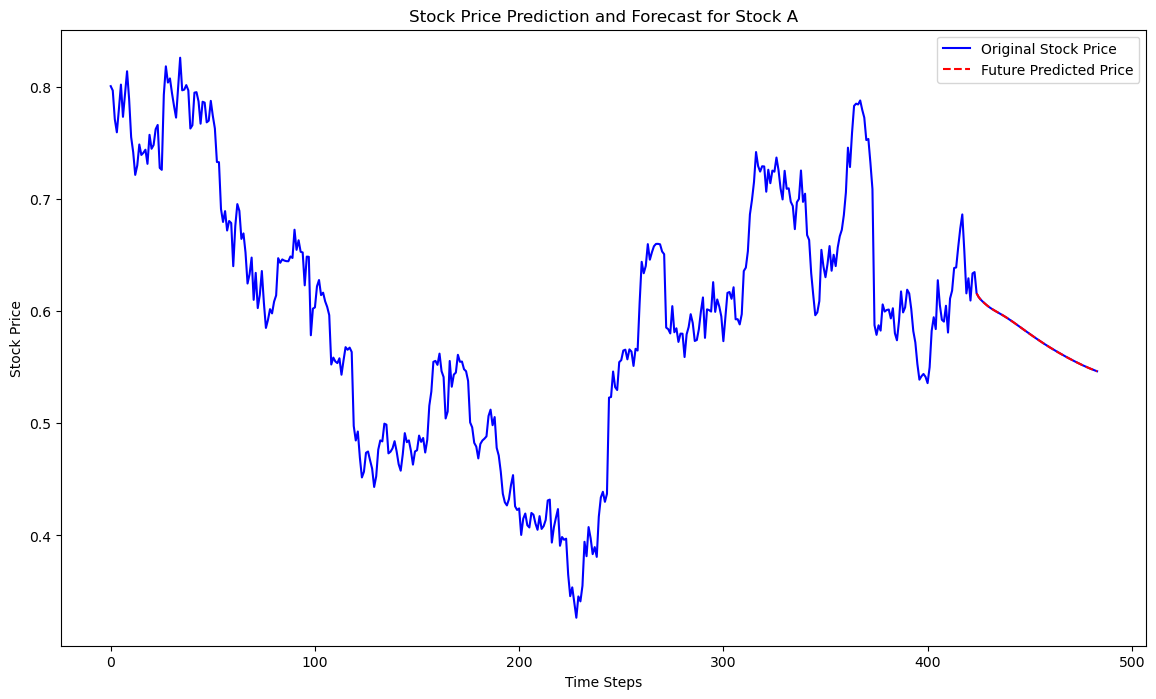

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


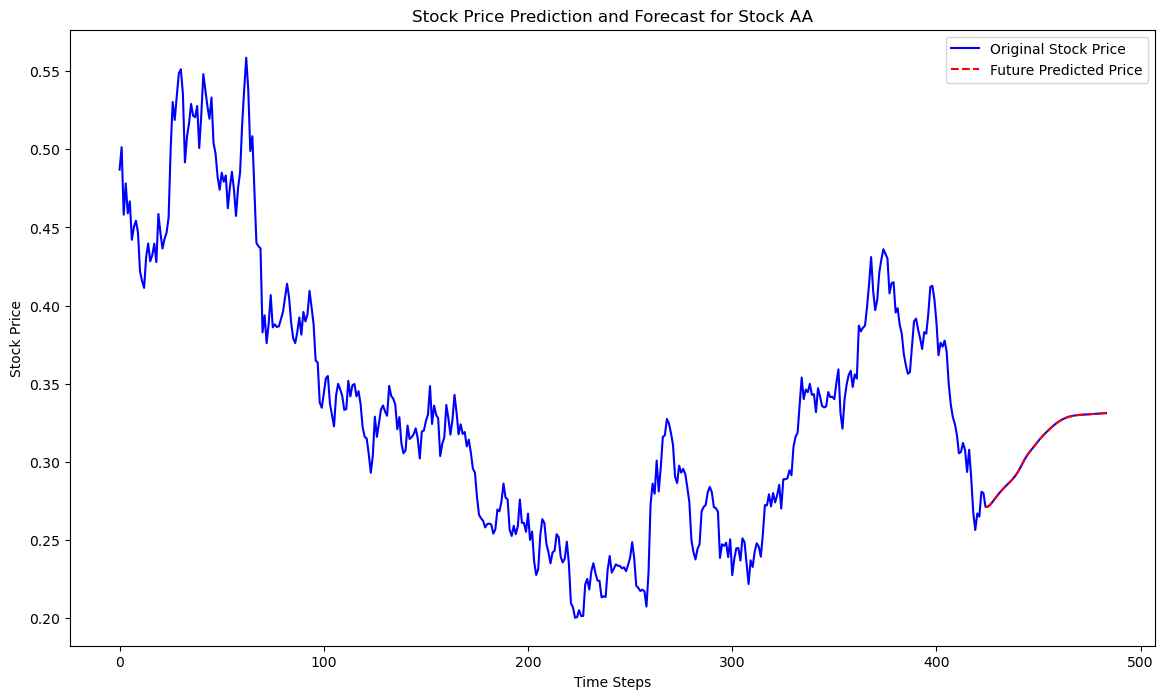

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


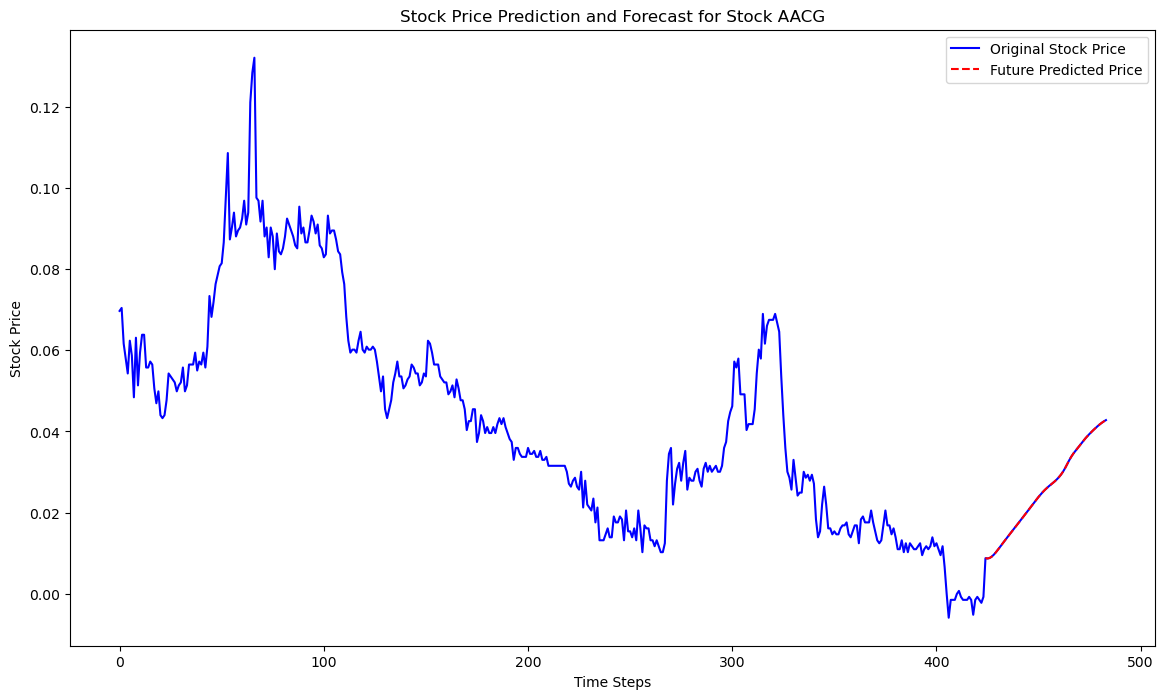

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


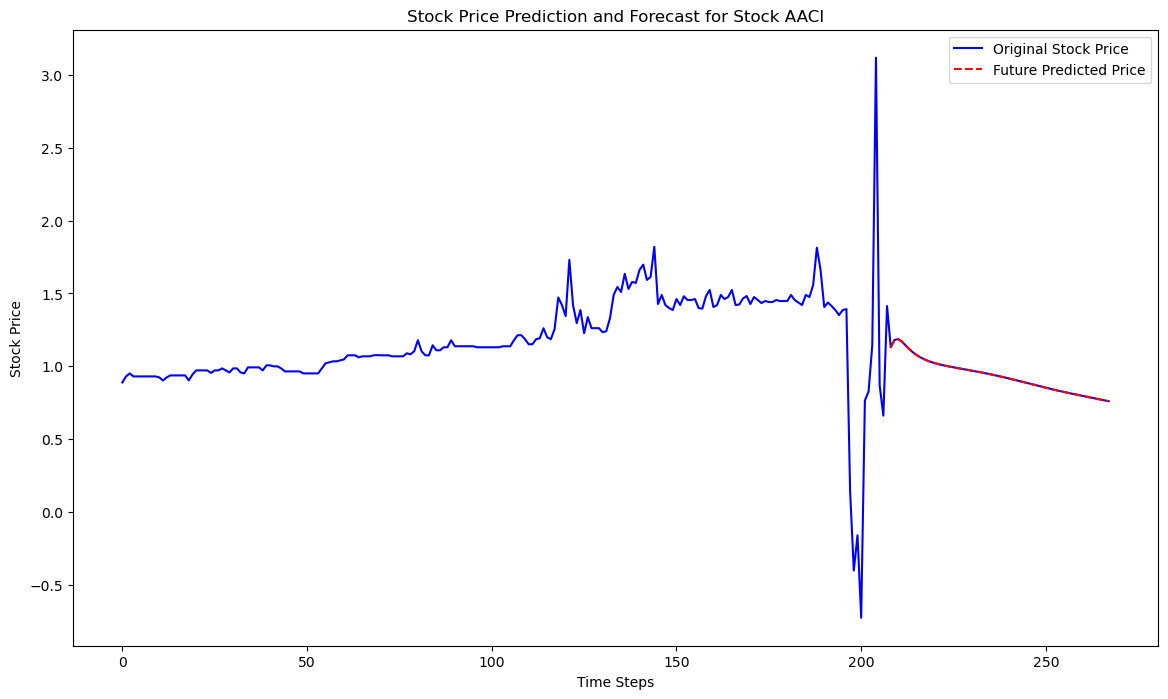

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


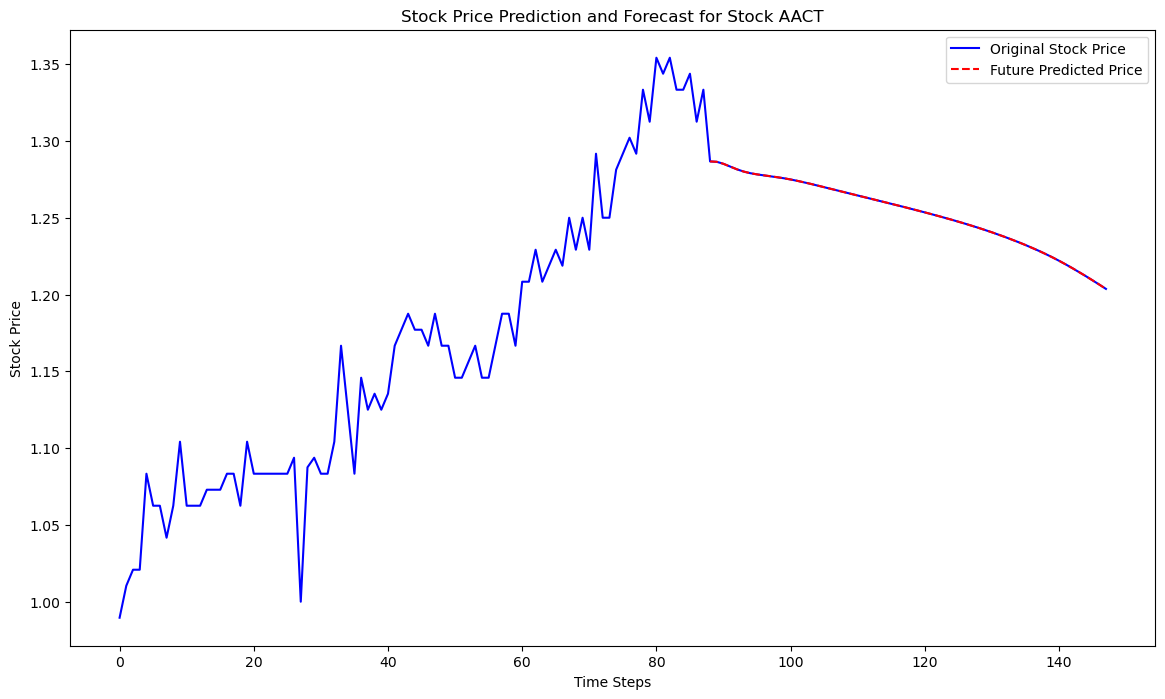

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


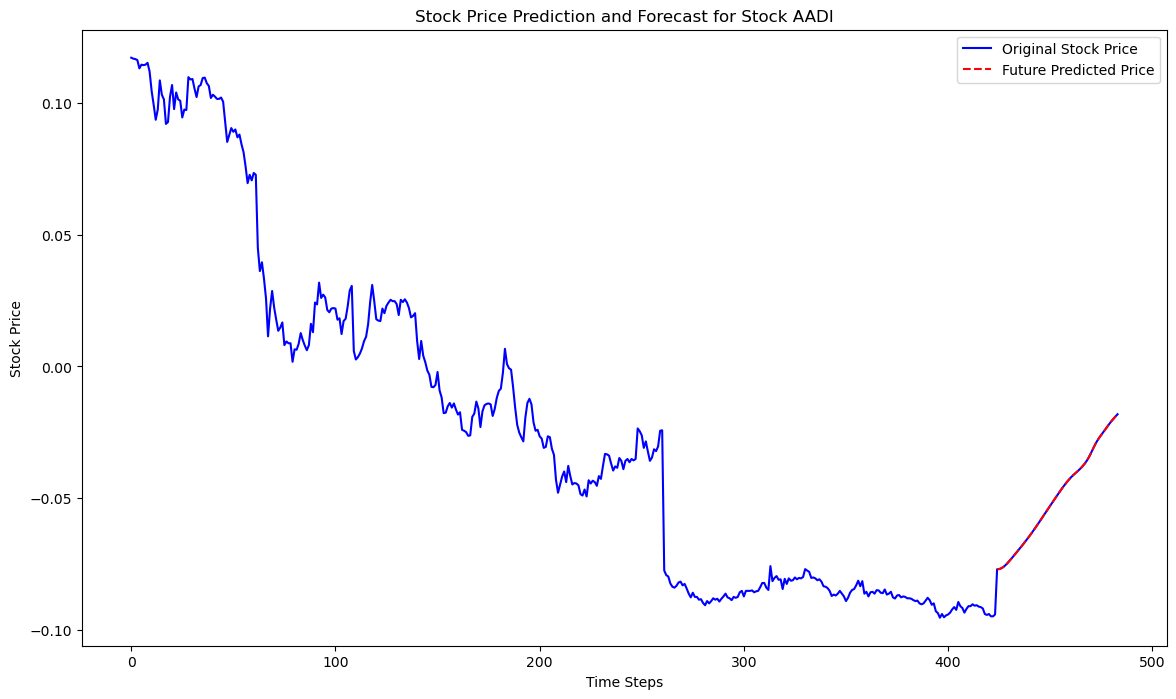

7/7 [==============================] - 0s 15ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


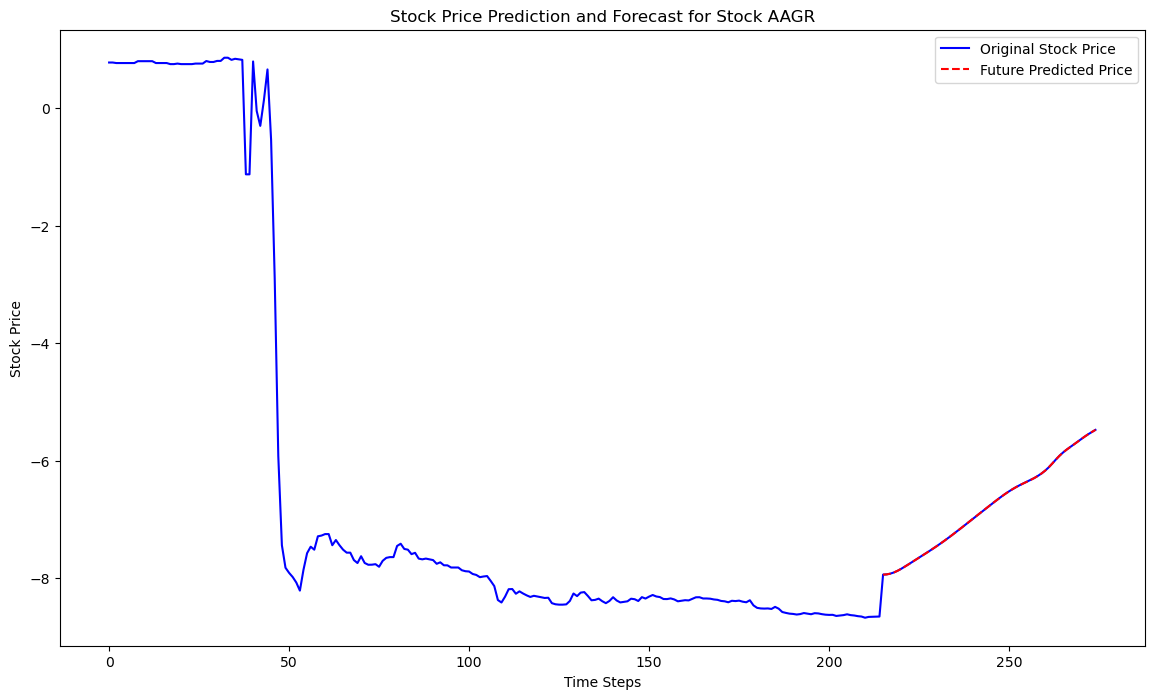

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


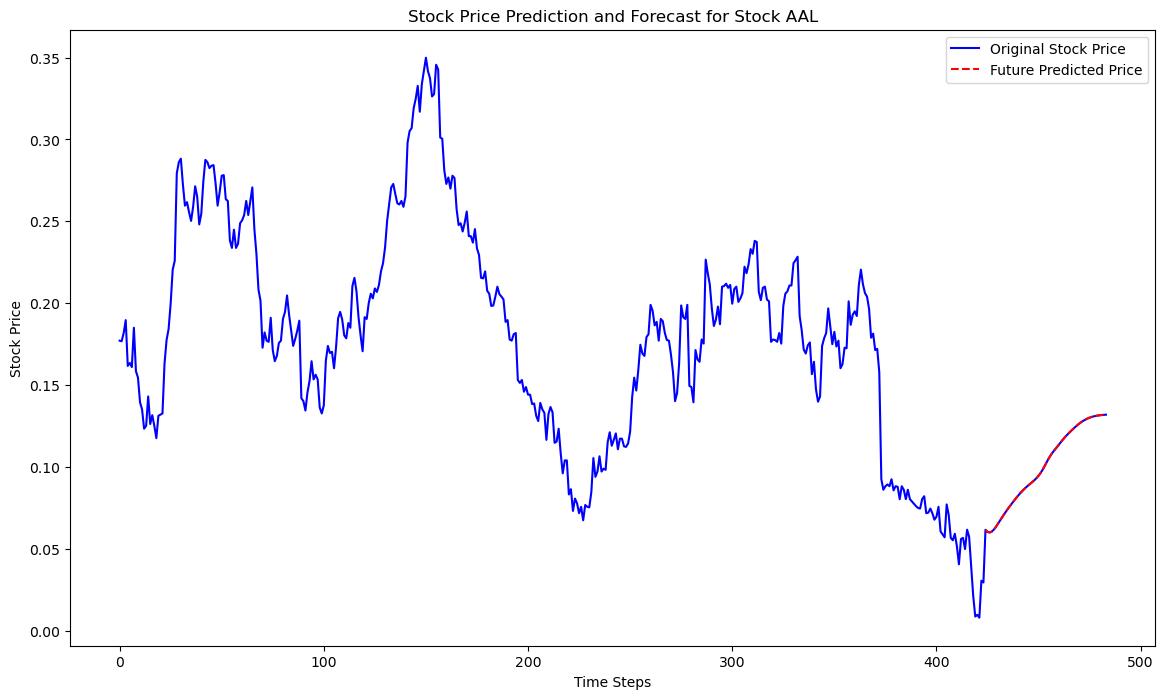

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


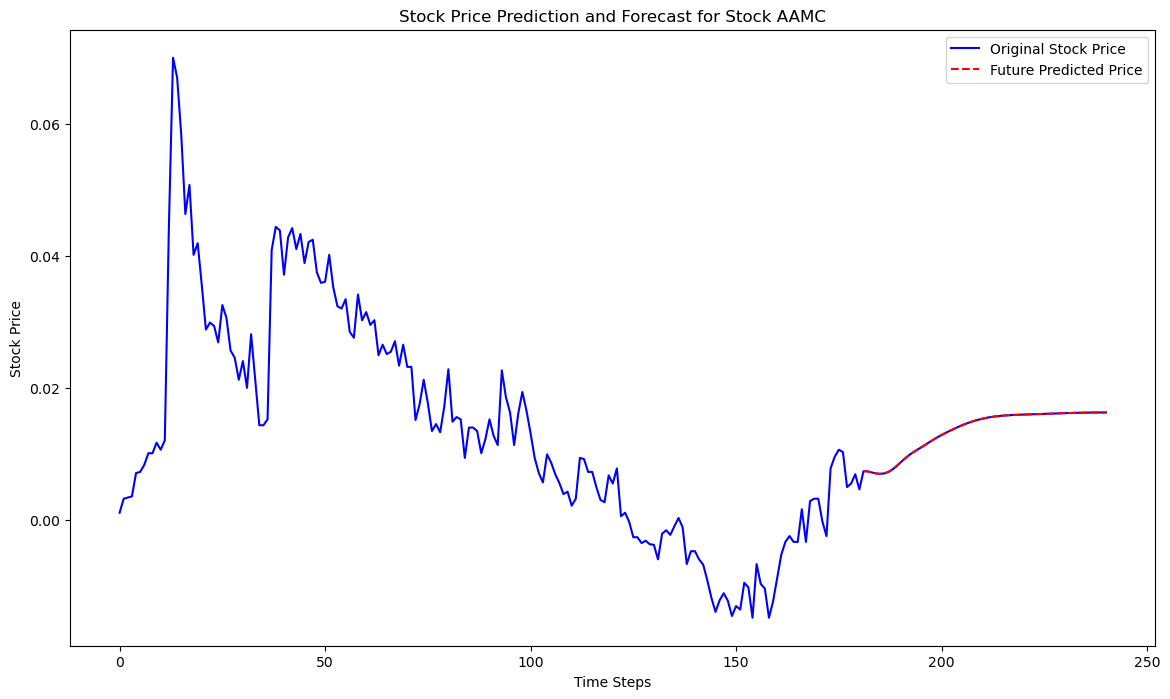

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 26ms/step


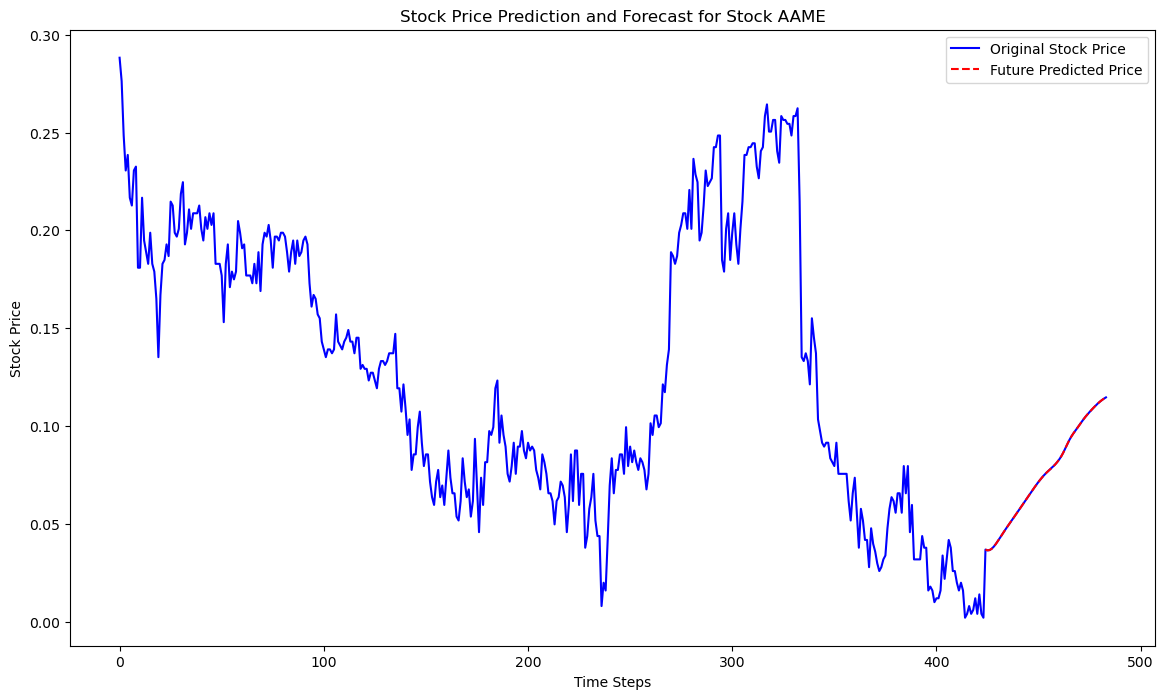

8/9 [=========================>....] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


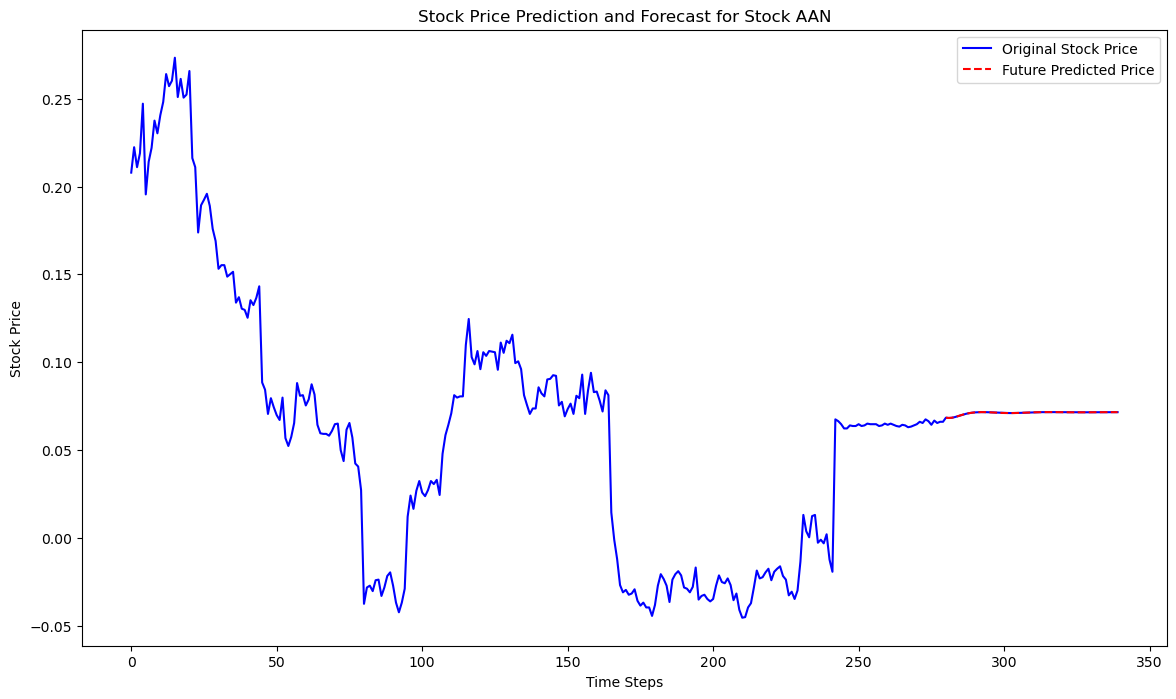

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


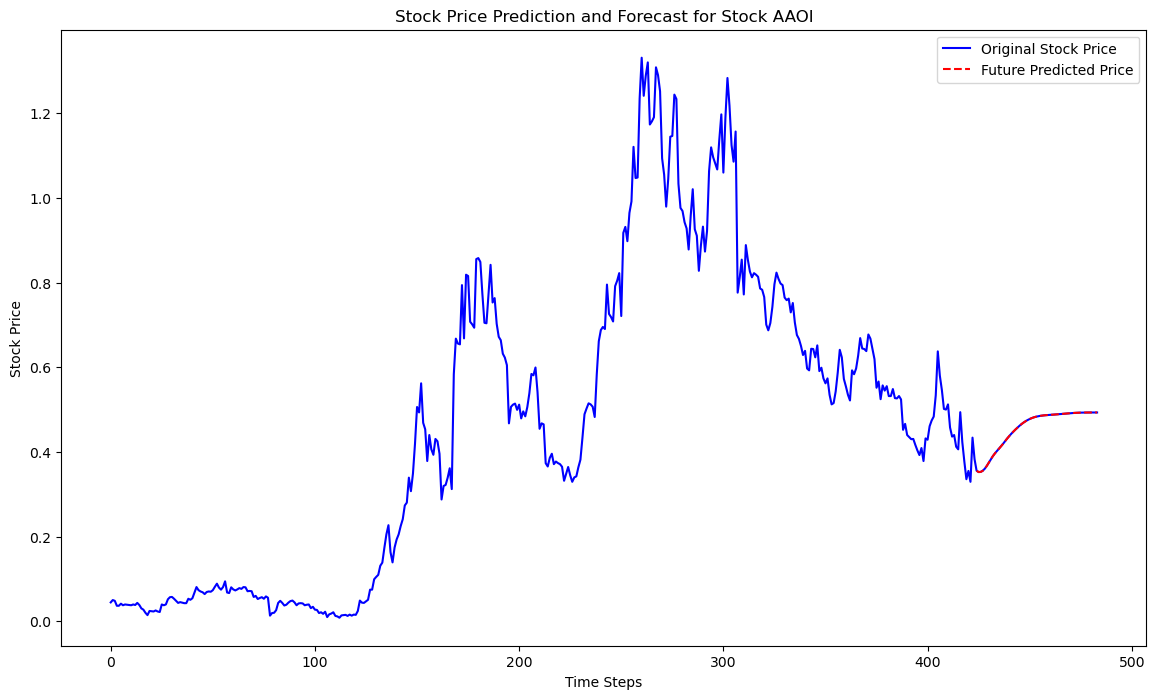

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


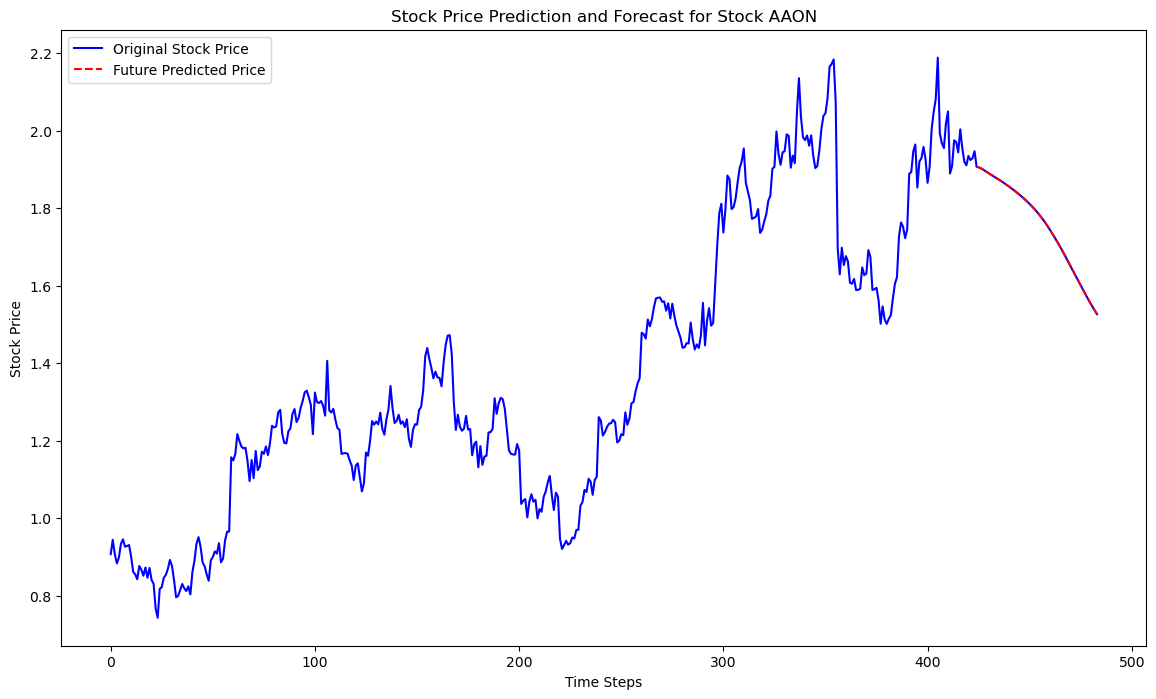

 8/14 [================>.............] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 31ms/step


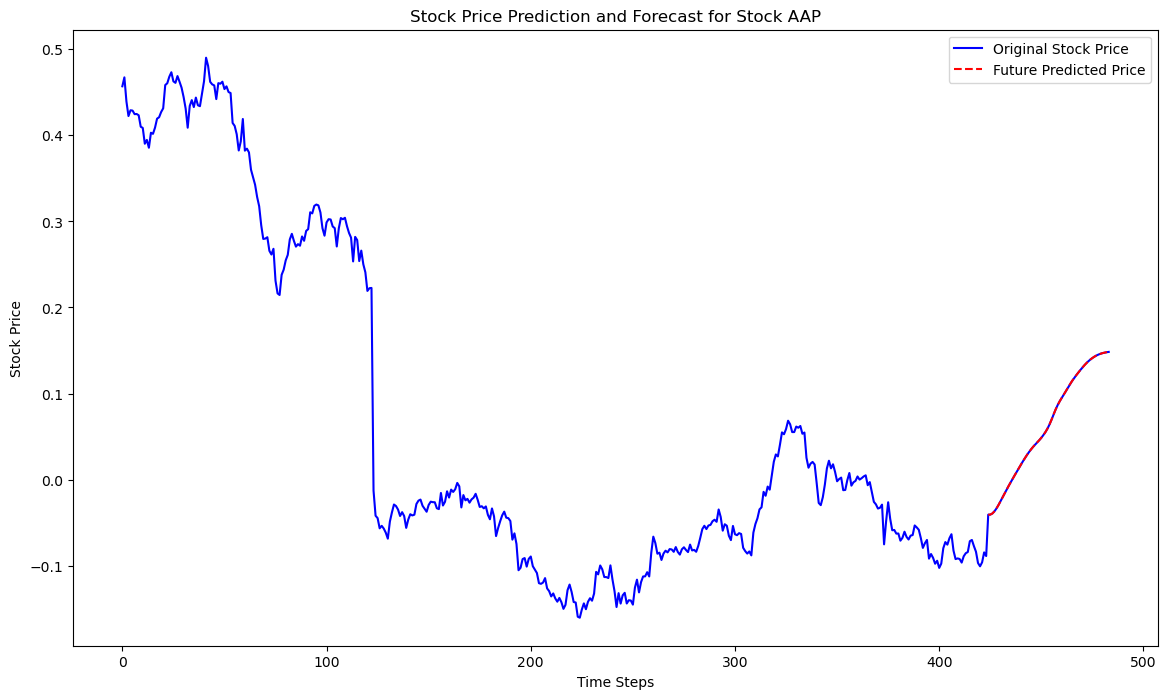

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


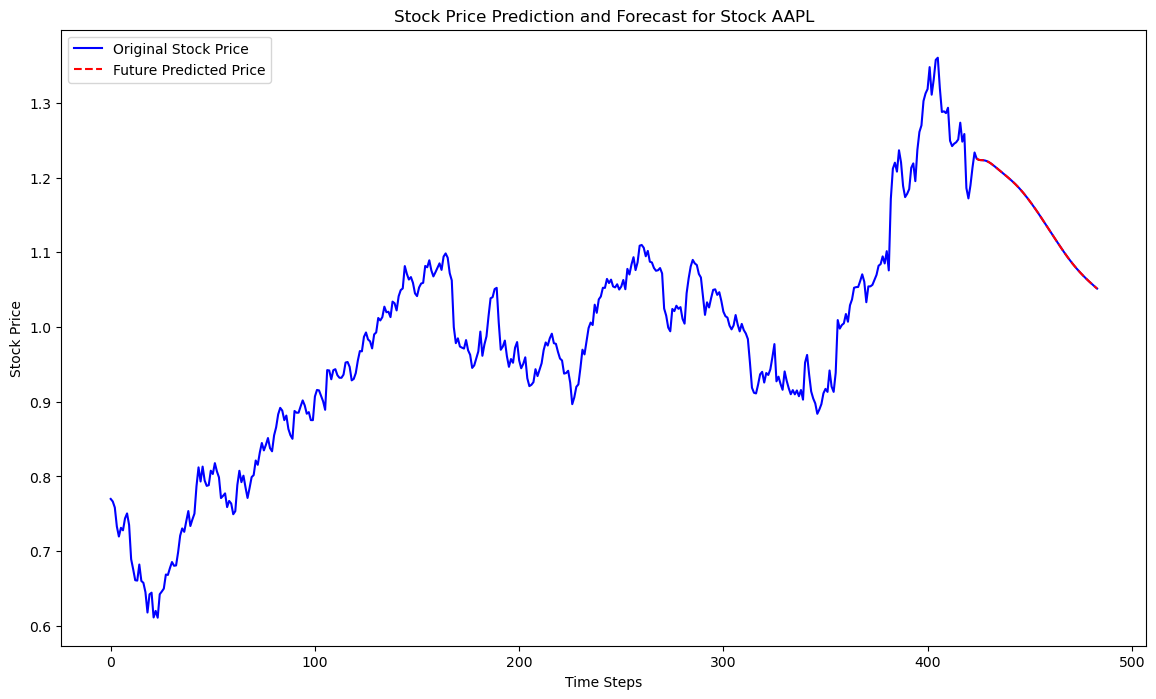

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


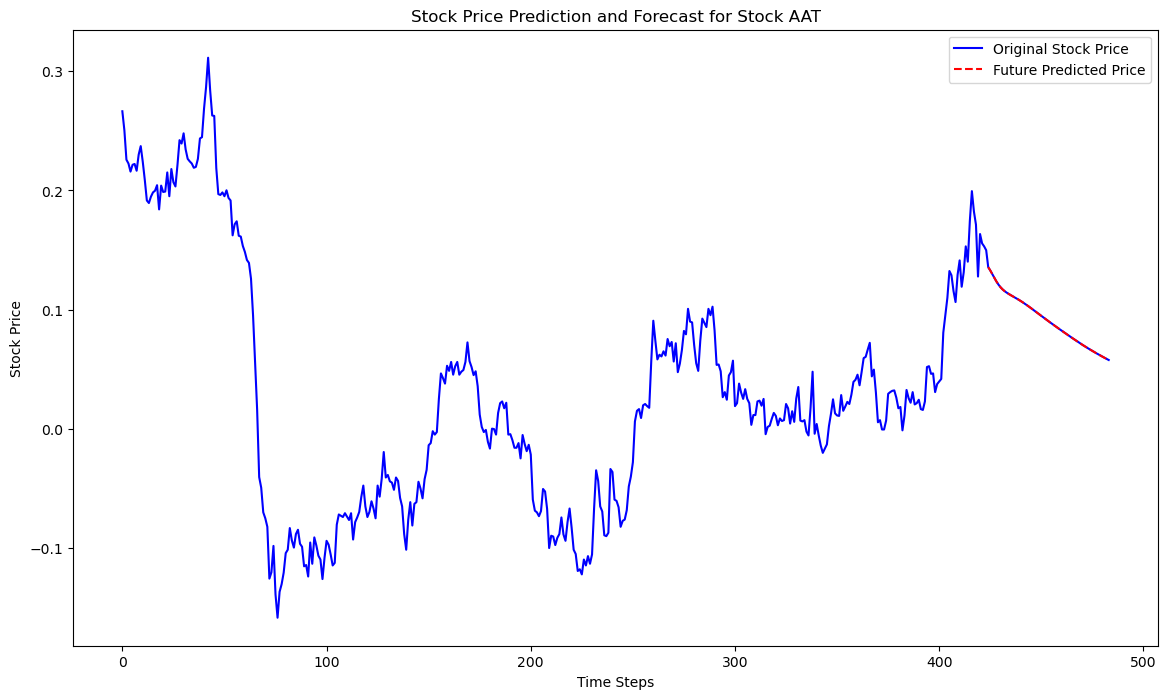

 8/14 [================>.............] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 22ms/step


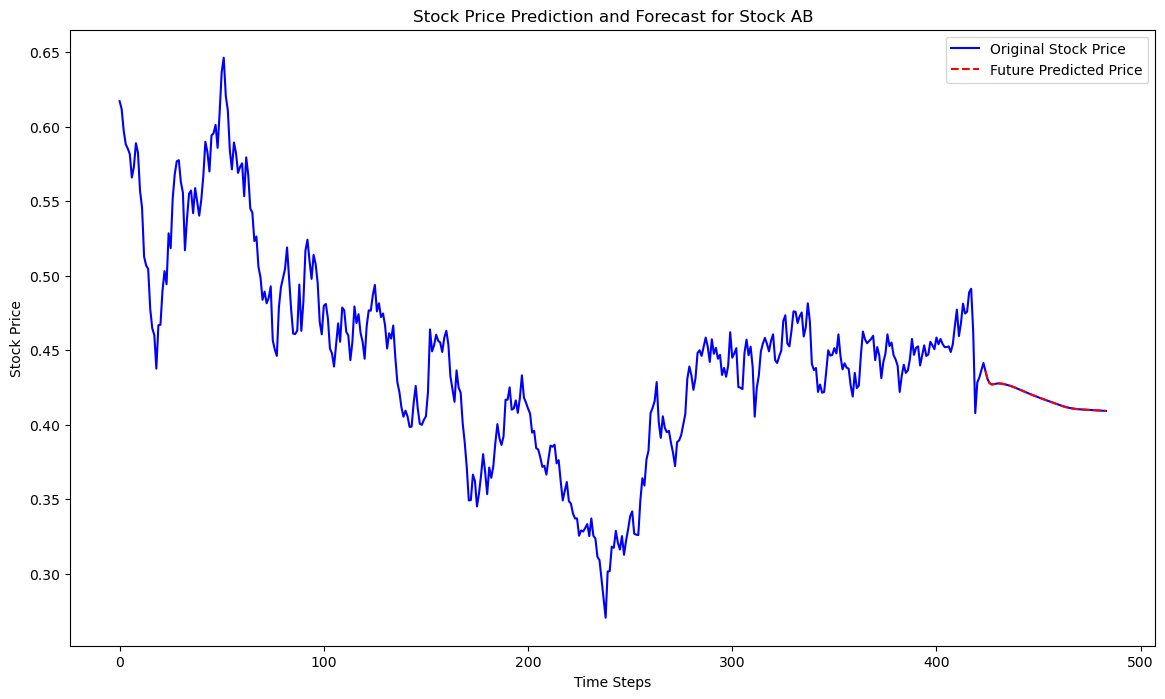

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


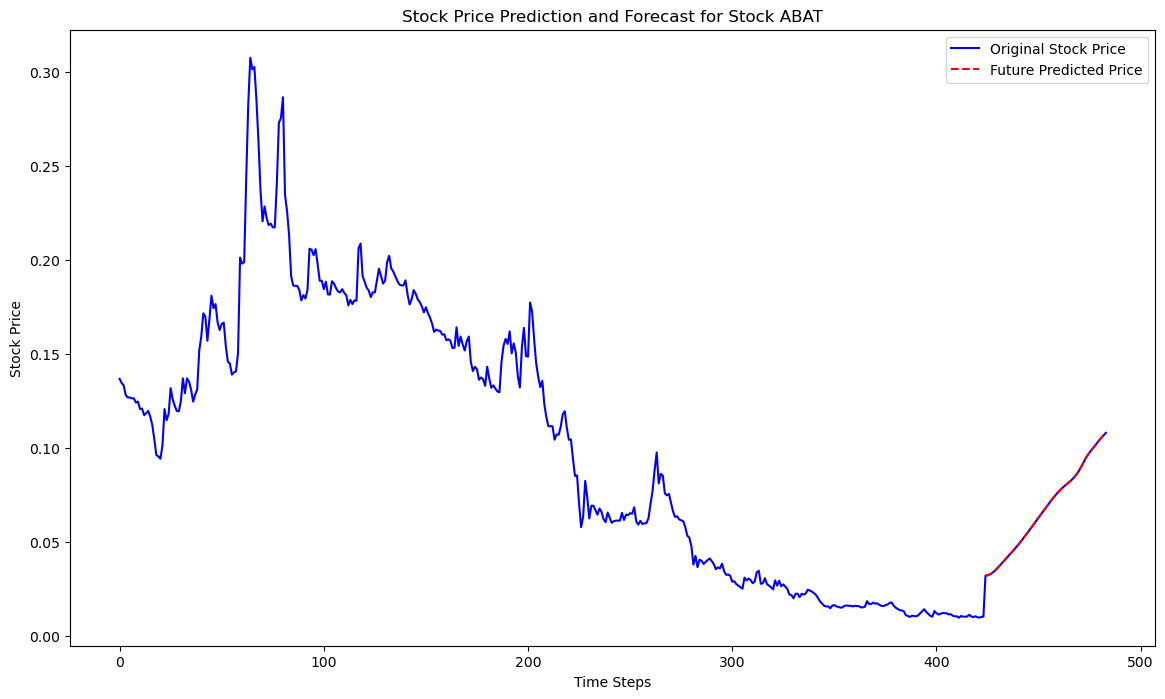

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 22ms/step


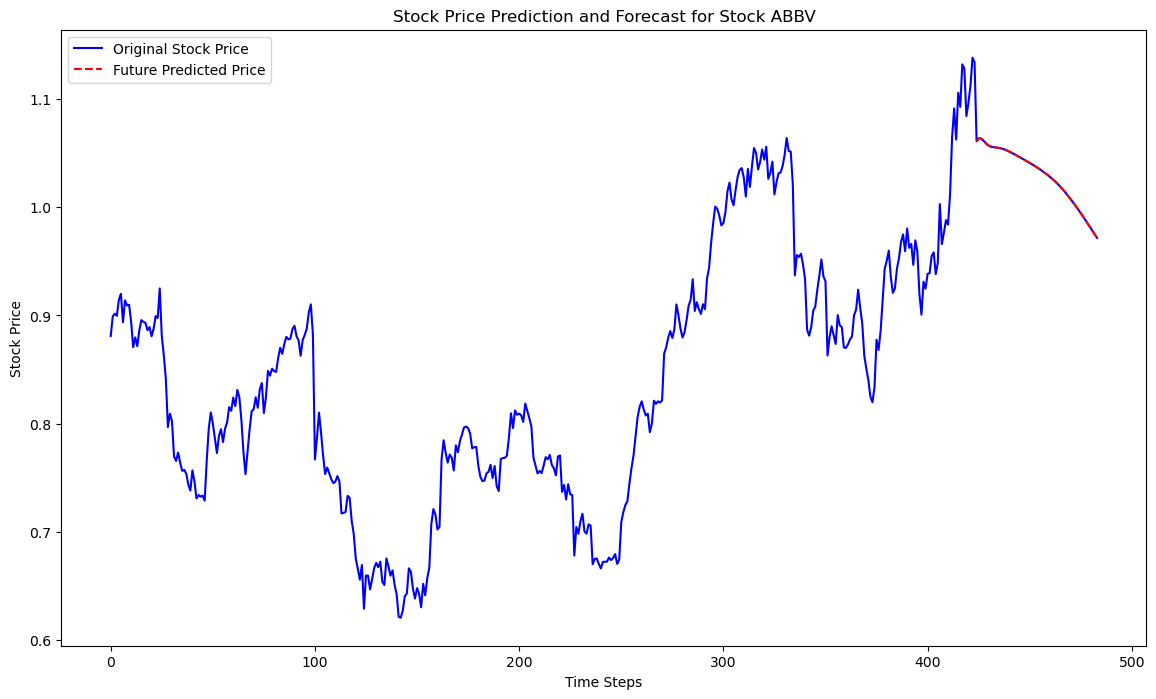

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


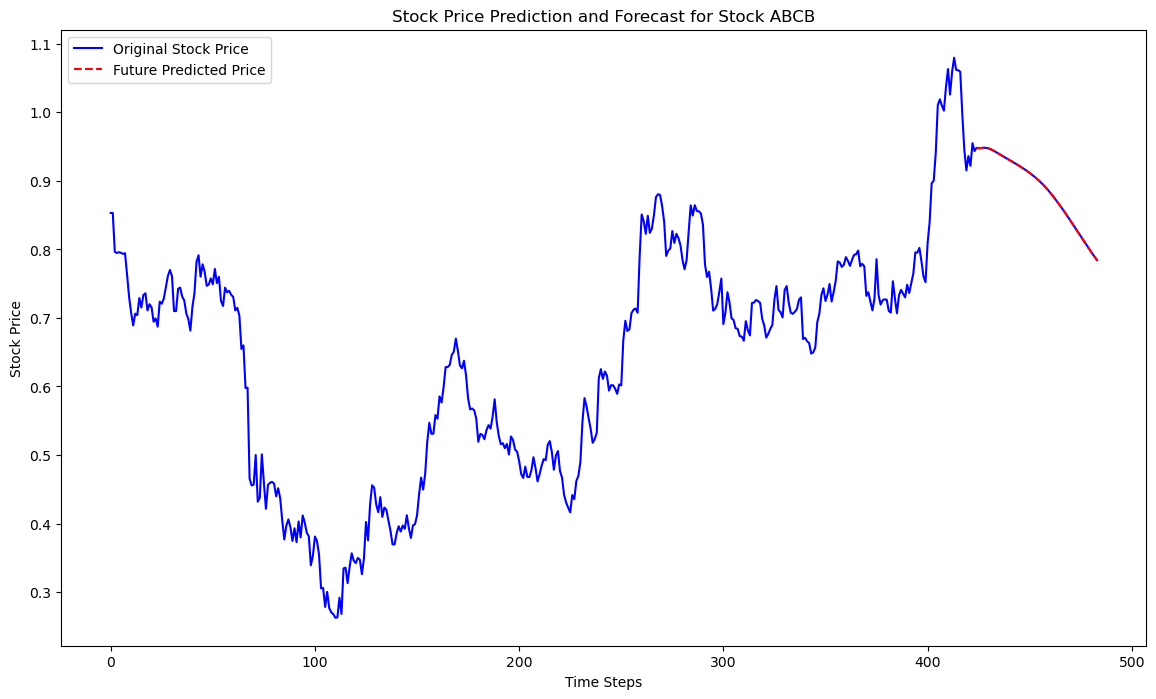

9/9 [==============================] - 0s 15ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


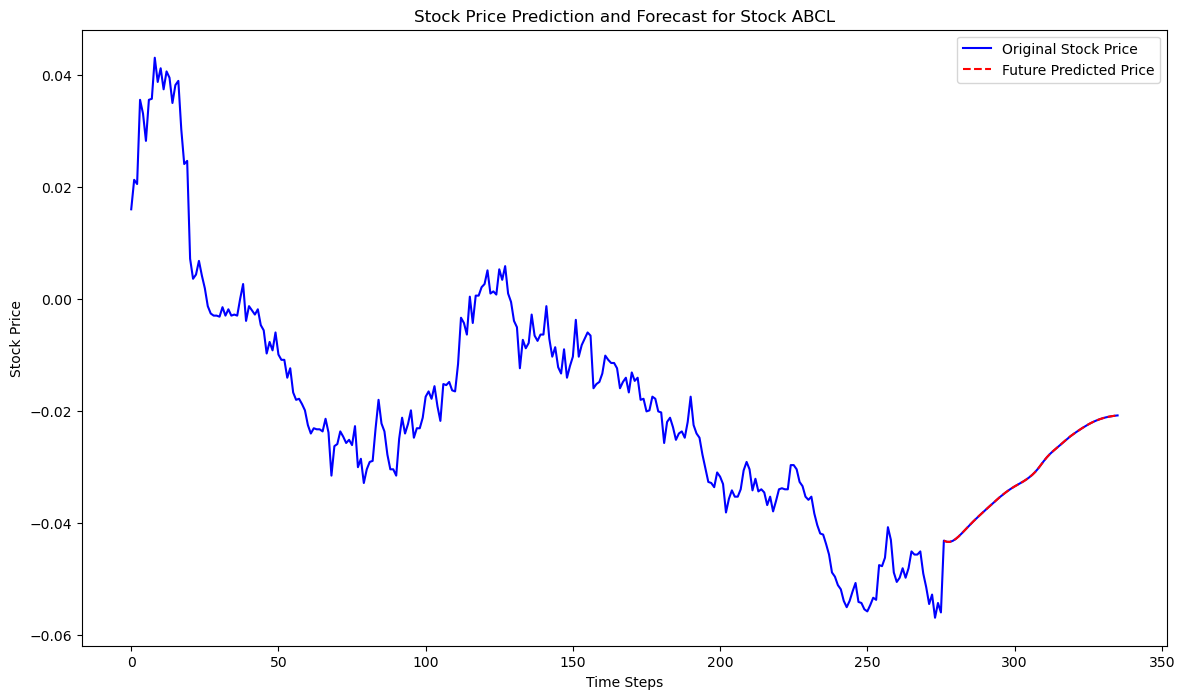

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


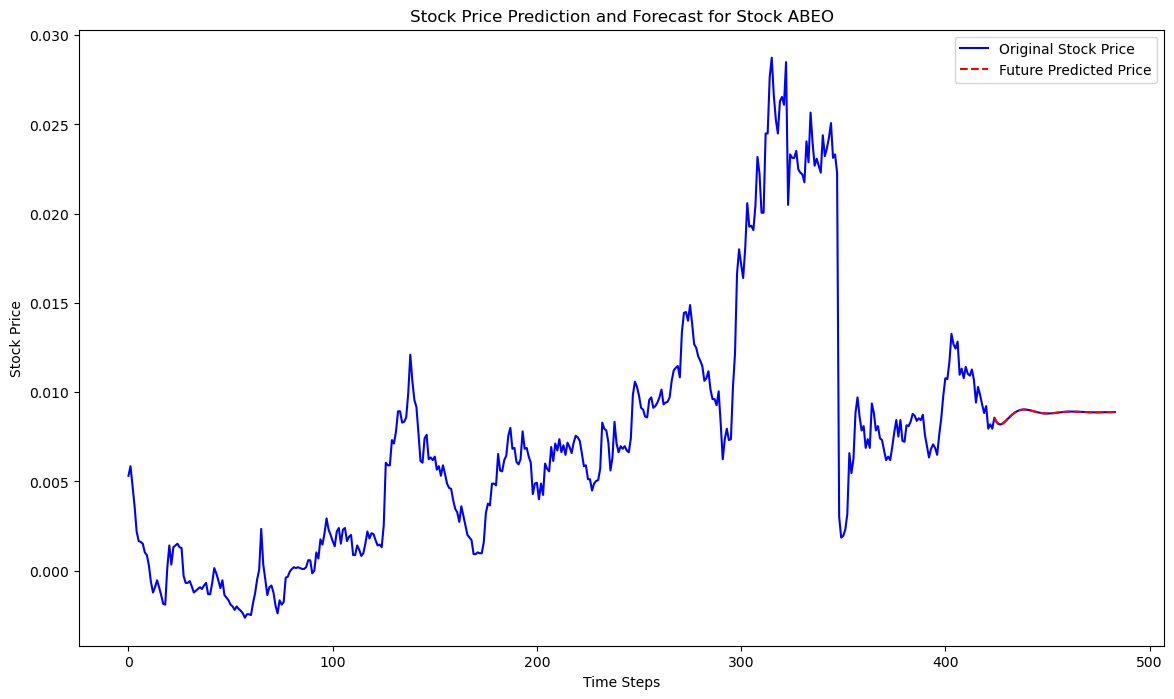

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


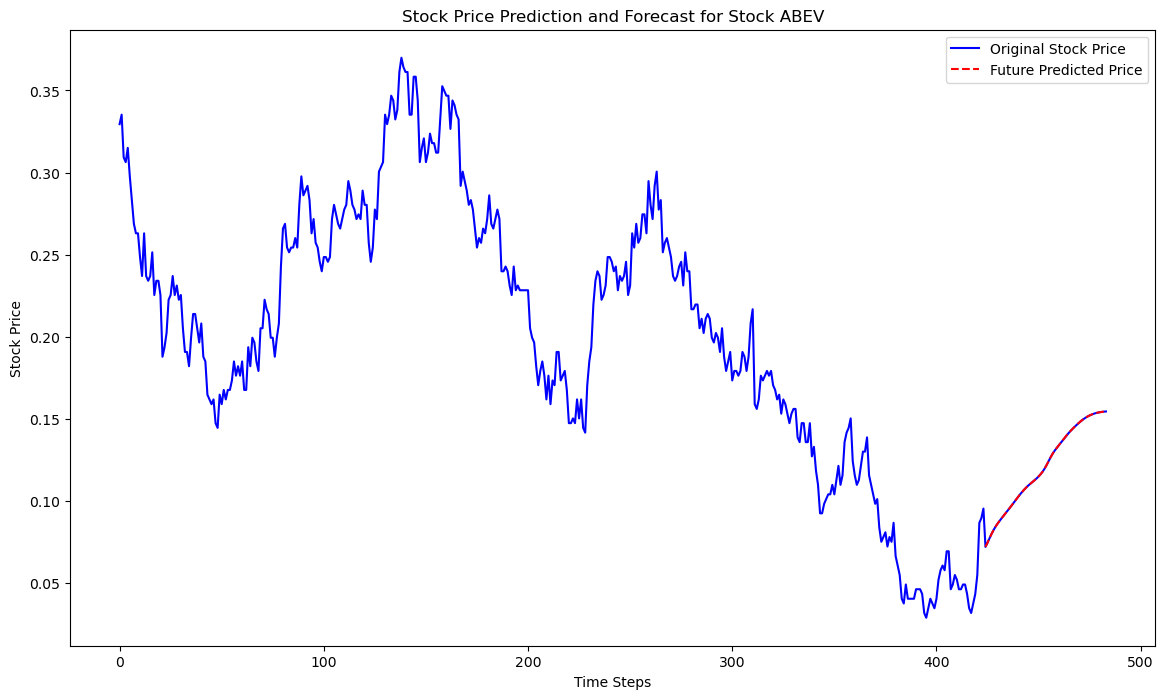

 1/14 [=>............................] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 22ms/step


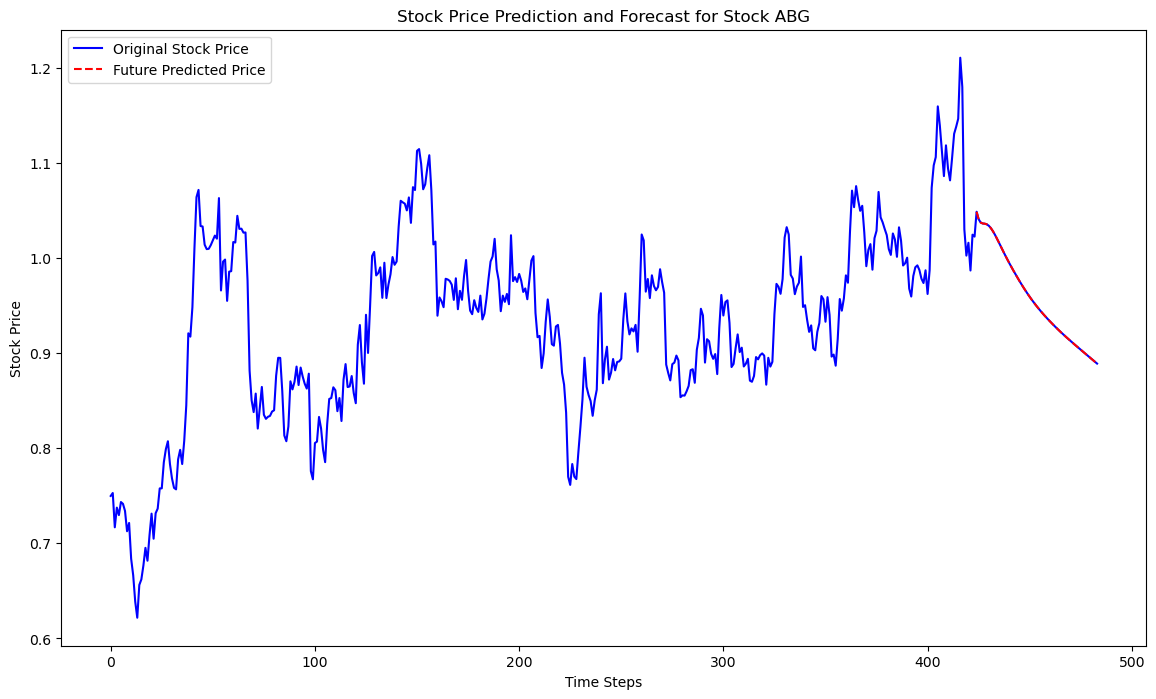

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


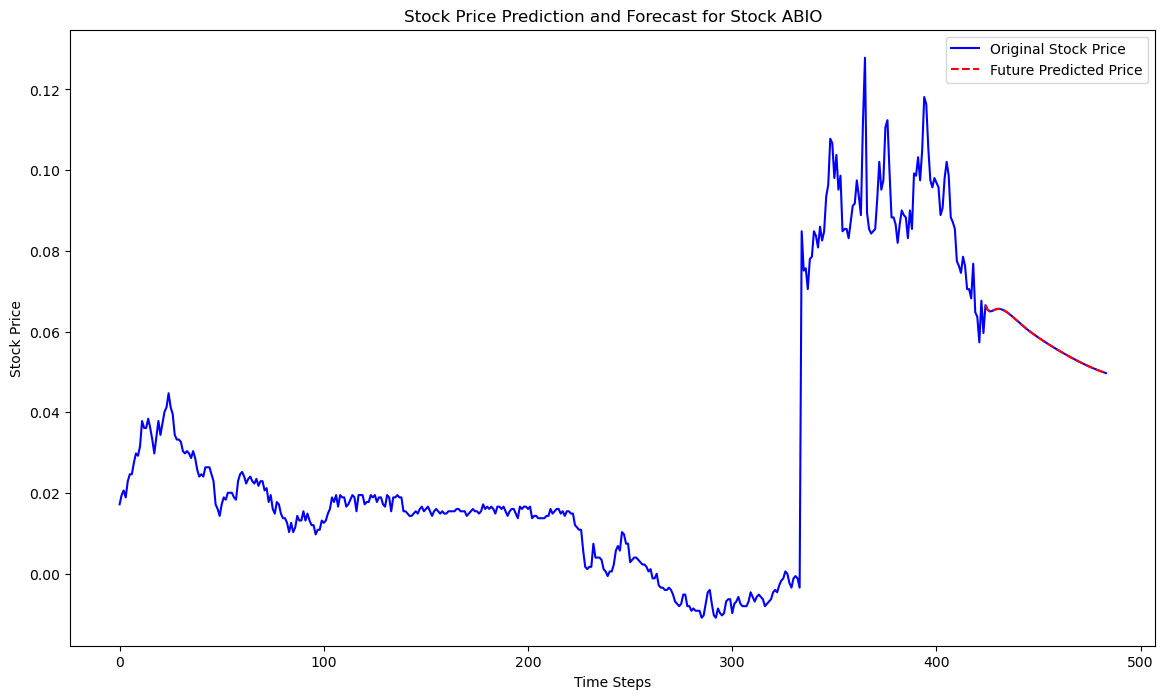

 9/10 [==========================>...] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


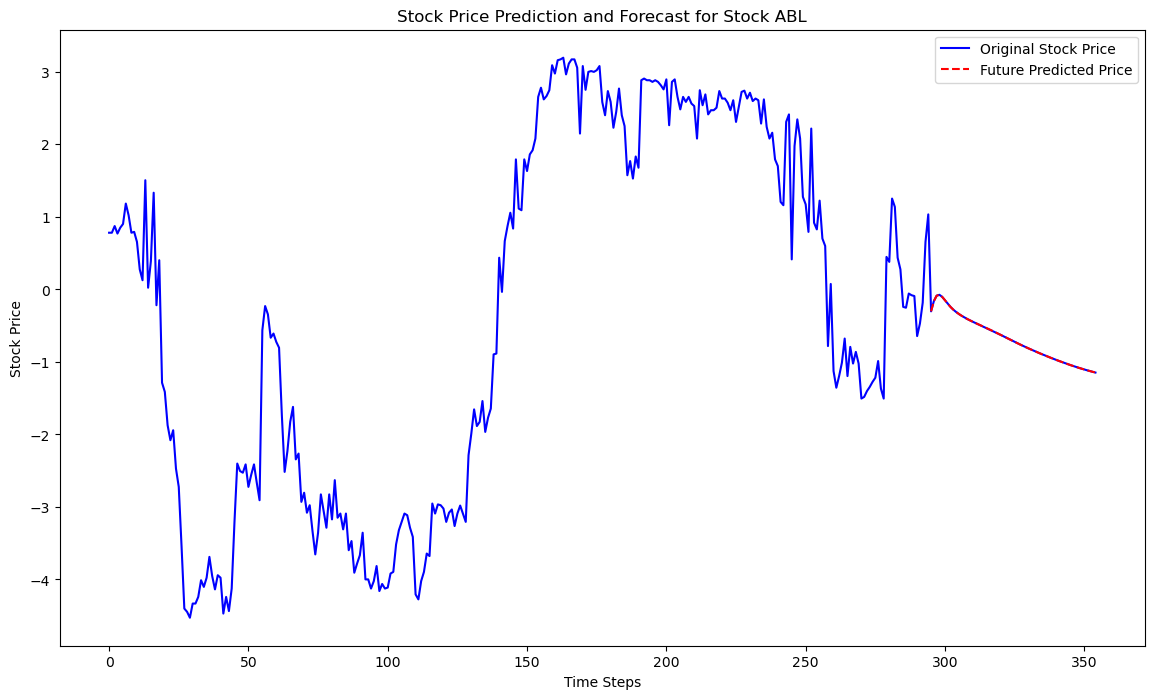

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 25ms/step


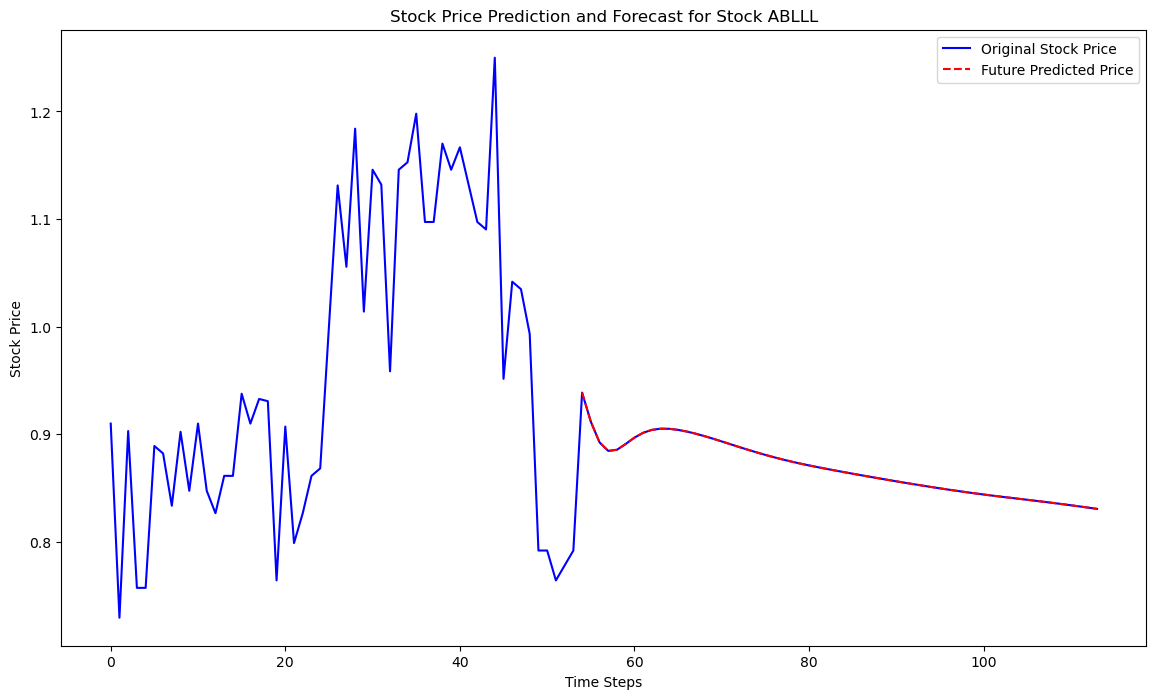

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


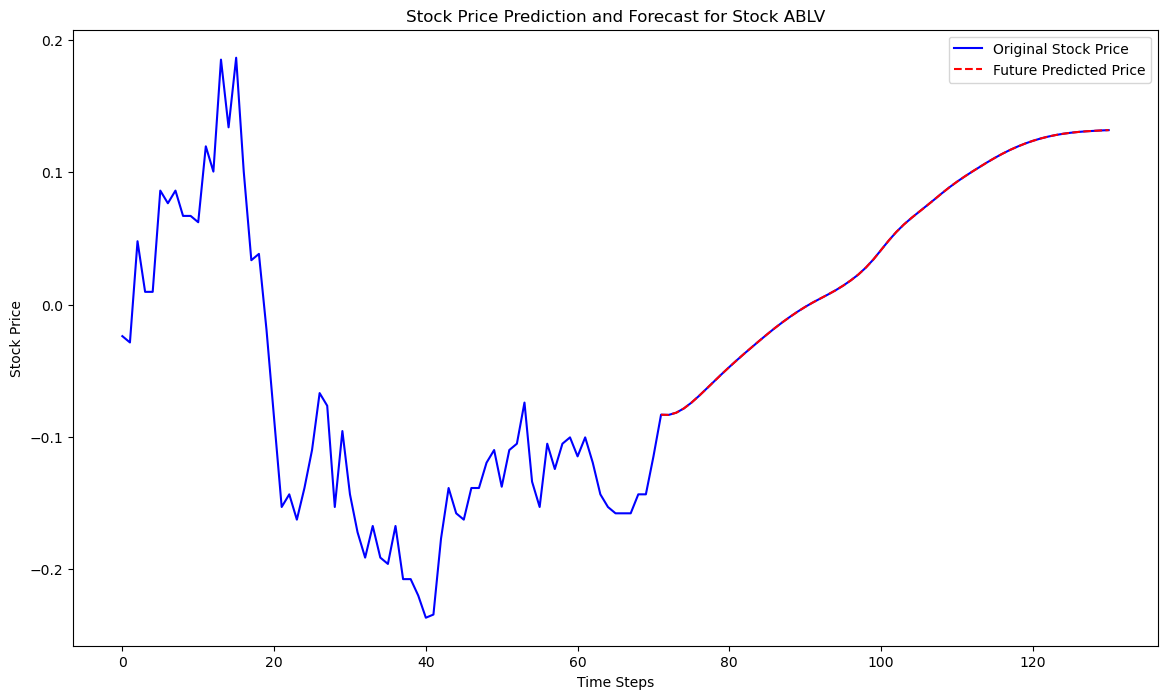

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


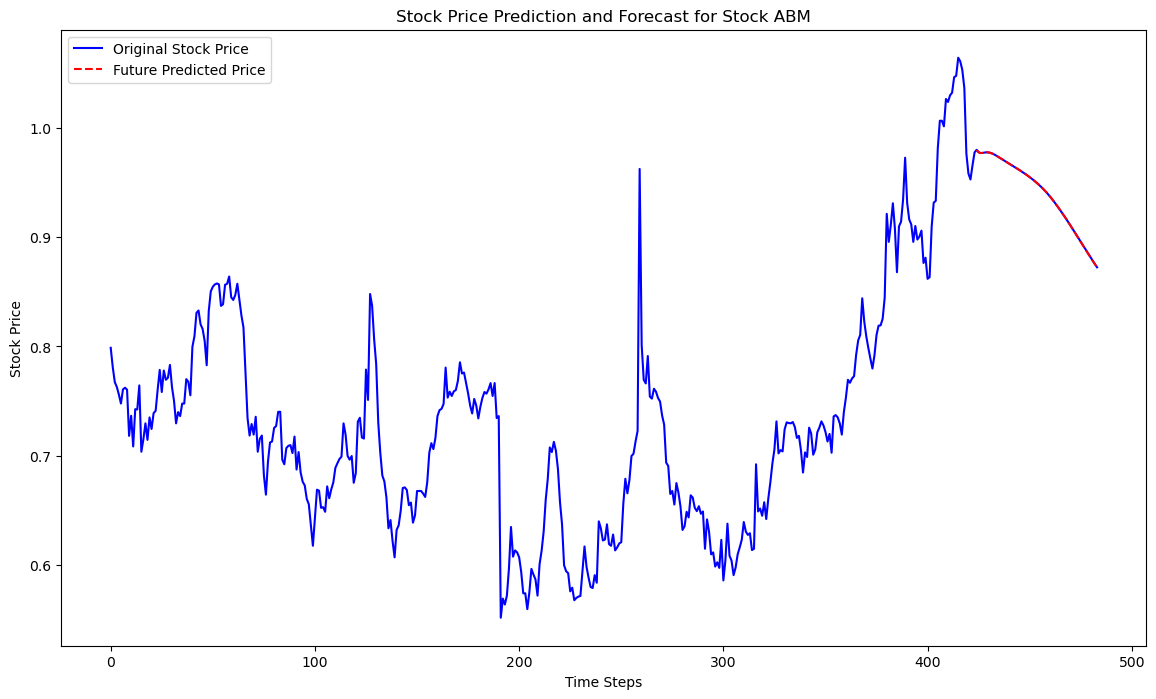

9/9 [==============================] - 0s 14ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


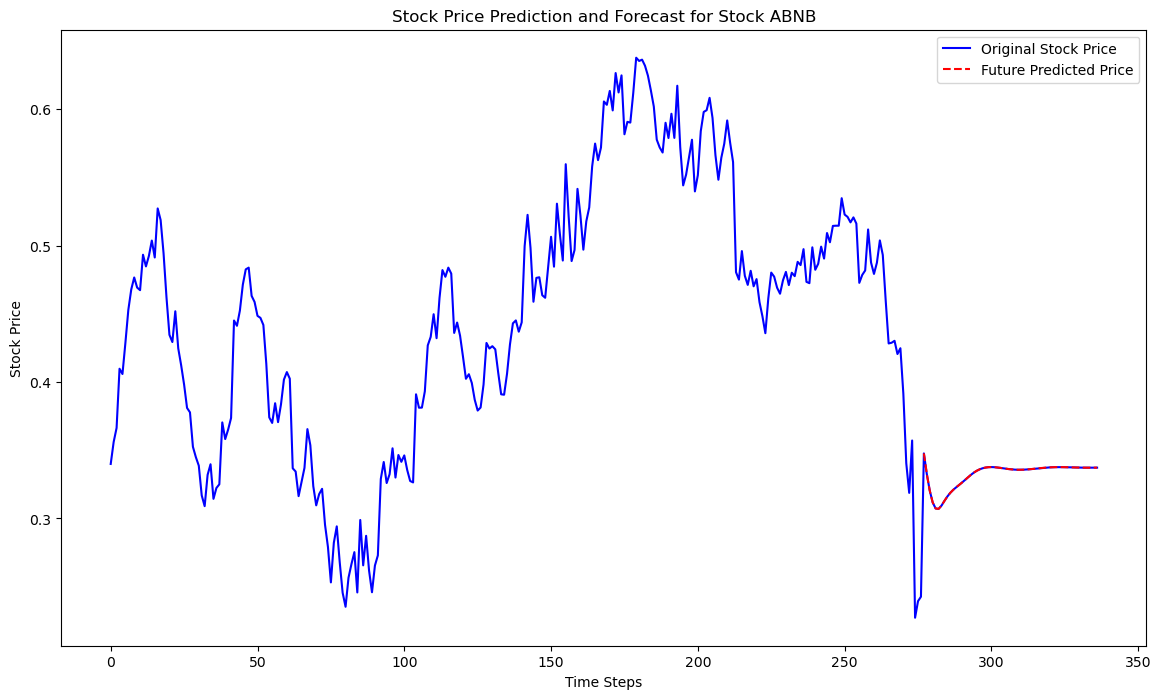

8/8 [==============================] - 0s 14ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


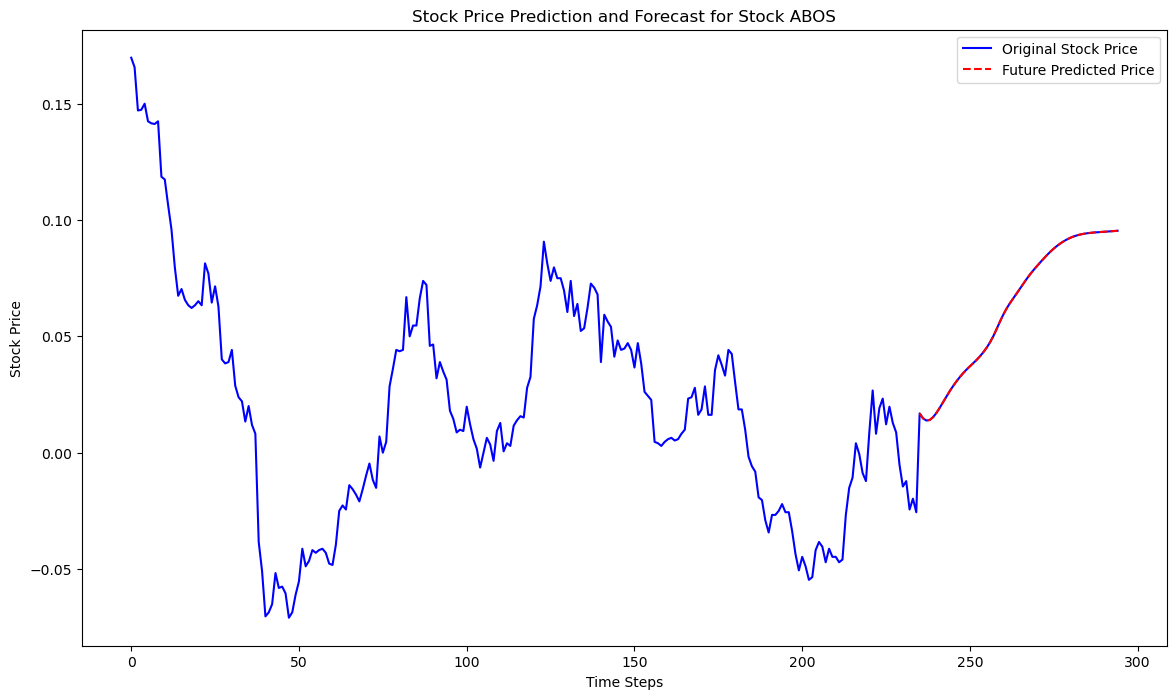

 1/14 [=>............................] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 23ms/step


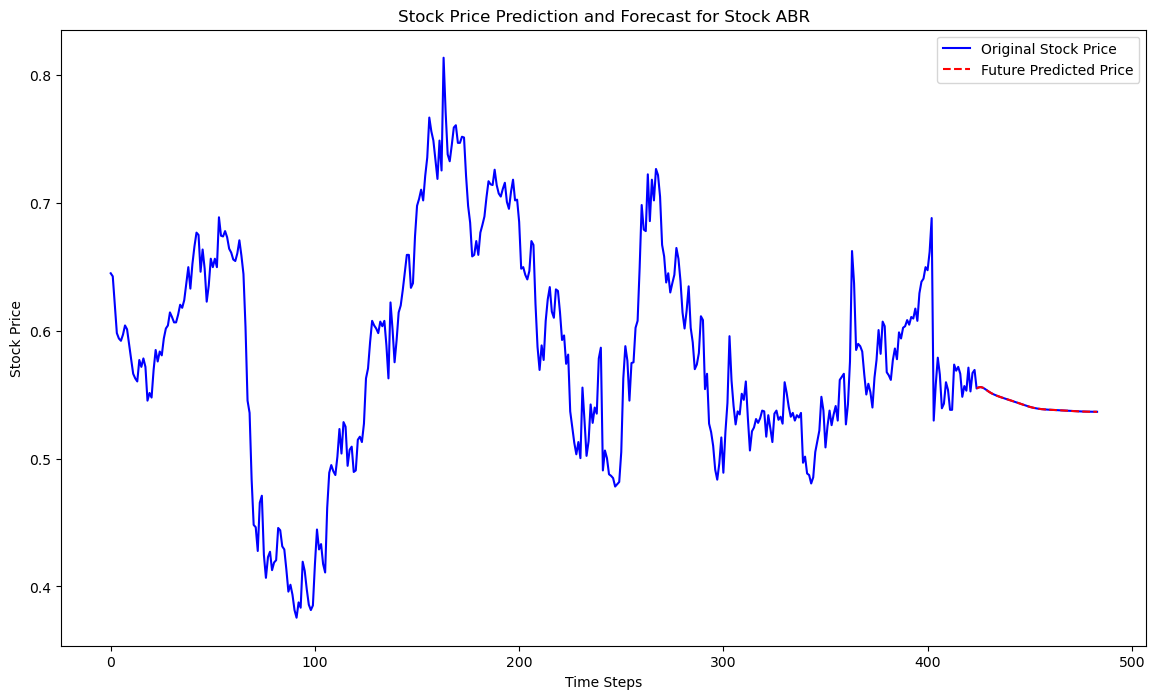

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


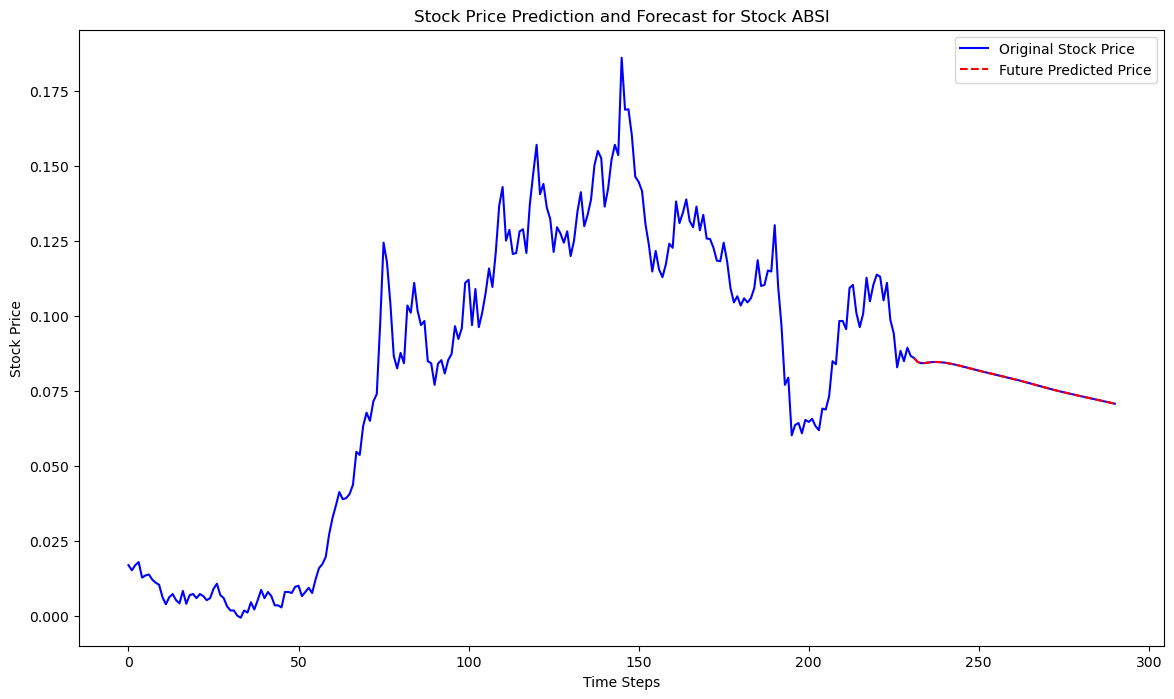

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 22ms/step


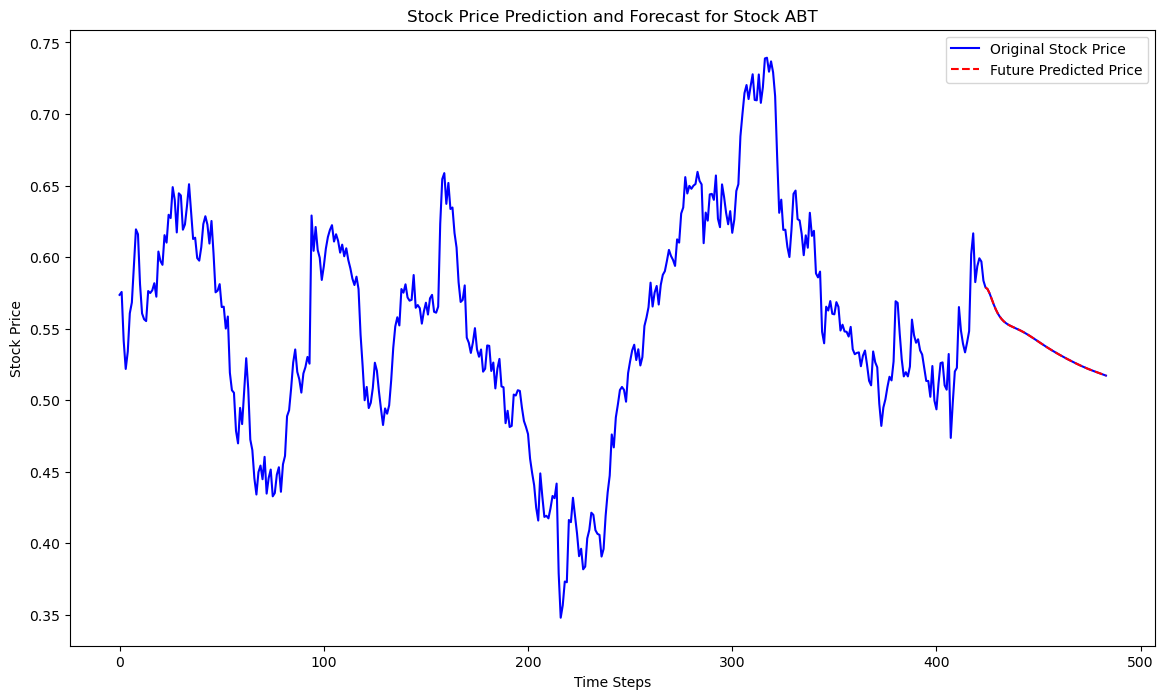

 5/14 [=========>....................] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


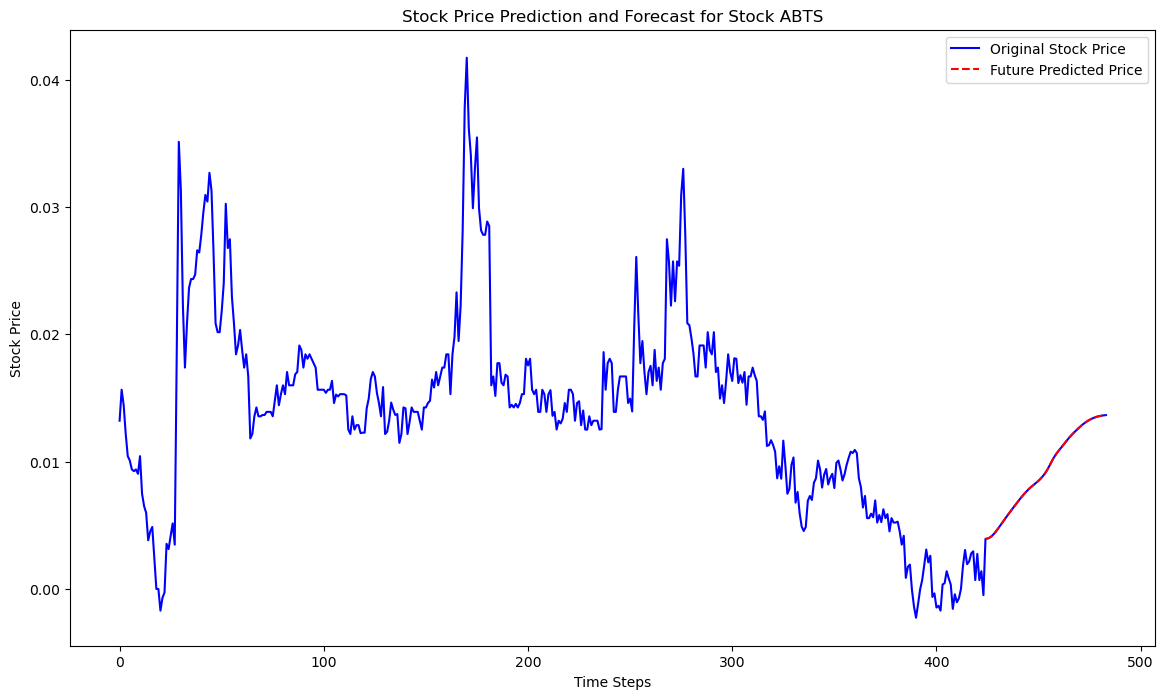

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


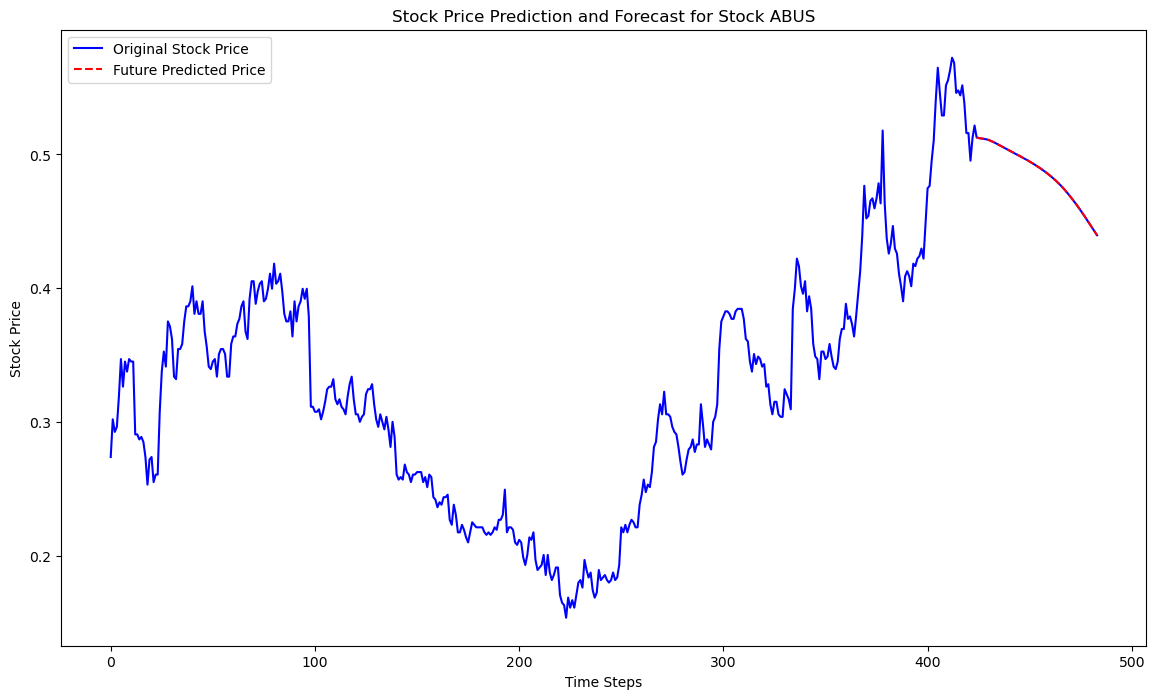

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


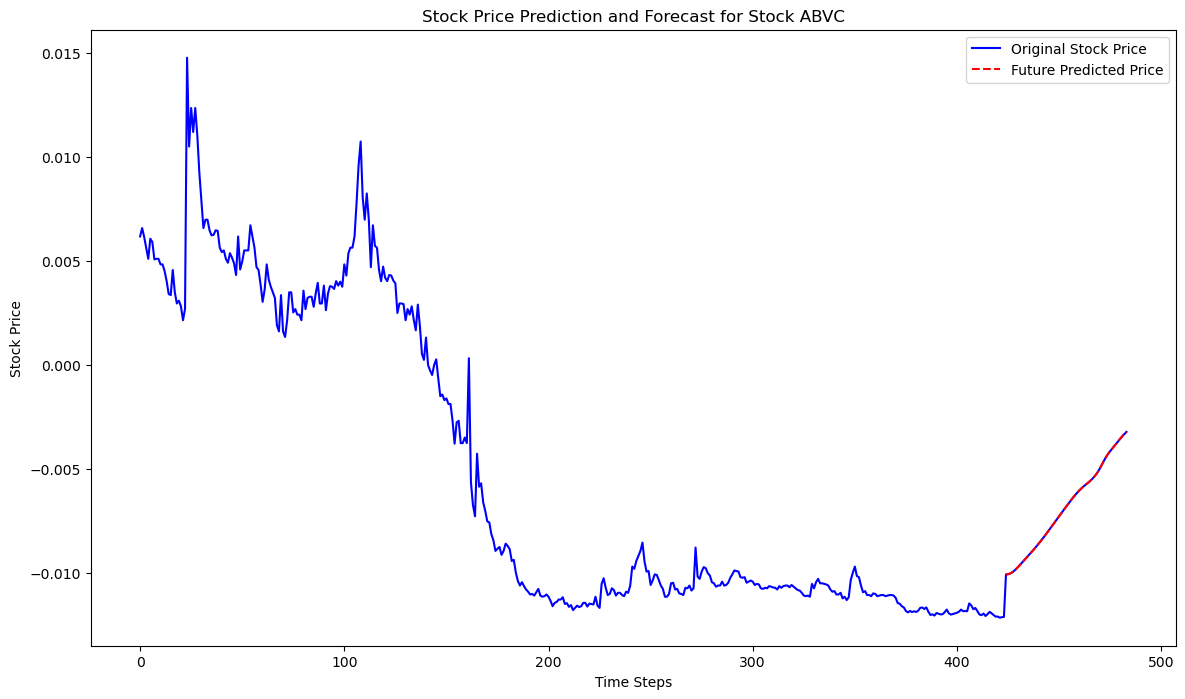

No data available for prediction for Stock ABVE. Skipping this stock.
1/1 [==============================] - 0s 22ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

1/1 [==============================] - 0s 19ms/step


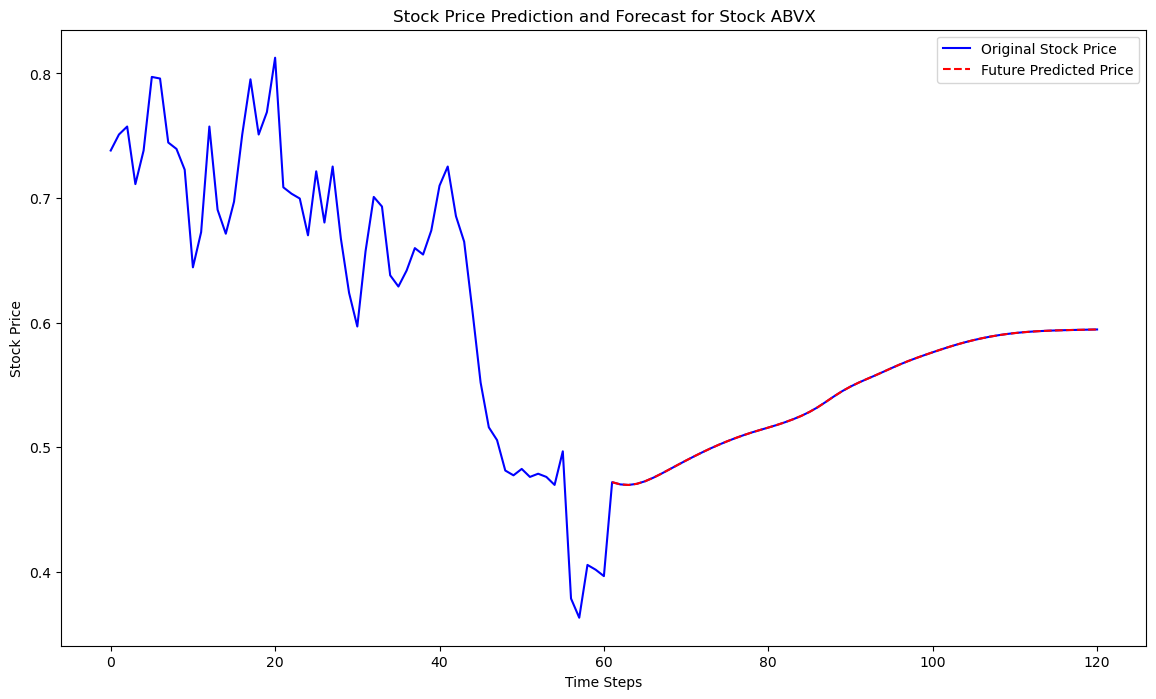

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


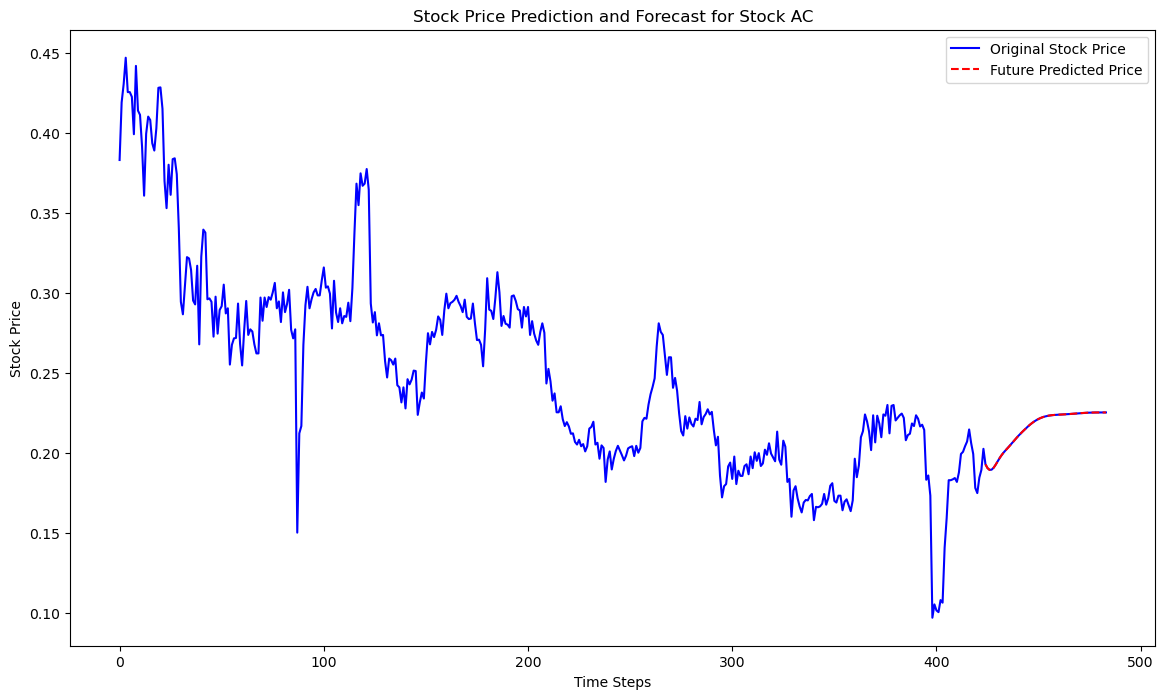

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


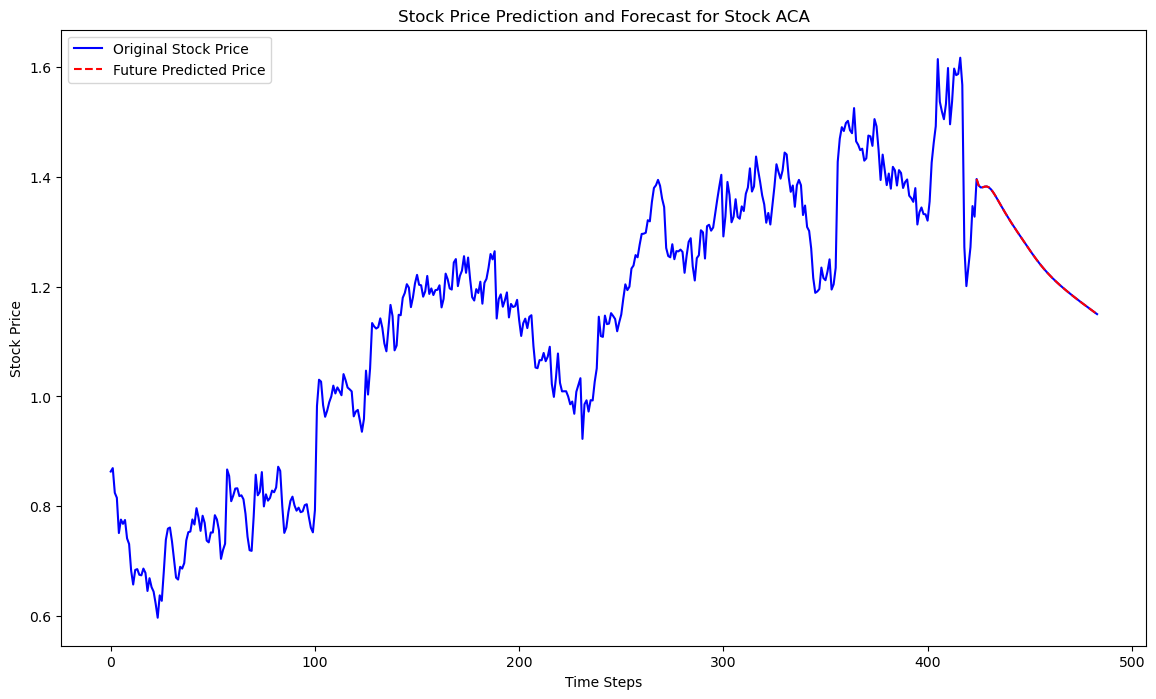

5/6 [========================>.....] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


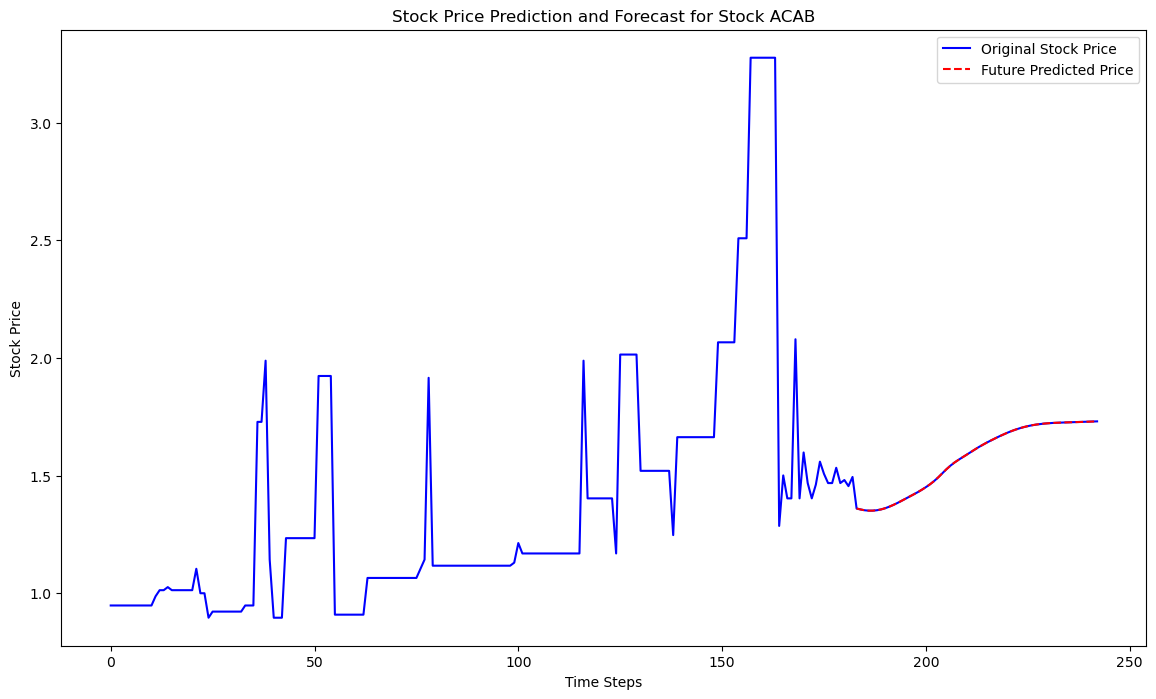

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 27ms/step


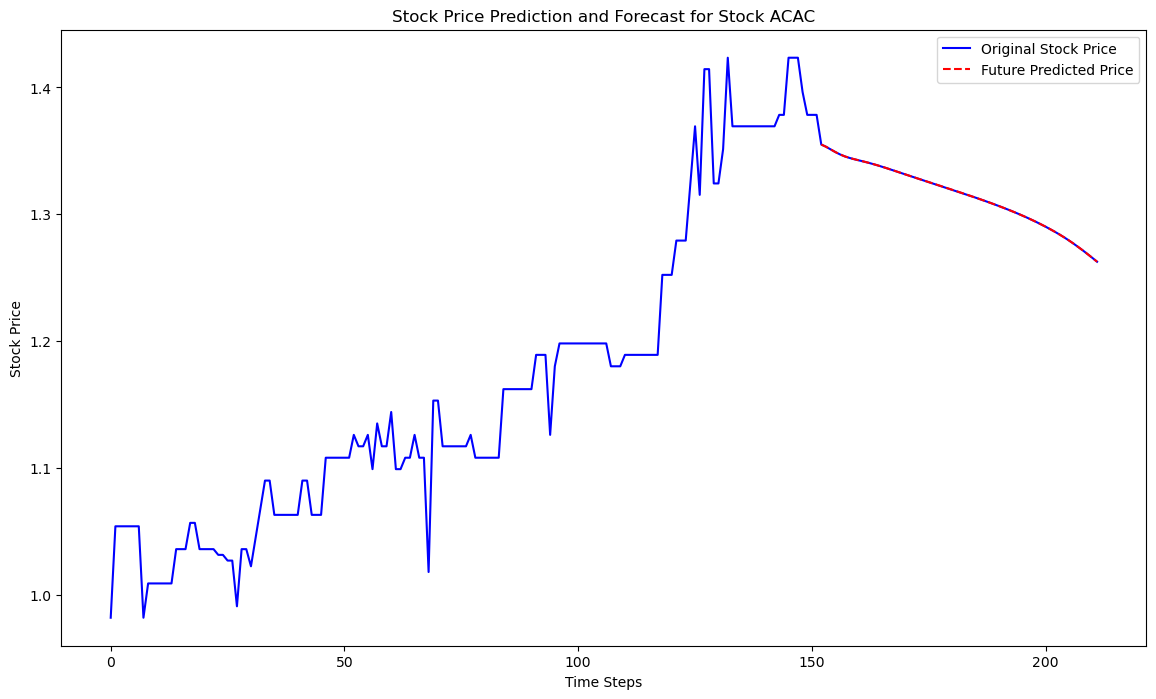

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


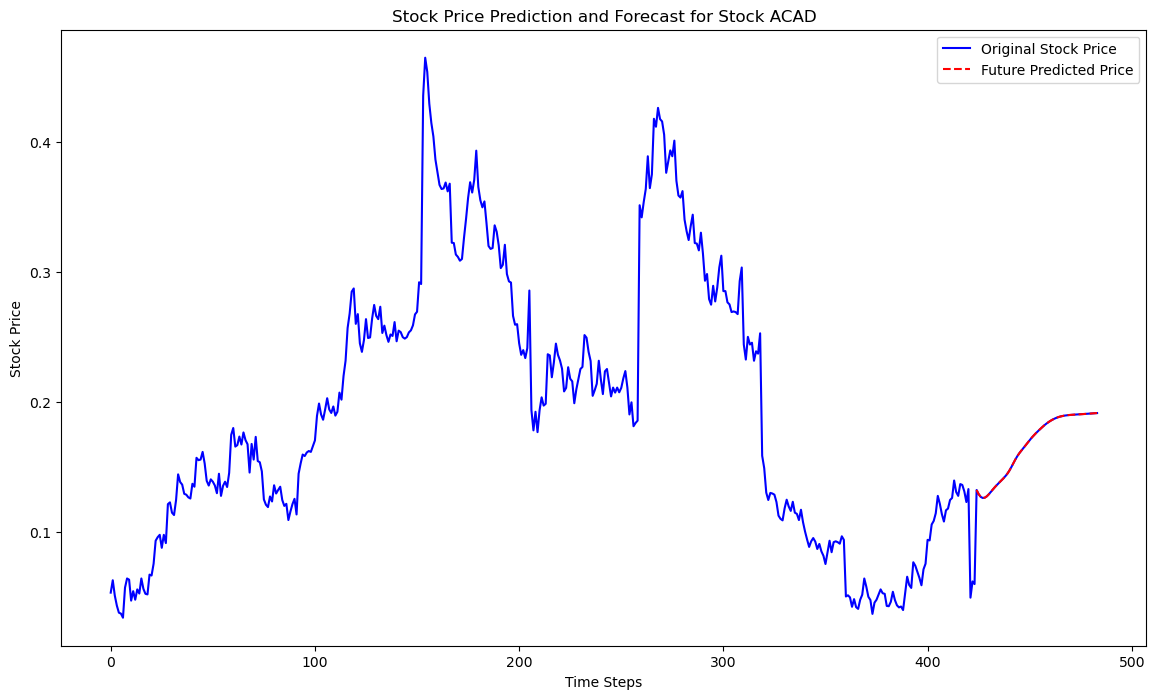

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


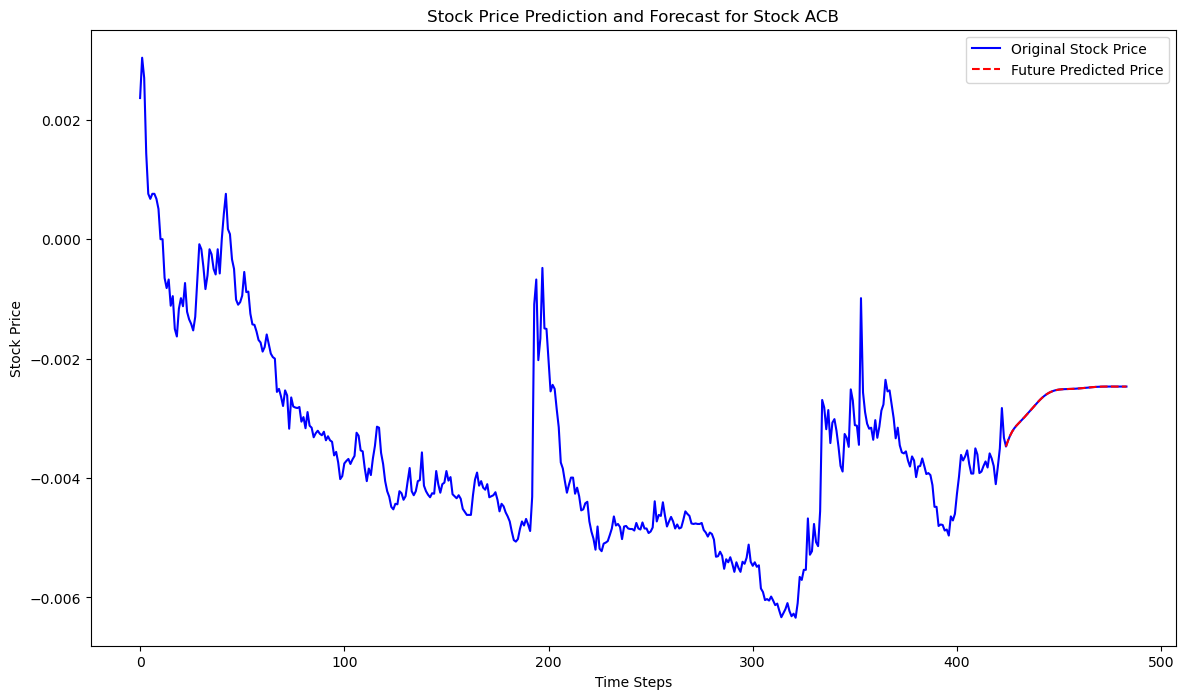

 9/10 [==========================>...] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


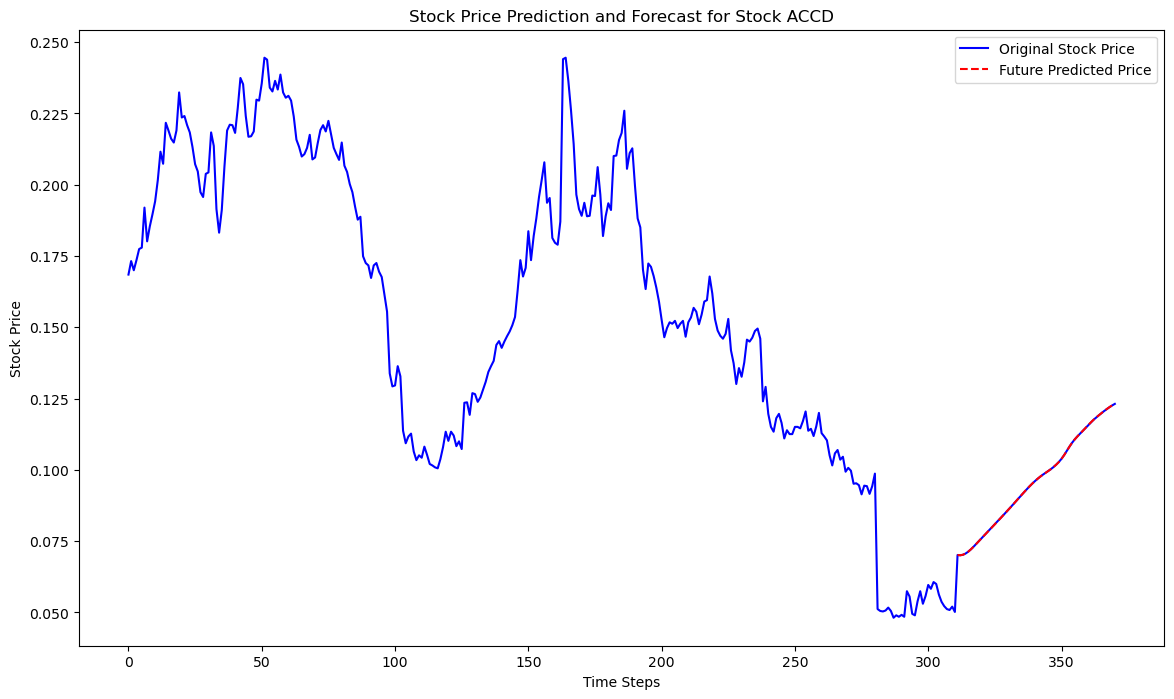

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


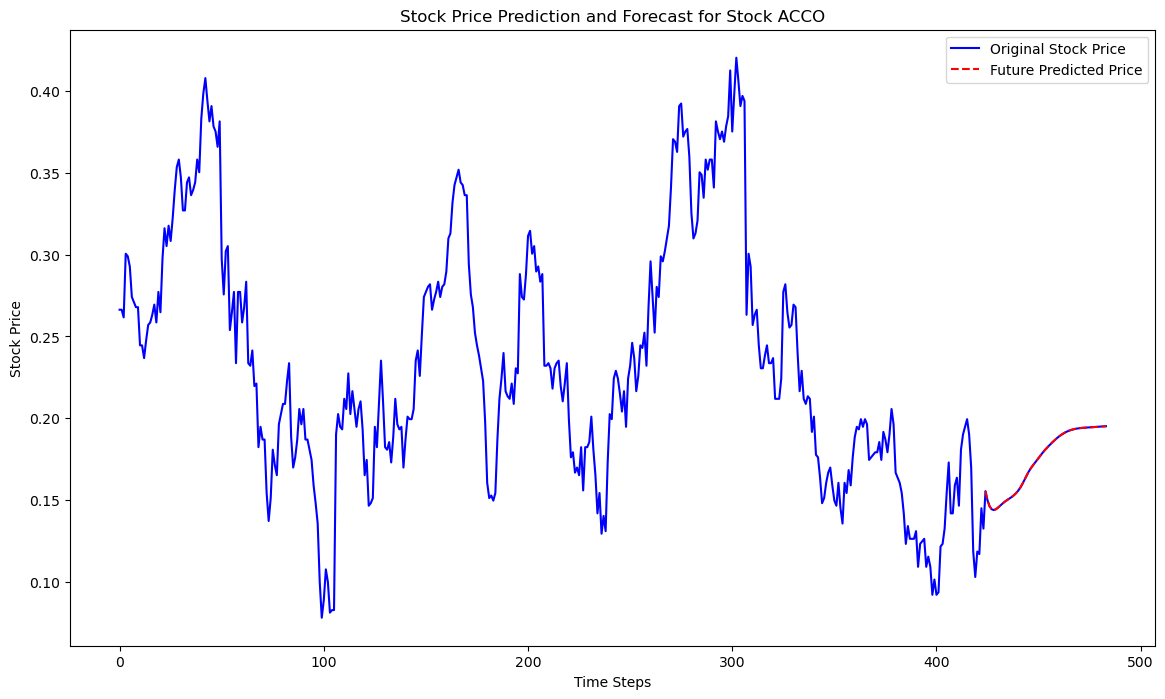

1/1 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


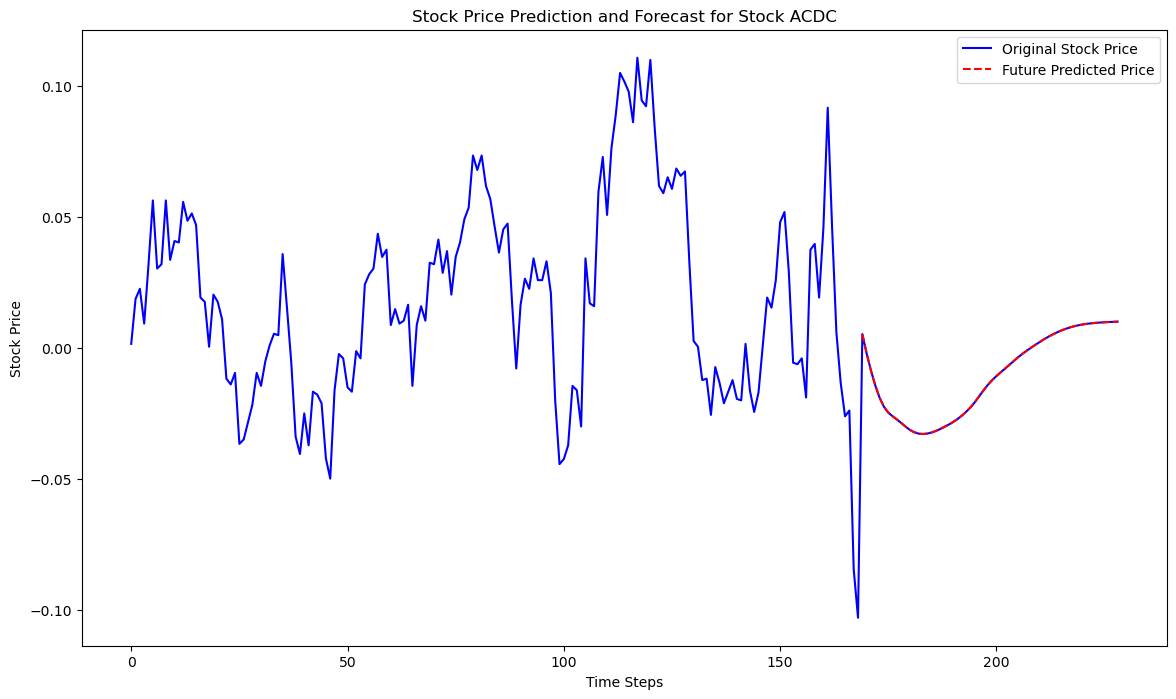

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


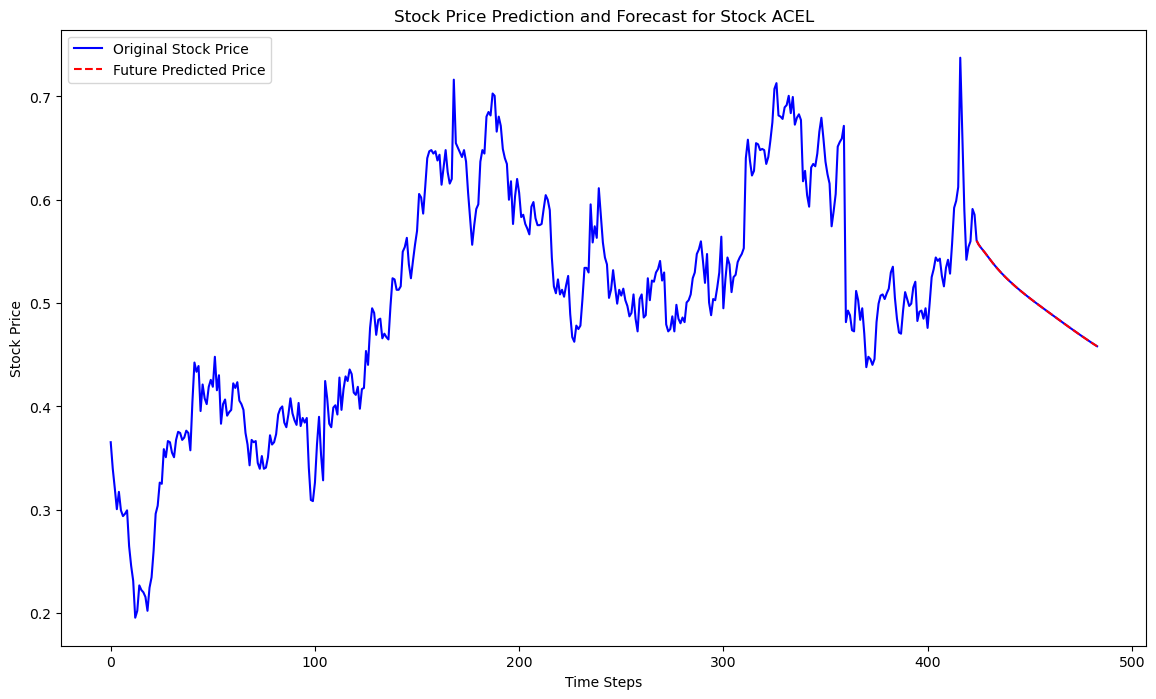

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 24ms/step


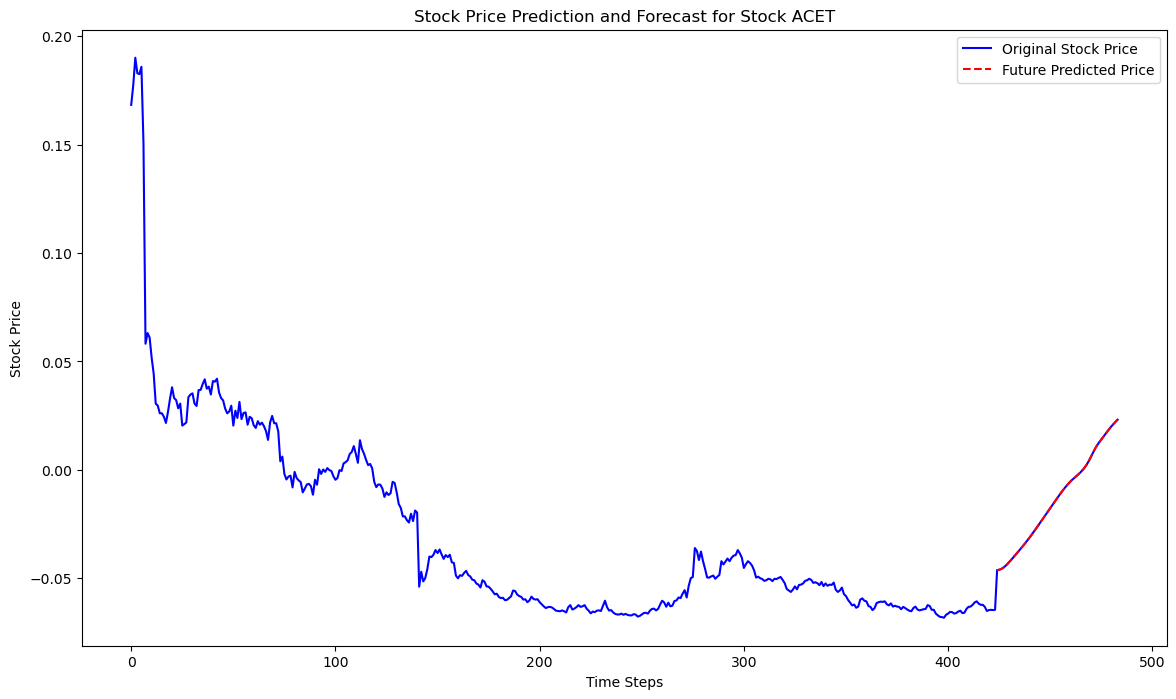

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


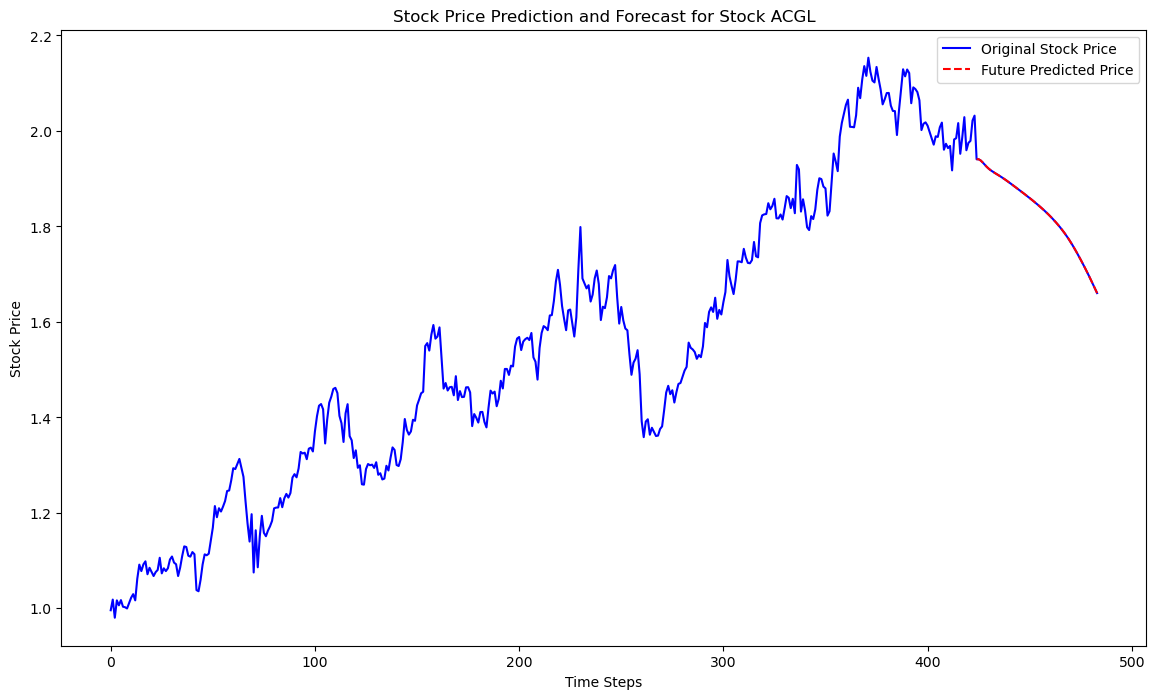

8/8 [==============================] - 0s 15ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


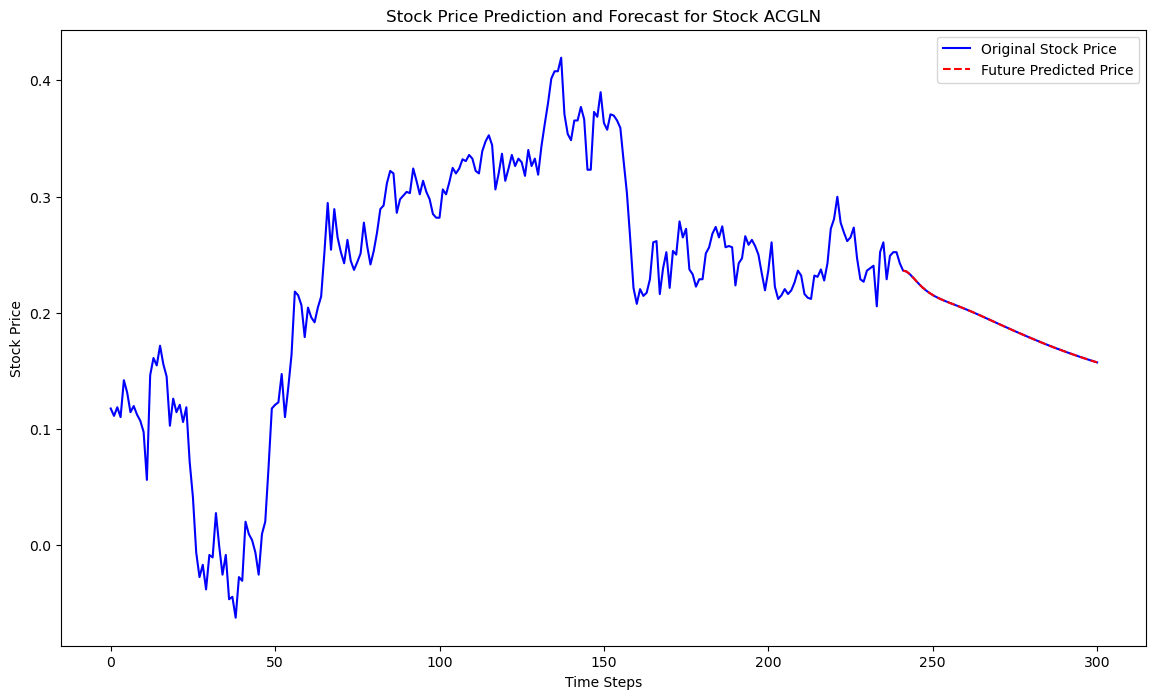

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 26ms/step


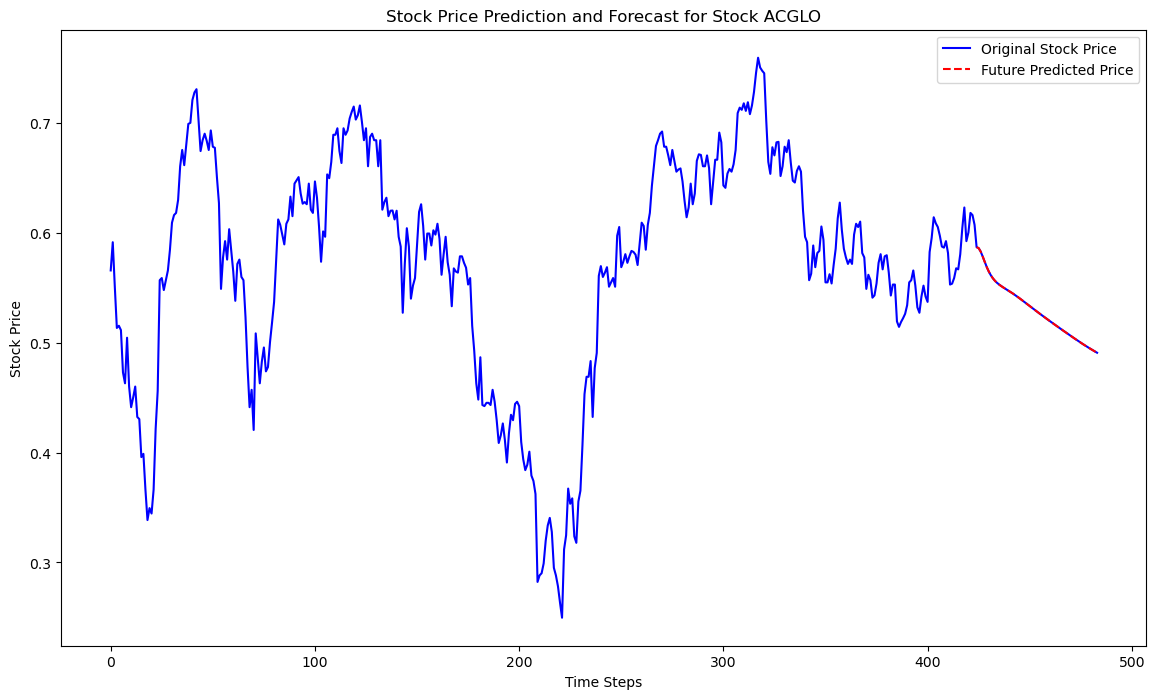

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


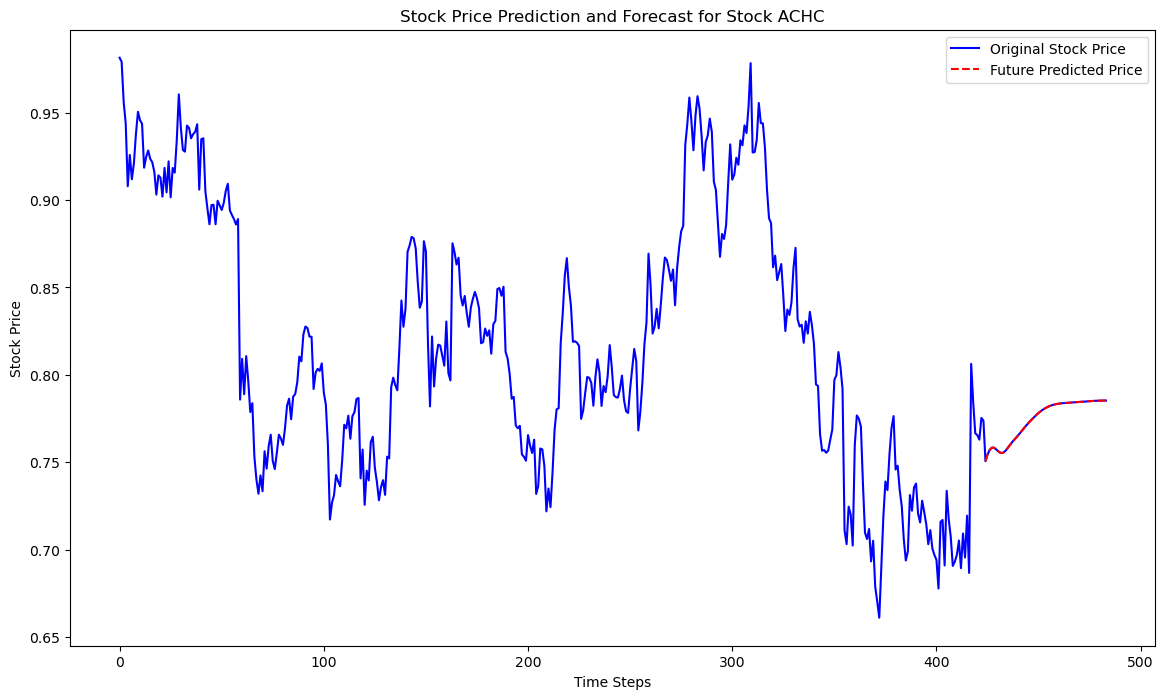

8/8 [==============================] - 0s 15ms/step


C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


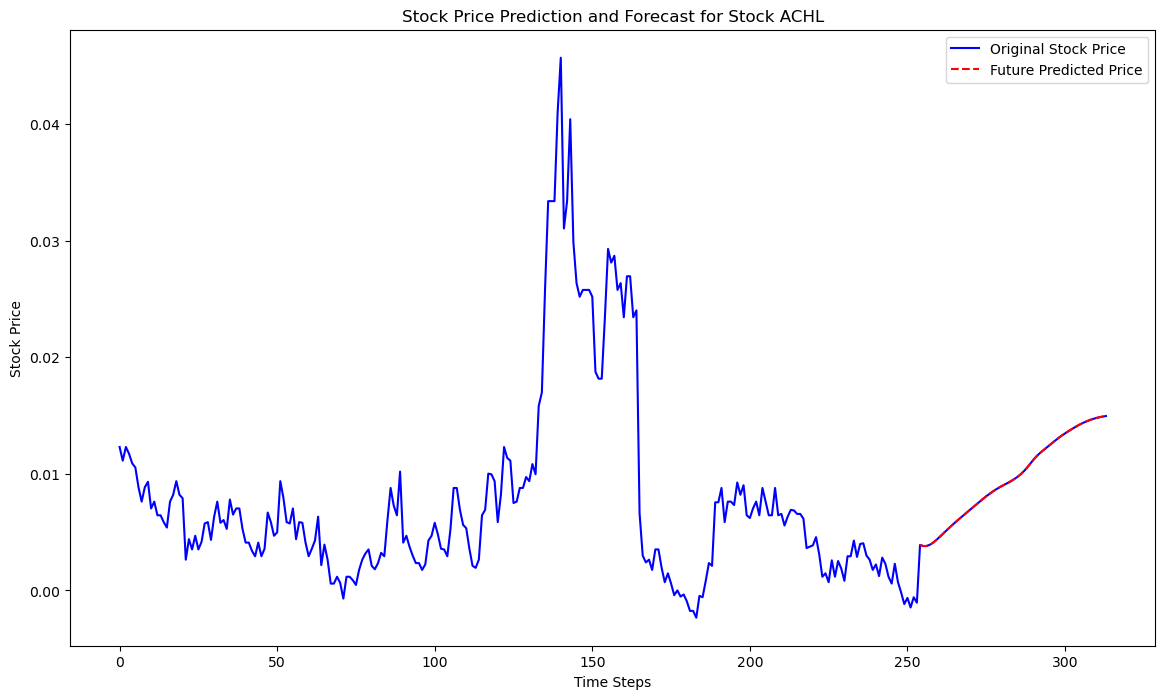

9/9 [==============================] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


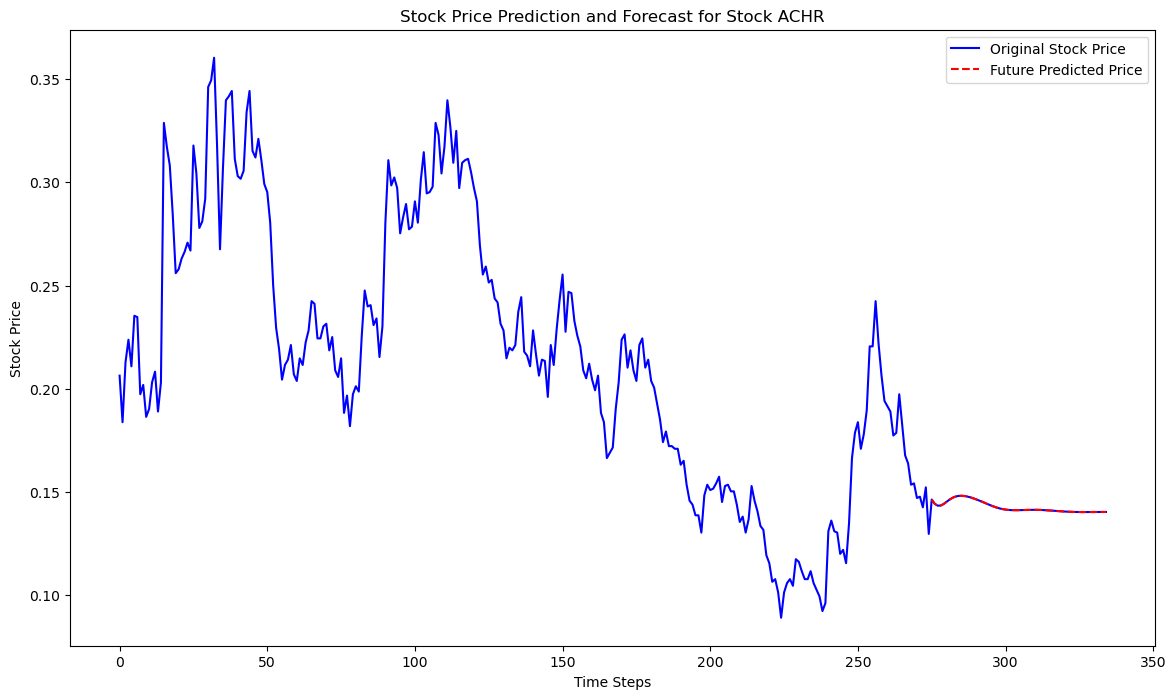

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 19ms/step


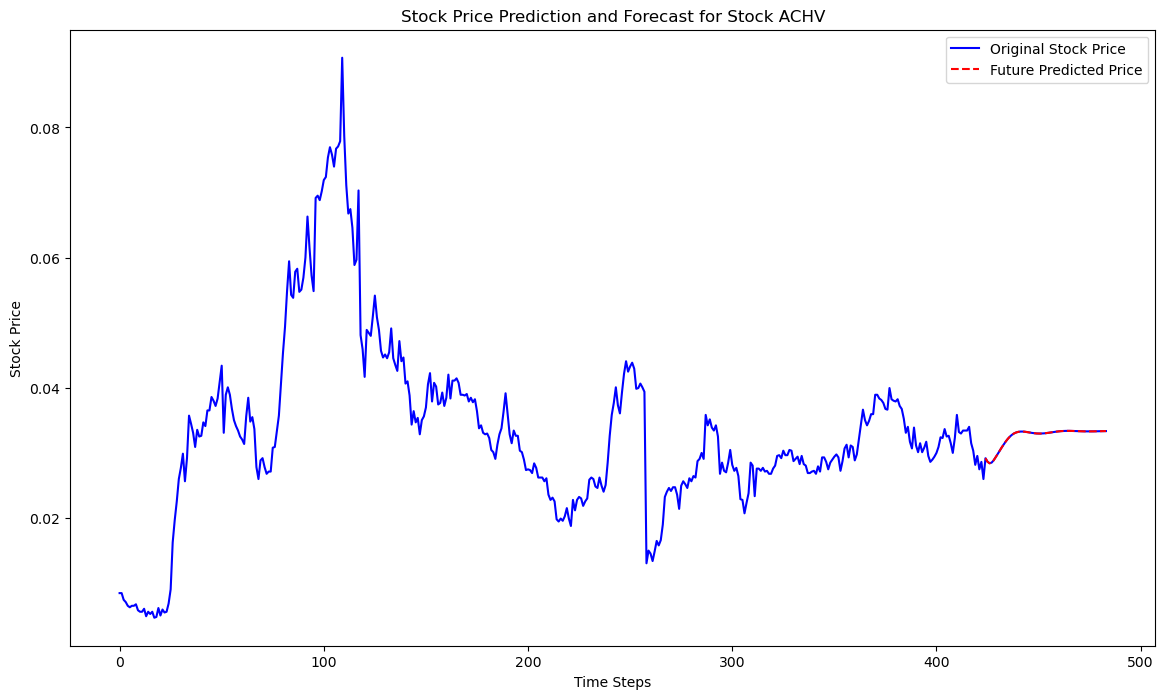

 9/10 [==========================>...] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


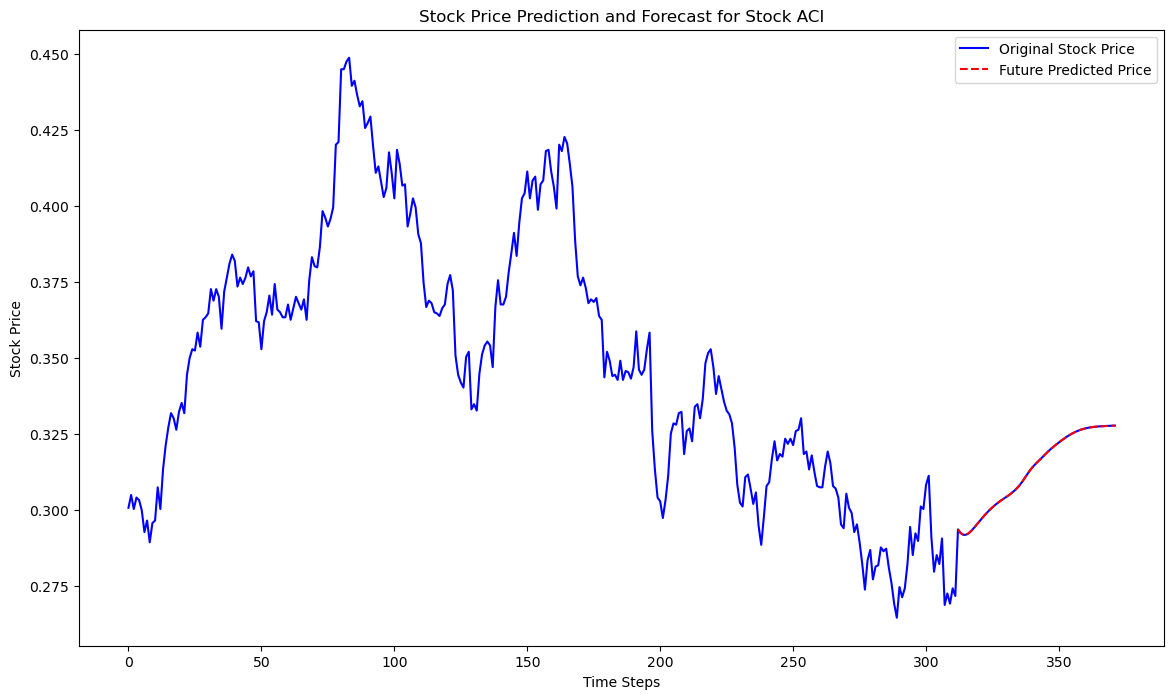

 9/14 [==================>...........] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 20ms/step


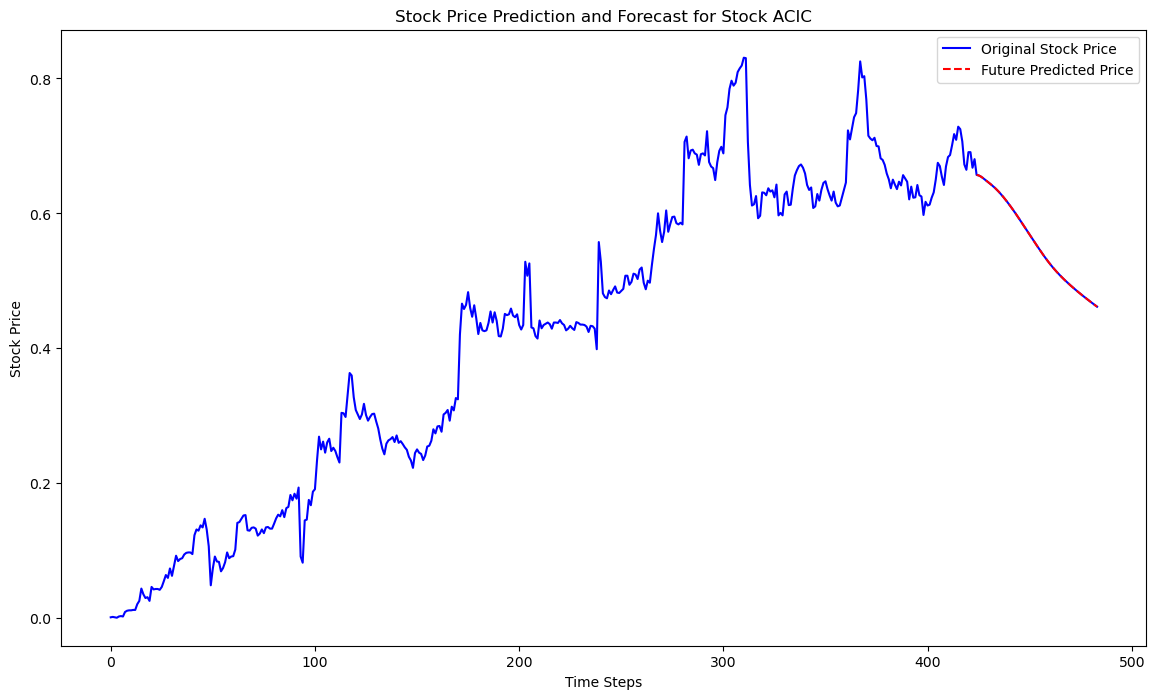

 5/14 [=========>....................] - ETA: 0s

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_8364\186629988.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


1/1 [==============================] - 0s 21ms/step


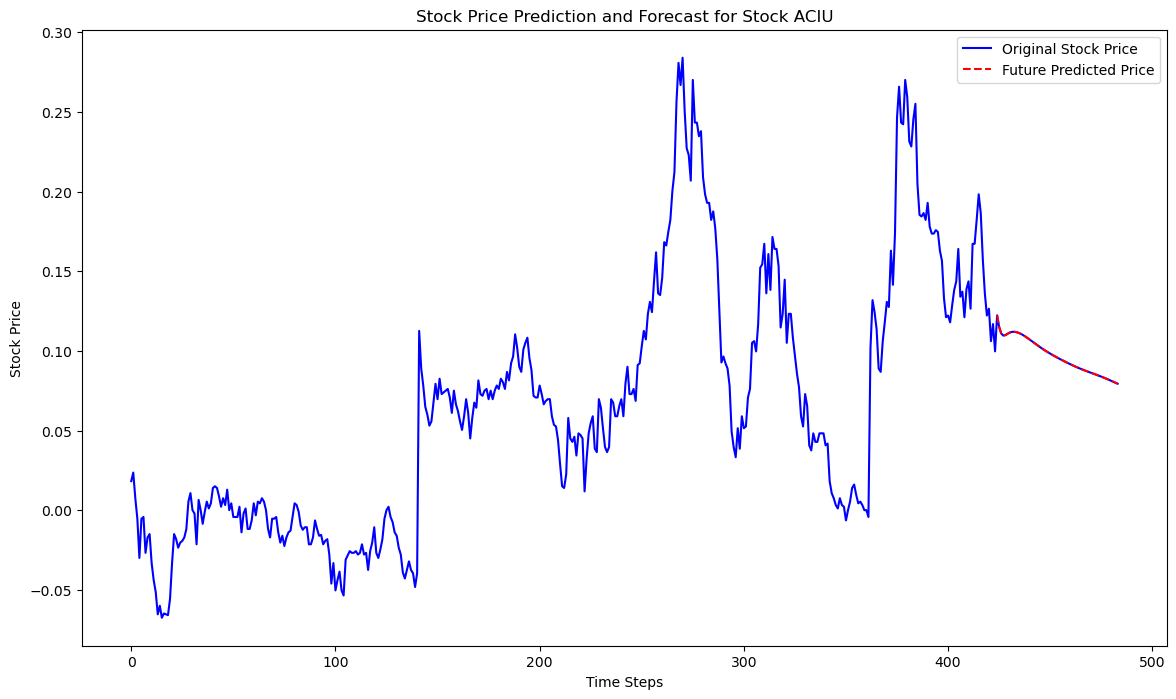

Number of stocks skipped: 1
Skipped stocks: ['ABVE']


In [48]:
num_symbols_to_take = len(dfs_yf)  
future_predictions_dict = {}
skipped_stocks_count = 0  
skipped_stocks_title = []

for j in range(num_symbols_to_take):
    
    dfs_yf[j].reset_index(inplace=True)
    
    data = dfs_yf[j]
    data['Date'] = pd.to_datetime(data['Date'])
    
    train = data[0:int(len(data) * 0.70)]
    test = data[int(len(data) * 0.70):]

    scaler = MinMaxScaler(feature_range=(0, 1))
    train_close = train[['Date', 'Close']]
    test_close = test[['Date', 'Close']]

    train_close['Close'] = scaler.fit_transform(train_close[['Close']])
    test_close['Close'] = scaler.transform(test_close[['Close']])

    x_train = []
    y_train = []
    for i in range(50, len(train_close)):
        x_train.append(train_close[['Close']].iloc[i - 50:i].values)
        y_train.append(train_close['Close'].iloc[i])

    x_train, y_train = np.array(x_train), np.array(y_train)

    past_50_days = train_close[['Close']].iloc[-50:]
    final_df = pd.concat([past_50_days, test_close[['Close']]], ignore_index=True)
    input_data = scaler.fit_transform(final_df)
    x_test = []
    y_test = []

    for i in range(50, input_data.shape[0]):
        x_test.append(input_data[i - 50:i])
        y_test.append(input_data[i, 0])
    x_test, y_test = np.array(x_test), np.array(y_test)

    
    if len(x_test) == 0:
        print(f"No data available for prediction for Stock {selected_stocks[j]}. Skipping this stock.")
        skipped_stocks_count += 1 
        skipped_stocks_title.append(selected_stocks[j])
        continue  

    test_predict = model.predict(x_test)
    test_predict = scaler.inverse_transform(test_predict)

    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    if len(y_test) >= 50:
        
        last_sequence = y_test[-50:]

        future_predictions = []
        current_sequence = last_sequence

        for _ in range(60):  
            current_sequence = current_sequence.reshape((1, 50, 1))
            next_pred = model.predict(current_sequence)
            future_predictions.append(next_pred[0, 0])
            next_pred = next_pred.reshape((1, 1, 1))
            current_sequence = np.append(current_sequence[:, 1:, :], next_pred, axis=1)

        future_predictions = np.array(future_predictions).reshape(-1, 1)
        future_predictions = scaler.inverse_transform(future_predictions)

        future_predictions_dict[f'{selected_stocks[j]}'] = future_predictions

        plt.figure(figsize=(14, 8))

        combined_actual_predicted = np.concatenate((y_test_inv, future_predictions))
        plt.plot(combined_actual_predicted, color='blue', label='Original Stock Price')

        plt.plot(range(len(y_test_inv), len(y_test_inv) + len(future_predictions)), 
                 future_predictions, color='red', linestyle='--', label='Future Predicted Price')

        plt.title(f'Stock Price Prediction and Forecast for Stock {selected_stocks[j]}')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()
    else:
        print(f"Skipping stock {selected_stocks[j]} due to insufficient data points.")
        skipped_stocks_count += 1  
        skipped_stocks_title.append(selected_stocks[j])
        


print(f"Number of stocks skipped: {skipped_stocks_count}")
print("Skipped stocks:", skipped_stocks_title)


In [49]:
print("-" * 80)
for j in range(num_symbols_to_take):
    stock_symbol = selected_stocks[j]
    if stock_symbol in future_predictions_dict:
        print(f"Future values for stock: {stock_symbol}")
        display(future_predictions_dict[stock_symbol])
    else:
        print(f"Removed stock : {stock_symbol}")
    print("-" * 80)

--------------------------------------------------------------------------------
Future values for stock: A


array([[0.61574686],
       [0.6124634 ],
       [0.61019963],
       [0.6083648 ],
       [0.6066974 ],
       [0.60514337],
       [0.6037198 ],
       [0.60243666],
       [0.60127616],
       [0.6002008 ],
       [0.5991678 ],
       [0.59814155],
       [0.5970943 ],
       [0.59601486],
       [0.59489626],
       [0.59373677],
       [0.59253645],
       [0.591301  ],
       [0.59003615],
       [0.5887486 ],
       [0.58744526],
       [0.58613384],
       [0.58482015],
       [0.58350784],
       [0.582199  ],
       [0.5808956 ],
       [0.5796008 ],
       [0.5783191 ],
       [0.57705075],
       [0.5757953 ],
       [0.5745524 ],
       [0.5733217 ],
       [0.57210404],
       [0.57090694],
       [0.5697317 ],
       [0.5685791 ],
       [0.5674507 ],
       [0.56634265],
       [0.56524974],
       [0.56417227],
       [0.5631098 ],
       [0.562064  ],
       [0.5610319 ],
       [0.56001496],
       [0.55901283],
       [0.55802804],
       [0.55706155],
       [0.556

--------------------------------------------------------------------------------
Future values for stock: AA


array([[0.2711237 ],
       [0.27118158],
       [0.27210057],
       [0.2735462 ],
       [0.27523428],
       [0.2769839 ],
       [0.27868363],
       [0.2802907 ],
       [0.28179878],
       [0.2832025 ],
       [0.2844973 ],
       [0.2857378 ],
       [0.28701782],
       [0.2884224 ],
       [0.28996956],
       [0.29168794],
       [0.2936994 ],
       [0.2960094 ],
       [0.29855442],
       [0.30104157],
       [0.30329052],
       [0.30524084],
       [0.3069517 ],
       [0.30855584],
       [0.31015357],
       [0.3118145 ],
       [0.31346333],
       [0.3150401 ],
       [0.3164991 ],
       [0.31785727],
       [0.3191535 ],
       [0.32040942],
       [0.32163775],
       [0.32281026],
       [0.32390383],
       [0.32489982],
       [0.32579568],
       [0.32659605],
       [0.32729936],
       [0.3279039 ],
       [0.32841617],
       [0.3288393 ],
       [0.32917887],
       [0.3294493 ],
       [0.32966182],
       [0.32982892],
       [0.32996005],
       [0.330

--------------------------------------------------------------------------------
Future values for stock: AACG


array([[0.00880124],
       [0.0087202 ],
       [0.00883982],
       [0.00914986],
       [0.00961233],
       [0.01018195],
       [0.0108159 ],
       [0.01148108],
       [0.01215472],
       [0.01282425],
       [0.01348391],
       [0.01413395],
       [0.01477673],
       [0.01541715],
       [0.0160576 ],
       [0.01670091],
       [0.01734784],
       [0.01799858],
       [0.01865217],
       [0.01930801],
       [0.01996403],
       [0.02062259],
       [0.0212841 ],
       [0.02194653],
       [0.02260657],
       [0.02325946],
       [0.02389246],
       [0.0244876 ],
       [0.02504819],
       [0.0255722 ],
       [0.02605512],
       [0.02650018],
       [0.02690793],
       [0.02731754],
       [0.02775018],
       [0.02823258],
       [0.02877406],
       [0.02938827],
       [0.03012234],
       [0.03098203],
       [0.03194761],
       [0.03290562],
       [0.03377816],
       [0.03453649],
       [0.03520186],
       [0.03582291],
       [0.0364418 ],
       [0.037

--------------------------------------------------------------------------------
Future values for stock: AACI


array([[1.1307721 ],
       [1.1808594 ],
       [1.1875964 ],
       [1.1701554 ],
       [1.144761  ],
       [1.1189679 ],
       [1.0963744 ],
       [1.0776342 ],
       [1.0622201 ],
       [1.0493971 ],
       [1.0385958 ],
       [1.0294336 ],
       [1.0215914 ],
       [1.0147763 ],
       [1.0087225 ],
       [1.0032432 ],
       [0.99816746],
       [0.99334514],
       [0.98866904],
       [0.98406297],
       [0.9794808 ],
       [0.9749001 ],
       [0.97032076],
       [0.96569705],
       [0.9609552 ],
       [0.9560567 ],
       [0.9509891 ],
       [0.945743  ],
       [0.9403177 ],
       [0.9347138 ],
       [0.92895055],
       [0.92303276],
       [0.9169873 ],
       [0.9108452 ],
       [0.9046096 ],
       [0.8983012 ],
       [0.89192784],
       [0.88550013],
       [0.8790361 ],
       [0.872447  ],
       [0.8659354 ],
       [0.8594847 ],
       [0.8531553 ],
       [0.84694904],
       [0.8409236 ],
       [0.8350563 ],
       [0.8293544 ],
       [0.823

--------------------------------------------------------------------------------
Future values for stock: AACT


array([[1.286653 ],
       [1.2864016],
       [1.2850864],
       [1.2832997],
       [1.2815194],
       [1.2800564],
       [1.278985 ],
       [1.2782139],
       [1.277601 ],
       [1.2770241],
       [1.2764021],
       [1.2756971],
       [1.2748989],
       [1.2740128],
       [1.2730511],
       [1.2720312],
       [1.270972 ],
       [1.2698908],
       [1.2687997],
       [1.2677072],
       [1.2666178],
       [1.265534 ],
       [1.2644577],
       [1.2633814],
       [1.2623086],
       [1.2612329],
       [1.2601544],
       [1.2590702],
       [1.2579744],
       [1.2568741],
       [1.2557567],
       [1.2546303],
       [1.2534815],
       [1.2523236],
       [1.2511357],
       [1.2499293],
       [1.248697 ],
       [1.2474303],
       [1.2461299],
       [1.2447882],
       [1.2434131],
       [1.2419814],
       [1.2405075],
       [1.2389704],
       [1.2373809],
       [1.2357284],
       [1.2340178],
       [1.2322417],
       [1.2303766],
       [1.2284398],


--------------------------------------------------------------------------------
Future values for stock: AADI


array([[-0.07688513],
       [-0.07681258],
       [-0.07654439],
       [-0.07607161],
       [-0.07542156],
       [-0.07464022],
       [-0.07377532],
       [-0.07286356],
       [-0.07193019],
       [-0.0709904 ],
       [-0.07004943],
       [-0.0691036 ],
       [-0.0681499 ],
       [-0.06718108],
       [-0.06619304],
       [-0.06518159],
       [-0.06414516],
       [-0.06308299],
       [-0.06199538],
       [-0.06088093],
       [-0.05974999],
       [-0.05860505],
       [-0.05745132],
       [-0.05629003],
       [-0.05512761],
       [-0.05396049],
       [-0.0528017 ],
       [-0.05165114],
       [-0.05050735],
       [-0.04937004],
       [-0.04823893],
       [-0.04711795],
       [-0.04602137],
       [-0.04497224],
       [-0.04398872],
       [-0.04306498],
       [-0.04220806],
       [-0.04141963],
       [-0.0406992 ],
       [-0.04001608],
       [-0.03931916],
       [-0.03855792],
       [-0.0377054 ],
       [-0.03675958],
       [-0.03565551],
       [-0

--------------------------------------------------------------------------------
Future values for stock: AAGR


array([[-7.9397845],
       [-7.9356775],
       [-7.9235306],
       [-7.903034 ],
       [-7.875312 ],
       [-7.842217 ],
       [-7.805753 ],
       [-7.767494 ],
       [-7.728531 ],
       [-7.6894784],
       [-7.650517 ],
       [-7.6115904],
       [-7.572447 ],
       [-7.5327897],
       [-7.492435 ],
       [-7.4510913],
       [-7.408645 ],
       [-7.365021 ],
       [-7.320137 ],
       [-7.2741995],
       [-7.2274914],
       [-7.1801915],
       [-7.13231  ],
       [-7.083853 ],
       [-7.035181 ],
       [-6.986563 ],
       [-6.9379616],
       [-6.889418 ],
       [-6.8412533],
       [-6.793361 ],
       [-6.7457633],
       [-6.698456 ],
       [-6.6516404],
       [-6.605955 ],
       [-6.562508 ],
       [-6.5217505],
       [-6.4835544],
       [-6.448167 ],
       [-6.4156585],
       [-6.385991 ],
       [-6.3573666],
       [-6.3279333],
       [-6.29549  ],
       [-6.2590857],
       [-6.218528 ],
       [-6.170772 ],
       [-6.1141367],
       [-6.04

--------------------------------------------------------------------------------
Future values for stock: AAL


array([[0.0615794 ],
       [0.06030484],
       [0.05994358],
       [0.06043302],
       [0.06158542],
       [0.06318634],
       [0.0650418 ],
       [0.06700181],
       [0.06896375],
       [0.07086959],
       [0.07269675],
       [0.07444789],
       [0.07613914],
       [0.07778758],
       [0.07940408],
       [0.08098203],
       [0.08249277],
       [0.08391937],
       [0.08526524],
       [0.08651913],
       [0.08767552],
       [0.08873282],
       [0.08975051],
       [0.09079244],
       [0.09193625],
       [0.09321544],
       [0.09463514],
       [0.09630156],
       [0.09828437],
       [0.10057239],
       [0.10299639],
       [0.10526399],
       [0.10726473],
       [0.10900434],
       [0.11058017],
       [0.11210045],
       [0.11366493],
       [0.11526877],
       [0.11682835],
       [0.11828508],
       [0.11963323],
       [0.12090519],
       [0.12212344],
       [0.12331468],
       [0.12446519],
       [0.12554616],
       [0.12654331],
       [0.127

--------------------------------------------------------------------------------
Future values for stock: AAMC


array([[0.00735464],
       [0.00733167],
       [0.00717836],
       [0.00702259],
       [0.00695056],
       [0.00701173],
       [0.00722703],
       [0.00759608],
       [0.00810032],
       [0.00867755],
       [0.00923744],
       [0.00974318],
       [0.01018132],
       [0.01057344],
       [0.01094997],
       [0.0113353 ],
       [0.01173683],
       [0.01213092],
       [0.01250174],
       [0.01284419],
       [0.01316467],
       [0.01346981],
       [0.0137663 ],
       [0.01405187],
       [0.01431977],
       [0.01456691],
       [0.01479014],
       [0.01498935],
       [0.01516613],
       [0.01531986],
       [0.015451  ],
       [0.01556068],
       [0.01565055],
       [0.015723  ],
       [0.01578093],
       [0.01582681],
       [0.01586282],
       [0.01589288],
       [0.01591666],
       [0.01593748],
       [0.01595699],
       [0.01597638],
       [0.01599387],
       [0.01601525],
       [0.01603808],
       [0.01606156],
       [0.01608397],
       [0.016

--------------------------------------------------------------------------------
Future values for stock: AAME


array([[0.03681688],
       [0.03642679],
       [0.03656223],
       [0.03720206],
       [0.03824753],
       [0.03957958],
       [0.04108562],
       [0.04267421],
       [0.04428484],
       [0.04587948],
       [0.04744129],
       [0.04896898],
       [0.05047116],
       [0.05195717],
       [0.05345143],
       [0.05494165],
       [0.0564524 ],
       [0.05797181],
       [0.05949844],
       [0.06102738],
       [0.06254949],
       [0.06407493],
       [0.06559598],
       [0.06711382],
       [0.06861774],
       [0.07008819],
       [0.07148961],
       [0.0728063 ],
       [0.07404393],
       [0.07519596],
       [0.07625524],
       [0.07722512],
       [0.07816134],
       [0.07912496],
       [0.08019106],
       [0.08139077],
       [0.0827303 ],
       [0.08430997],
       [0.08618189],
       [0.08833484],
       [0.0905911 ],
       [0.09269346],
       [0.09453688],
       [0.09613993],
       [0.09760063],
       [0.09901638],
       [0.10047871],
       [0.101

--------------------------------------------------------------------------------
Future values for stock: AAN


array([[0.06841527],
       [0.06826578],
       [0.06837606],
       [0.06872755],
       [0.06922352],
       [0.0697583 ],
       [0.07025509],
       [0.0706774 ],
       [0.07101174],
       [0.07126246],
       [0.07143822],
       [0.07154822],
       [0.07159817],
       [0.07159526],
       [0.07155452],
       [0.07148618],
       [0.07140126],
       [0.071311  ],
       [0.0712252 ],
       [0.07115171],
       [0.07109644],
       [0.07106287],
       [0.07105194],
       [0.07106302],
       [0.07109361],
       [0.07113991],
       [0.07119755],
       [0.07126194],
       [0.0713287 ],
       [0.07139357],
       [0.07145291],
       [0.07150415],
       [0.0715453 ],
       [0.07157547],
       [0.07159413],
       [0.07160208],
       [0.07160088],
       [0.07159232],
       [0.07157844],
       [0.07156143],
       [0.07154331],
       [0.07152587],
       [0.07151052],
       [0.07149847],
       [0.07149015],
       [0.07148586],
       [0.07148567],
       [0.071

--------------------------------------------------------------------------------
Future values for stock: AAOI


array([[0.3558059 ],
       [0.35269994],
       [0.35305306],
       [0.35570544],
       [0.3605443 ],
       [0.36727616],
       [0.37511906],
       [0.38322884],
       [0.39052603],
       [0.39697555],
       [0.40259027],
       [0.40804783],
       [0.4136915 ],
       [0.4196974 ],
       [0.42596915],
       [0.4320973 ],
       [0.43785253],
       [0.44323063],
       [0.4482725 ],
       [0.4530329 ],
       [0.45762047],
       [0.46197426],
       [0.46603456],
       [0.46962148],
       [0.47279283],
       [0.47561505],
       [0.47805986],
       [0.4801547 ],
       [0.48189   ],
       [0.48330233],
       [0.48443344],
       [0.48533013],
       [0.48603413],
       [0.48661754],
       [0.48708698],
       [0.48748922],
       [0.48783657],
       [0.48815182],
       [0.488502  ],
       [0.48888758],
       [0.48929363],
       [0.4897118 ],
       [0.49013546],
       [0.4905845 ],
       [0.490994  ],
       [0.49139   ],
       [0.49177268],
       [0.492

--------------------------------------------------------------------------------
Future values for stock: AAON


array([[1.9067205],
       [1.9053807],
       [1.9030987],
       [1.9000571],
       [1.8966434],
       [1.8931496],
       [1.8897293],
       [1.88641  ],
       [1.8831614],
       [1.8799348],
       [1.8766774],
       [1.8733503],
       [1.8699393],
       [1.8664281],
       [1.8628165],
       [1.8591092],
       [1.8553038],
       [1.851405 ],
       [1.8473855],
       [1.843277 ],
       [1.8390647],
       [1.8347216],
       [1.8302616],
       [1.8256311],
       [1.8208224],
       [1.815828 ],
       [1.8106354],
       [1.8052435],
       [1.7996223],
       [1.7937245],
       [1.7875222],
       [1.7810359],
       [1.7741766],
       [1.767001 ],
       [1.7594594],
       [1.7515869],
       [1.7434198],
       [1.734987 ],
       [1.7263825],
       [1.7175761],
       [1.7085476],
       [1.6993005],
       [1.6898632],
       [1.680195 ],
       [1.6703242],
       [1.6603229],
       [1.6502925],
       [1.640261 ],
       [1.630254 ],
       [1.6202778],


--------------------------------------------------------------------------------
Future values for stock: AAP


array([[-0.04076033],
       [-0.04065811],
       [-0.03939802],
       [-0.03698464],
       [-0.03363606],
       [-0.02963784],
       [-0.02526365],
       [-0.02072822],
       [-0.01617994],
       [-0.01170772],
       [-0.00734334],
       [-0.00308408],
       [ 0.00108617],
       [ 0.00519577],
       [ 0.00927623],
       [ 0.01333262],
       [ 0.01736219],
       [ 0.02132191],
       [ 0.02512923],
       [ 0.02871308],
       [ 0.03209098],
       [ 0.03523333],
       [ 0.03813373],
       [ 0.04078841],
       [ 0.04329356],
       [ 0.04584805],
       [ 0.04862657],
       [ 0.05173625],
       [ 0.05519519],
       [ 0.0592105 ],
       [ 0.06403167],
       [ 0.06962697],
       [ 0.07568049],
       [ 0.0814397 ],
       [ 0.08657914],
       [ 0.09103999],
       [ 0.09502754],
       [ 0.09883491],
       [ 0.10270804],
       [ 0.10672083],
       [ 0.11064575],
       [ 0.11434112],
       [ 0.11775586],
       [ 0.1209586 ],
       [ 0.12401944],
       [ 0

--------------------------------------------------------------------------------
Future values for stock: AAPL


array([[1.2256175],
       [1.223903 ],
       [1.2234983],
       [1.223404 ],
       [1.2230356],
       [1.2221615],
       [1.220787 ],
       [1.2190164],
       [1.2169871],
       [1.214801 ],
       [1.2125447],
       [1.2102654],
       [1.2079912],
       [1.2057182],
       [1.2034392],
       [1.20114  ],
       [1.1987988],
       [1.1963867],
       [1.193882 ],
       [1.191258 ],
       [1.1884828],
       [1.1855538],
       [1.1824586],
       [1.1792008],
       [1.1758064],
       [1.1722858],
       [1.1686565],
       [1.1649466],
       [1.1611372],
       [1.1572498],
       [1.153271 ],
       [1.1492021],
       [1.1450499],
       [1.1408553],
       [1.1366539],
       [1.13245  ],
       [1.1282601],
       [1.1240847],
       [1.1199366],
       [1.115803 ],
       [1.111681 ],
       [1.1075846],
       [1.1035395],
       [1.0995699],
       [1.0957066],
       [1.091954 ],
       [1.0883336],
       [1.0848473],
       [1.0814956],
       [1.0782762],


--------------------------------------------------------------------------------
Future values for stock: AAT


array([[0.13559632],
       [0.13283314],
       [0.12977898],
       [0.12661894],
       [0.12362734],
       [0.12099636],
       [0.11879262],
       [0.11698698],
       [0.11550147],
       [0.11424641],
       [0.11314384],
       [0.11212969],
       [0.11115461],
       [0.11018175],
       [0.10918758],
       [0.10815861],
       [0.10708681],
       [0.10597005],
       [0.10481017],
       [0.10361195],
       [0.10238135],
       [0.10112586],
       [0.09985238],
       [0.09856674],
       [0.09727392],
       [0.09597977],
       [0.09468969],
       [0.09340604],
       [0.09212895],
       [0.09086012],
       [0.08959979],
       [0.08834817],
       [0.08710448],
       [0.08587103],
       [0.08464836],
       [0.08343416],
       [0.08222531],
       [0.08102192],
       [0.0798251 ],
       [0.07863604],
       [0.07745471],
       [0.0762817 ],
       [0.07511432],
       [0.07395311],
       [0.07280282],
       [0.07166792],
       [0.07055248],
       [0.069

--------------------------------------------------------------------------------
Future values for stock: AB


array([[0.43615633],
       [0.4307242 ],
       [0.42794368],
       [0.42710543],
       [0.42719078],
       [0.42752725],
       [0.42774516],
       [0.4277512 ],
       [0.4275876 ],
       [0.42731953],
       [0.4269907 ],
       [0.42661726],
       [0.42619956],
       [0.42573154],
       [0.4252145 ],
       [0.42465928],
       [0.42407718],
       [0.4234804 ],
       [0.42288092],
       [0.4222885 ],
       [0.42170316],
       [0.42112523],
       [0.42055687],
       [0.41999906],
       [0.41945207],
       [0.41891742],
       [0.4183936 ],
       [0.41787866],
       [0.41737083],
       [0.41686967],
       [0.41637287],
       [0.41588208],
       [0.4153907 ],
       [0.4148927 ],
       [0.41438776],
       [0.4138812 ],
       [0.4133828 ],
       [0.41290385],
       [0.4124565 ],
       [0.41204885],
       [0.41168576],
       [0.41137055],
       [0.41110155],
       [0.4108733 ],
       [0.4106846 ],
       [0.41053072],
       [0.41040486],
       [0.410

--------------------------------------------------------------------------------
Future values for stock: ABAT


array([[0.0322706 ],
       [0.03240554],
       [0.03278412],
       [0.03341594],
       [0.03426796],
       [0.03528481],
       [0.03640596],
       [0.03758109],
       [0.03877776],
       [0.03997749],
       [0.04117477],
       [0.04237164],
       [0.04357518],
       [0.04479356],
       [0.04603498],
       [0.04730478],
       [0.04860765],
       [0.04994673],
       [0.05132164],
       [0.05273261],
       [0.05416749],
       [0.05562133],
       [0.05709259],
       [0.05858148],
       [0.06007865],
       [0.06157478],
       [0.06306789],
       [0.06456202],
       [0.06604514],
       [0.06751903],
       [0.06898393],
       [0.07044046],
       [0.07188267],
       [0.07329363],
       [0.07464068],
       [0.07590348],
       [0.0770886 ],
       [0.07818796],
       [0.0791991 ],
       [0.08012261],
       [0.08100196],
       [0.08190008],
       [0.08288423],
       [0.08398731],
       [0.08521113],
       [0.08664352],
       [0.08835477],
       [0.090

--------------------------------------------------------------------------------
Future values for stock: ABBV


array([[1.0607048 ],
       [1.0633384 ],
       [1.0634872 ],
       [1.0620354 ],
       [1.0599504 ],
       [1.0580015 ],
       [1.0566106 ],
       [1.0557988 ],
       [1.0553839 ],
       [1.0551511 ],
       [1.0549345 ],
       [1.0546353 ],
       [1.0542102 ],
       [1.0536478 ],
       [1.052956  ],
       [1.0521541 ],
       [1.0512667 ],
       [1.050316  ],
       [1.049323  ],
       [1.0483015 ],
       [1.047262  ],
       [1.0462093 ],
       [1.045147  ],
       [1.0440779 ],
       [1.0429984 ],
       [1.0419034 ],
       [1.0407916 ],
       [1.0396572 ],
       [1.0384983 ],
       [1.0373099 ],
       [1.0360879 ],
       [1.0348268 ],
       [1.0335244 ],
       [1.0321685 ],
       [1.0307622 ],
       [1.0292966 ],
       [1.0277647 ],
       [1.0261596 ],
       [1.024478  ],
       [1.0227069 ],
       [1.0208329 ],
       [1.0188699 ],
       [1.0167706 ],
       [1.0145731 ],
       [1.0122756 ],
       [1.0098966 ],
       [1.0074649 ],
       [1.004

--------------------------------------------------------------------------------
Future values for stock: ABCB


array([[0.9482746 ],
       [0.94757855],
       [0.94782364],
       [0.9482371 ],
       [0.94836134],
       [0.9480234 ],
       [0.947222  ],
       [0.9460333 ],
       [0.94456124],
       [0.9429065 ],
       [0.9411518 ],
       [0.93935996],
       [0.93756795],
       [0.93579346],
       [0.9340409 ],
       [0.9323075 ],
       [0.9305849 ],
       [0.92885756],
       [0.9271168 ],
       [0.92535055],
       [0.92354995],
       [0.92170686],
       [0.91981137],
       [0.9178559 ],
       [0.9158336 ],
       [0.91373914],
       [0.91156244],
       [0.9092826 ],
       [0.9069119 ],
       [0.90442574],
       [0.90182656],
       [0.89909863],
       [0.8962122 ],
       [0.8931628 ],
       [0.88993007],
       [0.886525  ],
       [0.88296396],
       [0.8792449 ],
       [0.8754183 ],
       [0.8714974 ],
       [0.86748934],
       [0.8634015 ],
       [0.85923034],
       [0.8549714 ],
       [0.8506337 ],
       [0.84620255],
       [0.8417    ],
       [0.837

--------------------------------------------------------------------------------
Future values for stock: ABCL


array([[-0.04316044],
       [-0.0433643 ],
       [-0.0433795 ],
       [-0.04320245],
       [-0.04286676],
       [-0.04241858],
       [-0.04190283],
       [-0.041355  ],
       [-0.04080048],
       [-0.04025518],
       [-0.0397267 ],
       [-0.03921493],
       [-0.03871733],
       [-0.03822983],
       [-0.03774946],
       [-0.03727205],
       [-0.03679684],
       [-0.0363224 ],
       [-0.03585204],
       [-0.03539421],
       [-0.03496131],
       [-0.03455288],
       [-0.03417061],
       [-0.03381675],
       [-0.03349184],
       [-0.03319541],
       [-0.03290066],
       [-0.03259185],
       [-0.03224867],
       [-0.03186332],
       [-0.0314288 ],
       [-0.03091184],
       [-0.0303051 ],
       [-0.02961477],
       [-0.0289156 ],
       [-0.0282723 ],
       [-0.02771222],
       [-0.02722247],
       [-0.02676936],
       [-0.02632271],
       [-0.02585763],
       [-0.02539061],
       [-0.0249411 ],
       [-0.02452576],
       [-0.02414006],
       [-0

--------------------------------------------------------------------------------
Future values for stock: ABEO


array([[0.0085734 ],
       [0.00834271],
       [0.00821775],
       [0.0081913 ],
       [0.00823695],
       [0.00832617],
       [0.00843719],
       [0.00855506],
       [0.00866801],
       [0.0087695 ],
       [0.00885547],
       [0.00892428],
       [0.00897537],
       [0.00900897],
       [0.00902633],
       [0.00902887],
       [0.00901863],
       [0.00899837],
       [0.00897112],
       [0.0089403 ],
       [0.0089087 ],
       [0.00887875],
       [0.00885247],
       [0.00883138],
       [0.00881649],
       [0.00880802],
       [0.00880562],
       [0.00880869],
       [0.00881632],
       [0.0088274 ],
       [0.00884069],
       [0.00885501],
       [0.00886919],
       [0.00888246],
       [0.0088939 ],
       [0.00890286],
       [0.00890904],
       [0.0089124 ],
       [0.00891314],
       [0.00891157],
       [0.00890814],
       [0.00890332],
       [0.00889772],
       [0.00889181],
       [0.00888607],
       [0.00888085],
       [0.00887646],
       [0.008

--------------------------------------------------------------------------------
Future values for stock: ABEV


array([[0.07202747],
       [0.07460959],
       [0.07735244],
       [0.0800012 ],
       [0.08239572],
       [0.08450554],
       [0.08634774],
       [0.08803797],
       [0.08963397],
       [0.09119262],
       [0.09275806],
       [0.094345  ],
       [0.09595366],
       [0.09759122],
       [0.09924651],
       [0.10090531],
       [0.10254087],
       [0.10411324],
       [0.10558721],
       [0.10697388],
       [0.10826297],
       [0.10945206],
       [0.11054116],
       [0.1115521 ],
       [0.11258041],
       [0.11368525],
       [0.11491906],
       [0.11630194],
       [0.11788531],
       [0.11979479],
       [0.12202542],
       [0.12448109],
       [0.12685595],
       [0.12899561],
       [0.13085218],
       [0.13249604],
       [0.1340527 ],
       [0.13562073],
       [0.1372519 ],
       [0.13885896],
       [0.14038108],
       [0.14178696],
       [0.1431003 ],
       [0.1443536 ],
       [0.14557125],
       [0.14675418],
       [0.14787152],
       [0.148

--------------------------------------------------------------------------------
Future values for stock: ABG


array([[1.0489236 ],
       [1.0410752 ],
       [1.0375475 ],
       [1.0365797 ],
       [1.0363493 ],
       [1.0356909 ],
       [1.0341442 ],
       [1.0316733 ],
       [1.0284432 ],
       [1.0246696 ],
       [1.0205389 ],
       [1.0162024 ],
       [1.0117936 ],
       [1.0074103 ],
       [1.00312   ],
       [0.9989493 ],
       [0.9948975 ],
       [0.9909577 ],
       [0.9871151 ],
       [0.9833446 ],
       [0.9796456 ],
       [0.97602713],
       [0.97249705],
       [0.9690638 ],
       [0.96573377],
       [0.96251076],
       [0.9593975 ],
       [0.95638865],
       [0.9534895 ],
       [0.9506856 ],
       [0.9479781 ],
       [0.94536626],
       [0.94283307],
       [0.94037867],
       [0.9379923 ],
       [0.93567026],
       [0.9333973 ],
       [0.93117565],
       [0.92900246],
       [0.9268736 ],
       [0.9247855 ],
       [0.9227353 ],
       [0.9207238 ],
       [0.9187437 ],
       [0.91679186],
       [0.91487014],
       [0.9129716 ],
       [0.911

--------------------------------------------------------------------------------
Future values for stock: ABIO


array([[0.06655706],
       [0.0654562 ],
       [0.06503065],
       [0.06506554],
       [0.06529287],
       [0.06551725],
       [0.06563581],
       [0.06562322],
       [0.0654928 ],
       [0.06526951],
       [0.06497554],
       [0.06462809],
       [0.06423888],
       [0.06381934],
       [0.06337658],
       [0.06292391],
       [0.06246748],
       [0.06201646],
       [0.06157341],
       [0.06114377],
       [0.06072807],
       [0.06032652],
       [0.05993843],
       [0.05956293],
       [0.0591982 ],
       [0.0588429 ],
       [0.05849488],
       [0.05815331],
       [0.05781646],
       [0.05748345],
       [0.05715476],
       [0.05683092],
       [0.05651223],
       [0.05619881],
       [0.05589117],
       [0.05558749],
       [0.0552868 ],
       [0.05498989],
       [0.05469691],
       [0.05440829],
       [0.05412368],
       [0.05384336],
       [0.05356734],
       [0.05329612],
       [0.05302953],
       [0.05276762],
       [0.05251085],
       [0.052

--------------------------------------------------------------------------------
Future values for stock: ABL


array([[-0.30255857],
       [-0.16211309],
       [-0.08690955],
       [-0.07460321],
       [-0.10344874],
       [-0.15012765],
       [-0.19898282],
       [-0.2428266 ],
       [-0.28018758],
       [-0.31201553],
       [-0.3398169 ],
       [-0.36477947],
       [-0.38756987],
       [-0.40863198],
       [-0.42829728],
       [-0.44695428],
       [-0.464917  ],
       [-0.482534  ],
       [-0.50004417],
       [-0.51760453],
       [-0.5353228 ],
       [-0.5532906 ],
       [-0.5715572 ],
       [-0.59012073],
       [-0.6089412 ],
       [-0.6279444 ],
       [-0.6470549 ],
       [-0.66621697],
       [-0.68539375],
       [-0.7045439 ],
       [-0.72358716],
       [-0.74240184],
       [-0.7609005 ],
       [-0.77904093],
       [-0.7968073 ],
       [-0.81426334],
       [-0.8314013 ],
       [-0.84831595],
       [-0.8649458 ],
       [-0.88128364],
       [-0.89733917],
       [-0.9131286 ],
       [-0.92868626],
       [-0.9440031 ],
       [-0.9590299 ],
       [-0

--------------------------------------------------------------------------------
Future values for stock: ABLLL


array([[0.9385682 ],
       [0.91153884],
       [0.8922389 ],
       [0.8842999 ],
       [0.8853953 ],
       [0.89078444],
       [0.8966671 ],
       [0.901175  ],
       [0.9038744 ],
       [0.9049757 ],
       [0.90485716],
       [0.903878  ],
       [0.90231645],
       [0.9003599 ],
       [0.898118  ],
       [0.8956898 ],
       [0.8931246 ],
       [0.89051497],
       [0.88791895],
       [0.8853798 ],
       [0.8829298 ],
       [0.8805911 ],
       [0.87837815],
       [0.87628347],
       [0.87434906],
       [0.8725208 ],
       [0.87081826],
       [0.86918503],
       [0.86760426],
       [0.86608106],
       [0.8645742 ],
       [0.86310464],
       [0.8616486 ],
       [0.8602188 ],
       [0.8588064 ],
       [0.8574054 ],
       [0.8560303 ],
       [0.8546782 ],
       [0.85334647],
       [0.8520369 ],
       [0.8507498 ],
       [0.84949005],
       [0.84827214],
       [0.84708965],
       [0.8459436 ],
       [0.8448359 ],
       [0.84376776],
       [0.842

--------------------------------------------------------------------------------
Future values for stock: ABLV


array([[-0.08333363],
       [-0.08347464],
       [-0.0818243 ],
       [-0.0786165 ],
       [-0.07424086],
       [-0.0691346 ],
       [-0.063673  ],
       [-0.05810978],
       [-0.05259279],
       [-0.04724611],
       [-0.04205639],
       [-0.03700723],
       [-0.03207533],
       [-0.02722443],
       [-0.0224535 ],
       [-0.01781987],
       [-0.01343841],
       [-0.00929375],
       [-0.00540699],
       [-0.00180127],
       [ 0.00151337],
       [ 0.00454242],
       [ 0.00756295],
       [ 0.01073293],
       [ 0.01425303],
       [ 0.01819726],
       [ 0.02264611],
       [ 0.0279421 ],
       [ 0.03415507],
       [ 0.04120005],
       [ 0.04829464],
       [ 0.05480568],
       [ 0.06046932],
       [ 0.0654246 ],
       [ 0.0700189 ],
       [ 0.0745622 ],
       [ 0.07929567],
       [ 0.08403948],
       [ 0.0885976 ],
       [ 0.09280989],
       [ 0.09672286],
       [ 0.10044435],
       [ 0.10403986],
       [ 0.10755273],
       [ 0.11090434],
       [ 0

--------------------------------------------------------------------------------
Future values for stock: ABM


array([[0.98000365],
       [0.9777639 ],
       [0.9770716 ],
       [0.9772186 ],
       [0.9775682 ],
       [0.97774106],
       [0.9775919 ],
       [0.9771107 ],
       [0.97635275],
       [0.97539175],
       [0.9742985 ],
       [0.9731355 ],
       [0.9719471 ],
       [0.97075576],
       [0.9695769 ],
       [0.96841437],
       [0.96726054],
       [0.9661159 ],
       [0.9649729 ],
       [0.9638213 ],
       [0.9626555 ],
       [0.9614677 ],
       [0.9602538 ],
       [0.95900506],
       [0.95771676],
       [0.9563863 ],
       [0.9550065 ],
       [0.95357305],
       [0.9520776 ],
       [0.9505173 ],
       [0.94888264],
       [0.9471773 ],
       [0.9453848 ],
       [0.94349706],
       [0.9414987 ],
       [0.9393809 ],
       [0.93714   ],
       [0.93479806],
       [0.9323596 ],
       [0.92984104],
       [0.92725295],
       [0.9246156 ],
       [0.9219208 ],
       [0.91916925],
       [0.9163661 ],
       [0.9135037 ],
       [0.91058815],
       [0.907

--------------------------------------------------------------------------------
Future values for stock: ABNB


array([[0.3476483 ],
       [0.33252242],
       [0.32035115],
       [0.31168818],
       [0.30728686],
       [0.30695334],
       [0.30937326],
       [0.31283766],
       [0.3160683 ],
       [0.31874278],
       [0.32094866],
       [0.32279357],
       [0.32452154],
       [0.32629958],
       [0.32815   ],
       [0.33006355],
       [0.33189872],
       [0.3335455 ],
       [0.33491805],
       [0.33598894],
       [0.33677024],
       [0.33728486],
       [0.3375629 ],
       [0.33763713],
       [0.33754805],
       [0.33733922],
       [0.33705583],
       [0.3367392 ],
       [0.33642608],
       [0.3361454 ],
       [0.33592144],
       [0.33576322],
       [0.33567598],
       [0.33567137],
       [0.33573988],
       [0.33586508],
       [0.33603817],
       [0.33624575],
       [0.33647618],
       [0.3367094 ],
       [0.3369328 ],
       [0.33713427],
       [0.33730257],
       [0.3374317 ],
       [0.33752492],
       [0.3375807 ],
       [0.3376002 ],
       [0.337

--------------------------------------------------------------------------------
Future values for stock: ABOS


array([[0.0169005 ],
       [0.01477492],
       [0.01382645],
       [0.0140599 ],
       [0.01524922],
       [0.01710024],
       [0.0193345 ],
       [0.02174349],
       [0.02417511],
       [0.02652298],
       [0.02870725],
       [0.03071467],
       [0.03255341],
       [0.03423423],
       [0.03576779],
       [0.03716543],
       [0.03851556],
       [0.03991603],
       [0.04147189],
       [0.04322312],
       [0.04518034],
       [0.04748594],
       [0.05020207],
       [0.05331732],
       [0.0565482 ],
       [0.05954941],
       [0.06217207],
       [0.06445424],
       [0.06654325],
       [0.06857558],
       [0.07067913],
       [0.07281793],
       [0.07488745],
       [0.07681047],
       [0.07859083],
       [0.08027767],
       [0.08189914],
       [0.08348559],
       [0.08501013],
       [0.08643912],
       [0.0877532 ],
       [0.08893766],
       [0.0899952 ],
       [0.09093026],
       [0.09173848],
       [0.09242324],
       [0.09299115],
       [0.093

--------------------------------------------------------------------------------
Future values for stock: ABR


array([[0.554822  ],
       [0.55562806],
       [0.55588615],
       [0.5554504 ],
       [0.5545348 ],
       [0.55340844],
       [0.55229425],
       [0.5513028 ],
       [0.5504538 ],
       [0.5497221 ],
       [0.5490719 ],
       [0.54847616],
       [0.5479164 ],
       [0.54738   ],
       [0.54685634],
       [0.5463386 ],
       [0.54582244],
       [0.54530334],
       [0.5447813 ],
       [0.5442482 ],
       [0.5436995 ],
       [0.5431351 ],
       [0.54256195],
       [0.5419906 ],
       [0.5414382 ],
       [0.5409179 ],
       [0.54043853],
       [0.5400078 ],
       [0.5396287 ],
       [0.5393037 ],
       [0.5390288 ],
       [0.5388    ],
       [0.53861225],
       [0.5384593 ],
       [0.53833365],
       [0.5382286 ],
       [0.5381377 ],
       [0.5380555 ],
       [0.5379763 ],
       [0.53789616],
       [0.537813  ],
       [0.53772527],
       [0.53763235],
       [0.53753567],
       [0.5374366 ],
       [0.5373367 ],
       [0.537238  ],
       [0.537

--------------------------------------------------------------------------------
Future values for stock: ABSI


array([[0.08584206],
       [0.08456779],
       [0.08415529],
       [0.08417939],
       [0.08434559],
       [0.08448786],
       [0.08455022],
       [0.08453172],
       [0.0844467 ],
       [0.08431   ],
       [0.08413246],
       [0.0839192 ],
       [0.08367683],
       [0.08341155],
       [0.08312895],
       [0.08283599],
       [0.08253732],
       [0.08223911],
       [0.08194549],
       [0.08165938],
       [0.08138174],
       [0.08111026],
       [0.08084289],
       [0.08057762],
       [0.0803128 ],
       [0.08004662],
       [0.07977774],
       [0.07950544],
       [0.07922845],
       [0.07894554],
       [0.07865714],
       [0.07836264],
       [0.07806123],
       [0.07775447],
       [0.07744413],
       [0.07712969],
       [0.07681208],
       [0.07649441],
       [0.07617987],
       [0.07587174],
       [0.07557052],
       [0.07527703],
       [0.07499116],
       [0.0747138 ],
       [0.07444443],
       [0.07417995],
       [0.07391883],
       [0.073

--------------------------------------------------------------------------------
Future values for stock: ABT


array([[0.5788536 ],
       [0.57768106],
       [0.57472026],
       [0.5709276 ],
       [0.5670803 ],
       [0.56362873],
       [0.5607433 ],
       [0.5584155 ],
       [0.5565627 ],
       [0.5550874 ],
       [0.5539062 ],
       [0.5529461 ],
       [0.5521424 ],
       [0.55143857],
       [0.55078626],
       [0.5501475 ],
       [0.54949373],
       [0.54880536],
       [0.5480729 ],
       [0.5472926 ],
       [0.54646564],
       [0.5455965 ],
       [0.54469347],
       [0.54376376],
       [0.5428143 ],
       [0.5418516 ],
       [0.54088455],
       [0.53992146],
       [0.5389698 ],
       [0.53803426],
       [0.53711843],
       [0.5362225 ],
       [0.535343  ],
       [0.5344805 ],
       [0.5336336 ],
       [0.5328024 ],
       [0.531987  ],
       [0.5311859 ],
       [0.5303976 ],
       [0.52962315],
       [0.52886367],
       [0.52811885],
       [0.5273872 ],
       [0.5266681 ],
       [0.5259597 ],
       [0.5252637 ],
       [0.5245844 ],
       [0.523

--------------------------------------------------------------------------------
Future values for stock: ABTS


array([[0.00392729],
       [0.0039602 ],
       [0.00402819],
       [0.0041418 ],
       [0.00429808],
       [0.00448755],
       [0.00469933],
       [0.00492313],
       [0.00515106],
       [0.00537854],
       [0.00560284],
       [0.00582228],
       [0.00603845],
       [0.0062512 ],
       [0.00646196],
       [0.00667153],
       [0.00687977],
       [0.00708491],
       [0.00728287],
       [0.00746904],
       [0.0076447 ],
       [0.00780831],
       [0.00795901],
       [0.0080973 ],
       [0.0082264 ],
       [0.00835796],
       [0.00849992],
       [0.00865843],
       [0.00883526],
       [0.00903889],
       [0.00928385],
       [0.00956915],
       [0.00988049],
       [0.01017931],
       [0.01044757],
       [0.01068015],
       [0.01088704],
       [0.01108374],
       [0.01128266],
       [0.01148933],
       [0.01169229],
       [0.01188399],
       [0.01206116],
       [0.01222696],
       [0.01238528],
       [0.01253939],
       [0.01268908],
       [0.012

--------------------------------------------------------------------------------
Future values for stock: ABUS


array([[0.5127581 ],
       [0.5122037 ],
       [0.51197493],
       [0.511816  ],
       [0.5115827 ],
       [0.51121837],
       [0.51072365],
       [0.51011586],
       [0.5094197 ],
       [0.50866085],
       [0.50786257],
       [0.5070448 ],
       [0.50622034],
       [0.5053979 ],
       [0.50458133],
       [0.5037715 ],
       [0.5029666 ],
       [0.50216544],
       [0.50136566],
       [0.5005634 ],
       [0.4997545 ],
       [0.49893773],
       [0.49810994],
       [0.49726984],
       [0.49641472],
       [0.4955414 ],
       [0.49464917],
       [0.49373478],
       [0.4928002 ],
       [0.4918386 ],
       [0.49084887],
       [0.48982367],
       [0.48876056],
       [0.48766482],
       [0.48652846],
       [0.48534864],
       [0.48411667],
       [0.48283237],
       [0.48149237],
       [0.48009694],
       [0.47863823],
       [0.4771146 ],
       [0.4755058 ],
       [0.47381428],
       [0.47204068],
       [0.4701956 ],
       [0.46829358],
       [0.466

--------------------------------------------------------------------------------
Future values for stock: ABVC


array([[-0.01006179],
       [-0.01005242],
       [-0.0100203 ],
       [-0.00996449],
       [-0.00988828],
       [-0.00979687],
       [-0.00969603],
       [-0.00958986],
       [-0.00948139],
       [-0.00937226],
       [-0.00926313],
       [-0.00915391],
       [-0.00904401],
       [-0.00893262],
       [-0.00881924],
       [-0.00870333],
       [-0.00858415],
       [-0.00846175],
       [-0.00833631],
       [-0.00820797],
       [-0.0080771 ],
       [-0.00794433],
       [-0.00781025],
       [-0.00767527],
       [-0.00754015],
       [-0.00740503],
       [-0.00726974],
       [-0.00713536],
       [-0.00700192],
       [-0.00686925],
       [-0.00673735],
       [-0.00660622],
       [-0.00647682],
       [-0.00635155],
       [-0.00623349],
       [-0.00612243],
       [-0.0060188 ],
       [-0.00592306],
       [-0.00583529],
       [-0.00575521],
       [-0.00567539],
       [-0.00559156],
       [-0.00549838],
       [-0.00539386],
       [-0.00527578],
       [-0

--------------------------------------------------------------------------------
Removed stock : ABVE
--------------------------------------------------------------------------------
Future values for stock: ABVX


array([[0.47204554],
       [0.47025055],
       [0.46980277],
       [0.47071376],
       [0.4727485 ],
       [0.47558007],
       [0.47887957],
       [0.48239458],
       [0.48594922],
       [0.4894419 ],
       [0.49282974],
       [0.49609256],
       [0.4992048 ],
       [0.50212574],
       [0.5048495 ],
       [0.5073967 ],
       [0.5097595 ],
       [0.5119346 ],
       [0.51391995],
       [0.51585305],
       [0.5178461 ],
       [0.5200353 ],
       [0.5224714 ],
       [0.5251783 ],
       [0.528364  ],
       [0.532119  ],
       [0.5364336 ],
       [0.5409168 ],
       [0.54508626],
       [0.5487362 ],
       [0.551916  ],
       [0.55482936],
       [0.5576641 ],
       [0.5606002 ],
       [0.56358534],
       [0.56647015],
       [0.5691506 ],
       [0.57163364],
       [0.57398736],
       [0.5762495 ],
       [0.5784611 ],
       [0.5805858 ],
       [0.5825758 ],
       [0.5844046 ],
       [0.58605134],
       [0.5875192 ],
       [0.58881944],
       [0.589

--------------------------------------------------------------------------------
Future values for stock: AC


array([[0.19264811],
       [0.19030665],
       [0.1891682 ],
       [0.18930306],
       [0.19052349],
       [0.19243264],
       [0.19462384],
       [0.19670323],
       [0.19857356],
       [0.2001929 ],
       [0.20161702],
       [0.2029754 ],
       [0.20436849],
       [0.2058556 ],
       [0.20738351],
       [0.20888706],
       [0.21030001],
       [0.21163157],
       [0.21291304],
       [0.21415767],
       [0.21538396],
       [0.21656032],
       [0.21765316],
       [0.21865149],
       [0.21954547],
       [0.22033834],
       [0.22102928],
       [0.22162102],
       [0.22211537],
       [0.22251786],
       [0.22284211],
       [0.22310045],
       [0.22329994],
       [0.22344609],
       [0.22355635],
       [0.22364146],
       [0.22371188],
       [0.2237772 ],
       [0.22384301],
       [0.22391742],
       [0.22399865],
       [0.22408837],
       [0.22418715],
       [0.22429396],
       [0.2243942 ],
       [0.22449346],
       [0.22459635],
       [0.224

--------------------------------------------------------------------------------
Future values for stock: ACA


array([[1.396388 ],
       [1.3848577],
       [1.3809431],
       [1.3812848],
       [1.3825458],
       [1.38277  ],
       [1.3811374],
       [1.377688 ],
       [1.3728186],
       [1.367014 ],
       [1.3607019],
       [1.3541867],
       [1.3476584],
       [1.3412137],
       [1.3349009],
       [1.3287295],
       [1.32268  ],
       [1.3167607],
       [1.3109927],
       [1.305341 ],
       [1.2997844],
       [1.294277 ],
       [1.2888051],
       [1.2833384],
       [1.2778565],
       [1.2723839],
       [1.2669473],
       [1.2615912],
       [1.2563468],
       [1.2512275],
       [1.2462718],
       [1.2414961],
       [1.2368821],
       [1.232461 ],
       [1.2282089],
       [1.224118 ],
       [1.2201871],
       [1.2163854],
       [1.2127203],
       [1.2091659],
       [1.2057129],
       [1.2023567],
       [1.199093 ],
       [1.1958966],
       [1.1927614],
       [1.1896904],
       [1.1866695],
       [1.1836927],
       [1.1807601],
       [1.1778609],


--------------------------------------------------------------------------------
Future values for stock: ACAB


array([[1.3599977],
       [1.3559185],
       [1.3525375],
       [1.3509381],
       [1.3510424],
       [1.3527662],
       [1.3561853],
       [1.3612647],
       [1.3676492],
       [1.3751167],
       [1.3834088],
       [1.3923624],
       [1.4016528],
       [1.4108891],
       [1.4199857],
       [1.4294714],
       [1.4397699],
       [1.4508537],
       [1.4628162],
       [1.4764646],
       [1.4920003],
       [1.5092257],
       [1.5262669],
       [1.5417838],
       [1.5552448],
       [1.5669711],
       [1.5778478],
       [1.5885816],
       [1.599719 ],
       [1.6108153],
       [1.6214769],
       [1.631298 ],
       [1.6407555],
       [1.6495916],
       [1.6582012],
       [1.6666361],
       [1.6745218],
       [1.6821328],
       [1.6891042],
       [1.695387 ],
       [1.7009816],
       [1.7058946],
       [1.7101183],
       [1.7136917],
       [1.7166301],
       [1.719003 ],
       [1.7209051],
       [1.7223774],
       [1.723523 ],
       [1.7244071],


--------------------------------------------------------------------------------
Future values for stock: ACAC


array([[1.3549912],
       [1.353272 ],
       [1.3511792],
       [1.349085 ],
       [1.3472189],
       [1.3456959],
       [1.344484 ],
       [1.3434792],
       [1.3425678],
       [1.3416642],
       [1.3407193],
       [1.3397118],
       [1.3386388],
       [1.3375068],
       [1.336329 ],
       [1.3351191],
       [1.3338931],
       [1.3326573],
       [1.3314235],
       [1.3301972],
       [1.3289782],
       [1.3277667],
       [1.3265654],
       [1.3253685],
       [1.3241653],
       [1.322968 ],
       [1.3217628],
       [1.3205523],
       [1.3193425],
       [1.3181257],
       [1.3169005],
       [1.3156534],
       [1.3144027],
       [1.3131377],
       [1.3118562],
       [1.3105565],
       [1.309235 ],
       [1.3078848],
       [1.3065027],
       [1.3050888],
       [1.3036395],
       [1.3021511],
       [1.3006163],
       [1.2990348],
       [1.2973886],
       [1.2956871],
       [1.2939233],
       [1.2920954],
       [1.2901975],
       [1.2882218],


--------------------------------------------------------------------------------
Future values for stock: ACAD


array([[0.13204579],
       [0.12891243],
       [0.12676916],
       [0.1258974 ],
       [0.1261295 ],
       [0.12717547],
       [0.12877305],
       [0.13064589],
       [0.13254154],
       [0.13433762],
       [0.13603757],
       [0.13763905],
       [0.1391939 ],
       [0.14080164],
       [0.1425252 ],
       [0.14448352],
       [0.14685182],
       [0.14962476],
       [0.15267624],
       [0.155618  ],
       [0.15826273],
       [0.16055548],
       [0.16259159],
       [0.164522  ],
       [0.1664702 ],
       [0.16849467],
       [0.1704854 ],
       [0.17236891],
       [0.17410979],
       [0.1757375 ],
       [0.177292  ],
       [0.17880376],
       [0.18027267],
       [0.18166146],
       [0.1829517 ],
       [0.18412207],
       [0.18516941],
       [0.18610103],
       [0.18691313],
       [0.1876064 ],
       [0.18818752],
       [0.18866323],
       [0.18904534],
       [0.18934761],
       [0.18958339],
       [0.1897665 ],
       [0.18991047],
       [0.190

--------------------------------------------------------------------------------
Future values for stock: ACB


array([[-0.00347213],
       [-0.00337384],
       [-0.00329046],
       [-0.00322338],
       [-0.00317014],
       [-0.0031269 ],
       [-0.0030895 ],
       [-0.00305431],
       [-0.00301876],
       [-0.0029823 ],
       [-0.0029443 ],
       [-0.00290609],
       [-0.00286757],
       [-0.00282888],
       [-0.00279006],
       [-0.00275115],
       [-0.00271361],
       [-0.00267855],
       [-0.00264686],
       [-0.00261868],
       [-0.00259422],
       [-0.00257354],
       [-0.00255641],
       [-0.00254261],
       [-0.00253196],
       [-0.00252396],
       [-0.00251824],
       [-0.00251452],
       [-0.00251221],
       [-0.00251042],
       [-0.00250925],
       [-0.00250817],
       [-0.00250695],
       [-0.0025055 ],
       [-0.00250364],
       [-0.00250135],
       [-0.00249854],
       [-0.00249546],
       [-0.00249212],
       [-0.00248866],
       [-0.00248518],
       [-0.00248183],
       [-0.0024787 ],
       [-0.00247593],
       [-0.00247354],
       [-0

--------------------------------------------------------------------------------
Future values for stock: ACCD


array([[0.07016359],
       [0.07007094],
       [0.07023805],
       [0.07066981],
       [0.07132366],
       [0.07213916],
       [0.07305738],
       [0.07403149],
       [0.07502734],
       [0.07602393],
       [0.07701451],
       [0.07799923],
       [0.07897662],
       [0.07995603],
       [0.08094151],
       [0.08193554],
       [0.08294164],
       [0.08395516],
       [0.08497343],
       [0.08598753],
       [0.0869875 ],
       [0.0880514 ],
       [0.08910831],
       [0.09015986],
       [0.09120109],
       [0.09223321],
       [0.09325106],
       [0.09423988],
       [0.09517216],
       [0.09604922],
       [0.09686874],
       [0.09762843],
       [0.09832519],
       [0.09896207],
       [0.09959737],
       [0.10026445],
       [0.10100594],
       [0.10183816],
       [0.10277923],
       [0.10390057],
       [0.1052153 ],
       [0.1067032 ],
       [0.1081964 ],
       [0.10956448],
       [0.11075408],
       [0.1117955 ],
       [0.11276185],
       [0.113

--------------------------------------------------------------------------------
Future values for stock: ACCO


array([[0.15532969],
       [0.14969702],
       [0.14610405],
       [0.14427695],
       [0.14376965],
       [0.144172  ],
       [0.1451001 ],
       [0.14623733],
       [0.14738019],
       [0.1484356 ],
       [0.14937192],
       [0.15020598],
       [0.15102409],
       [0.15189314],
       [0.15290391],
       [0.1541277 ],
       [0.1555902 ],
       [0.15738916],
       [0.15953913],
       [0.16200614],
       [0.16454537],
       [0.16689382],
       [0.1689348 ],
       [0.17071494],
       [0.1723483 ],
       [0.17393841],
       [0.17558852],
       [0.17725295],
       [0.17885779],
       [0.1803438 ],
       [0.18171442],
       [0.18301678],
       [0.18427041],
       [0.18550125],
       [0.1866751 ],
       [0.18777403],
       [0.18878339],
       [0.18969437],
       [0.19050492],
       [0.19122526],
       [0.1918498 ],
       [0.19238007],
       [0.19281991],
       [0.19317141],
       [0.19345307],
       [0.19368337],
       [0.1938638 ],
       [0.194

--------------------------------------------------------------------------------
Future values for stock: ACDC


array([[ 0.00538331],
       [-0.00202618],
       [-0.00859471],
       [-0.01422404],
       [-0.01893423],
       [-0.02237382],
       [-0.02455907],
       [-0.02596984],
       [-0.02719128],
       [-0.02853316],
       [-0.02993827],
       [-0.03116713],
       [-0.03206217],
       [-0.03257976],
       [-0.03273102],
       [-0.03257156],
       [-0.03216751],
       [-0.03156381],
       [-0.03081258],
       [-0.02997714],
       [-0.02910633],
       [-0.02813362],
       [-0.02701888],
       [-0.02572639],
       [-0.02426475],
       [-0.02255721],
       [-0.02058056],
       [-0.01835642],
       [-0.01608887],
       [-0.01399961],
       [-0.01218779],
       [-0.01061162],
       [-0.0091709 ],
       [-0.00777064],
       [-0.00632254],
       [-0.00486093],
       [-0.00345104],
       [-0.00214555],
       [-0.00093541],
       [ 0.00021008],
       [ 0.00131112],
       [ 0.00238912],
       [ 0.0034212 ],
       [ 0.00437589],
       [ 0.00525011],
       [ 0

--------------------------------------------------------------------------------
Future values for stock: ACEL


array([[0.56047136],
       [0.5566246 ],
       [0.5539389 ],
       [0.55151355],
       [0.54900074],
       [0.5463741 ],
       [0.54371536],
       [0.54110336],
       [0.53857964],
       [0.536155  ],
       [0.53382605],
       [0.5315855 ],
       [0.52942574],
       [0.52734154],
       [0.5253279 ],
       [0.5233795 ],
       [0.52149105],
       [0.5196563 ],
       [0.5178688 ],
       [0.51612526],
       [0.51442057],
       [0.51275015],
       [0.51111037],
       [0.5094965 ],
       [0.5079065 ],
       [0.5063401 ],
       [0.50479525],
       [0.5032696 ],
       [0.50176   ],
       [0.50026435],
       [0.49878207],
       [0.4973118 ],
       [0.49585178],
       [0.49439853],
       [0.4929501 ],
       [0.49150303],
       [0.49005517],
       [0.48860952],
       [0.48716736],
       [0.48572668],
       [0.4842851 ],
       [0.48284903],
       [0.48141903],
       [0.47998402],
       [0.4785563 ],
       [0.4771385 ],
       [0.475729  ],
       [0.474

--------------------------------------------------------------------------------
Future values for stock: ACET


array([[-4.62185256e-02],
       [-4.60819639e-02],
       [-4.57304940e-02],
       [-4.51542996e-02],
       [-4.43844721e-02],
       [-4.34713587e-02],
       [-4.24637981e-02],
       [-4.14013378e-02],
       [-4.03112136e-02],
       [-3.92082296e-02],
       [-3.80988084e-02],
       [-3.69827673e-02],
       [-3.58546302e-02],
       [-3.47073413e-02],
       [-3.35322991e-02],
       [-3.23246904e-02],
       [-3.10835224e-02],
       [-2.98068672e-02],
       [-2.85038874e-02],
       [-2.71786060e-02],
       [-2.58367229e-02],
       [-2.44821738e-02],
       [-2.31223535e-02],
       [-2.17564888e-02],
       [-2.03896947e-02],
       [-1.90260634e-02],
       [-1.76668651e-02],
       [-1.63123421e-02],
       [-1.49612539e-02],
       [-1.36192972e-02],
       [-1.22856805e-02],
       [-1.09678386e-02],
       [-9.68611799e-03],
       [-8.47218744e-03],
       [-7.33186910e-03],
       [-6.26548054e-03],
       [-5.27906325e-03],
       [-4.37383307e-03],
       [-3.5

--------------------------------------------------------------------------------
Future values for stock: ACGL


array([[1.940786 ],
       [1.9407477],
       [1.9382008],
       [1.9340233],
       [1.929253 ],
       [1.9247113],
       [1.9207566],
       [1.9173989],
       [1.9144813],
       [1.9118062],
       [1.909216 ],
       [1.9065953],
       [1.903889 ],
       [1.9010667],
       [1.8981296],
       [1.8950946],
       [1.8919892],
       [1.8888354],
       [1.8856431],
       [1.8824364],
       [1.8792042],
       [1.8759568],
       [1.8727001],
       [1.8694229],
       [1.866129 ],
       [1.8627963],
       [1.8594185],
       [1.8559926],
       [1.8525108],
       [1.8489667],
       [1.8453547],
       [1.8416615],
       [1.8378808],
       [1.834003 ],
       [1.8300009],
       [1.8258809],
       [1.8216166],
       [1.8171957],
       [1.8125921],
       [1.8078252],
       [1.8028482],
       [1.7976623],
       [1.792214 ],
       [1.7865112],
       [1.7805113],
       [1.7741716],
       [1.7675177],
       [1.7605366],
       [1.7532692],
       [1.7457492],


--------------------------------------------------------------------------------
Future values for stock: ACGLN


array([[0.23626702],
       [0.23550518],
       [0.23333609],
       [0.23039344],
       [0.22723778],
       [0.22422342],
       [0.22151178],
       [0.21913865],
       [0.21707712],
       [0.21528082],
       [0.21369983],
       [0.2122879 ],
       [0.21100555],
       [0.2098145 ],
       [0.20868155],
       [0.20757873],
       [0.20648393],
       [0.20538066],
       [0.20425753],
       [0.20310797],
       [0.20192985],
       [0.200723  ],
       [0.19948854],
       [0.1982333 ],
       [0.1969617 ],
       [0.1956781 ],
       [0.19438593],
       [0.19309077],
       [0.19179401],
       [0.19049916],
       [0.18921001],
       [0.18792915],
       [0.18665862],
       [0.18539728],
       [0.18414462],
       [0.18290022],
       [0.18166515],
       [0.18044251],
       [0.17923136],
       [0.17803018],
       [0.17683746],
       [0.17565398],
       [0.17448239],
       [0.17332914],
       [0.17219356],
       [0.17107937],
       [0.1699891 ],
       [0.168

--------------------------------------------------------------------------------
Future values for stock: ACGLO


array([[0.58683276],
       [0.5859675 ],
       [0.58281046],
       [0.57826173],
       [0.5732925 ],
       [0.5686002 ],
       [0.5645269 ],
       [0.5611589 ],
       [0.55842716],
       [0.5562095 ],
       [0.5543814 ],
       [0.5528355 ],
       [0.55148375],
       [0.55025244],
       [0.5490836 ],
       [0.5479358 ],
       [0.5467765 ],
       [0.5455837 ],
       [0.54434574],
       [0.5430598 ],
       [0.5417307 ],
       [0.5403655 ],
       [0.5389717 ],
       [0.5375574 ],
       [0.5361304 ],
       [0.534698  ],
       [0.53326666],
       [0.53184   ],
       [0.53041923],
       [0.5290073 ],
       [0.5276034 ],
       [0.52620846],
       [0.5248253 ],
       [0.5234532 ],
       [0.5220904 ],
       [0.5207363 ],
       [0.51939034],
       [0.5180508 ],
       [0.51671785],
       [0.5153905 ],
       [0.51406956],
       [0.5127547 ],
       [0.5114454 ],
       [0.51013917],
       [0.50883734],
       [0.5075408 ],
       [0.506253  ],
       [0.504

--------------------------------------------------------------------------------
Future values for stock: ACHC


array([[0.75059325],
       [0.7544016 ],
       [0.7569191 ],
       [0.7582627 ],
       [0.75840473],
       [0.7576312 ],
       [0.756533  ],
       [0.7556193 ],
       [0.75525343],
       [0.7556882 ],
       [0.7568431 ],
       [0.7583626 ],
       [0.7599446 ],
       [0.76142025],
       [0.76275903],
       [0.7640315 ],
       [0.7653507 ],
       [0.7667857 ],
       [0.7682772 ],
       [0.76974577],
       [0.7711255 ],
       [0.7724214 ],
       [0.7736631 ],
       [0.77486706],
       [0.77604425],
       [0.7771631 ],
       [0.7782033 ],
       [0.7791466 ],
       [0.7799891 ],
       [0.7807374 ],
       [0.7813906 ],
       [0.78194946],
       [0.7824166 ],
       [0.78279996],
       [0.7831083 ],
       [0.78335273],
       [0.78354436],
       [0.7836947 ],
       [0.78381354],
       [0.78391427],
       [0.78400105],
       [0.7840873 ],
       [0.7841646 ],
       [0.7842356 ],
       [0.78431803],
       [0.78440887],
       [0.7845023 ],
       [0.784

--------------------------------------------------------------------------------
Future values for stock: ACHL


array([[0.00389917],
       [0.0038068 ],
       [0.00380832],
       [0.00390047],
       [0.00406559],
       [0.00428211],
       [0.00452855],
       [0.00478822],
       [0.00504952],
       [0.00530597],
       [0.00555497],
       [0.00579644],
       [0.00603187],
       [0.00626307],
       [0.00649186],
       [0.00671988],
       [0.00694767],
       [0.00717568],
       [0.00740366],
       [0.00763117],
       [0.00785535],
       [0.00807162],
       [0.0082746 ],
       [0.00846607],
       [0.00864443],
       [0.00880922],
       [0.00896035],
       [0.00910047],
       [0.00924278],
       [0.00939538],
       [0.0095657 ],
       [0.00975662],
       [0.00997447],
       [0.01023692],
       [0.0105438 ],
       [0.0108829 ],
       [0.01121277],
       [0.01151062],
       [0.01176903],
       [0.0119973 ],
       [0.01221314],
       [0.01243011],
       [0.01265589],
       [0.01287867],
       [0.01309007],
       [0.01328534],
       [0.0134676 ],
       [0.013

--------------------------------------------------------------------------------
Future values for stock: ACHR


array([[0.14626426],
       [0.14422369],
       [0.1432981 ],
       [0.14332937],
       [0.14405958],
       [0.14512502],
       [0.14619473],
       [0.1470684 ],
       [0.14766887],
       [0.14799708],
       [0.14808911],
       [0.147988  ],
       [0.14773324],
       [0.1473579 ],
       [0.14689623],
       [0.14637905],
       [0.14582388],
       [0.1452374 ],
       [0.14462687],
       [0.14400896],
       [0.14341043],
       [0.14285763],
       [0.1423689 ],
       [0.14195731],
       [0.14162983],
       [0.14138696],
       [0.14122352],
       [0.14112984],
       [0.14109285],
       [0.14109804],
       [0.14113024],
       [0.1411758 ],
       [0.14122191],
       [0.14126004],
       [0.14128268],
       [0.14128374],
       [0.14126037],
       [0.14121282],
       [0.14114366],
       [0.14105663],
       [0.1409565 ],
       [0.14084879],
       [0.14073884],
       [0.14063185],
       [0.14053217],
       [0.14044267],
       [0.14036582],
       [0.140

--------------------------------------------------------------------------------
Future values for stock: ACHV


array([[0.02912485],
       [0.02858491],
       [0.02834873],
       [0.02844273],
       [0.02880019],
       [0.02927731],
       [0.02978255],
       [0.03029856],
       [0.03080336],
       [0.03127971],
       [0.03172657],
       [0.0321256 ],
       [0.03246318],
       [0.03273362],
       [0.0329385 ],
       [0.03308352],
       [0.03317529],
       [0.03322094],
       [0.0332288 ],
       [0.03320766],
       [0.03316693],
       [0.03311459],
       [0.03305865],
       [0.03300691],
       [0.0329643 ],
       [0.03293421],
       [0.03291862],
       [0.03291809],
       [0.03293207],
       [0.03295838],
       [0.03299526],
       [0.03303986],
       [0.03308853],
       [0.03313685],
       [0.03318299],
       [0.03322506],
       [0.03326117],
       [0.0332901 ],
       [0.03331142],
       [0.03332493],
       [0.03333107],
       [0.03333069],
       [0.03332512],
       [0.0333159 ],
       [0.03330452],
       [0.03329225],
       [0.03328039],
       [0.033

--------------------------------------------------------------------------------
Future values for stock: ACI


array([[0.29352176],
       [0.2922954 ],
       [0.29172012],
       [0.29174322],
       [0.292229  ],
       [0.29302174],
       [0.29399118],
       [0.2950404 ],
       [0.29610497],
       [0.29714906],
       [0.29815155],
       [0.29909995],
       [0.29998356],
       [0.30080095],
       [0.30156273],
       [0.30226943],
       [0.30292097],
       [0.30351746],
       [0.30409825],
       [0.304698  ],
       [0.30535725],
       [0.30609074],
       [0.30690452],
       [0.3078604 ],
       [0.30898616],
       [0.31027886],
       [0.3116212 ],
       [0.31286892],
       [0.31396008],
       [0.31490967],
       [0.31577894],
       [0.31662452],
       [0.31749988],
       [0.31839037],
       [0.31925267],
       [0.32005402],
       [0.320796  ],
       [0.32149872],
       [0.32217395],
       [0.3228345 ],
       [0.32346898],
       [0.32406428],
       [0.32461214],
       [0.3251055 ],
       [0.3255462 ],
       [0.32593507],
       [0.32627177],
       [0.326

--------------------------------------------------------------------------------
Future values for stock: ACIC


array([[0.6570875 ],
       [0.6563696 ],
       [0.6548247 ],
       [0.65270394],
       [0.65033484],
       [0.6479142 ],
       [0.64549446],
       [0.643042  ],
       [0.64048433],
       [0.63775486],
       [0.6348051 ],
       [0.6316306 ],
       [0.62824446],
       [0.6246601 ],
       [0.6209129 ],
       [0.6170214 ],
       [0.61300874],
       [0.60887754],
       [0.604643  ],
       [0.600304  ],
       [0.5958641 ],
       [0.59132946],
       [0.5867332 ],
       [0.582131  ],
       [0.5775262 ],
       [0.57293355],
       [0.568348  ],
       [0.5637761 ],
       [0.5592132 ],
       [0.5546538 ],
       [0.55011725],
       [0.5456348 ],
       [0.54123235],
       [0.5369407 ],
       [0.53277254],
       [0.5287479 ],
       [0.52487105],
       [0.52114594],
       [0.5175725 ],
       [0.5141443 ],
       [0.51084733],
       [0.50767463],
       [0.50461376],
       [0.50165284],
       [0.4987789 ],
       [0.4959822 ],
       [0.49325174],
       [0.490

--------------------------------------------------------------------------------
Future values for stock: ACIU


array([[0.12230293],
       [0.11510244],
       [0.11099218],
       [0.10961951],
       [0.10982999],
       [0.11061383],
       [0.11136211],
       [0.11183885],
       [0.11199945],
       [0.11188515],
       [0.11155417],
       [0.11105519],
       [0.11042511],
       [0.10968623],
       [0.1088617 ],
       [0.10797392],
       [0.10704595],
       [0.10609384],
       [0.10513616],
       [0.10418694],
       [0.10325721],
       [0.1023546 ],
       [0.10148184],
       [0.10063744],
       [0.09981877],
       [0.09902692],
       [0.09826006],
       [0.09751607],
       [0.09679178],
       [0.09608489],
       [0.09539396],
       [0.09471752],
       [0.0940542 ],
       [0.09340467],
       [0.09276704],
       [0.09214015],
       [0.09152305],
       [0.09092085],
       [0.09033646],
       [0.08976828],
       [0.08921716],
       [0.08868376],
       [0.08816681],
       [0.08766782],
       [0.08718663],
       [0.0867179 ],
       [0.08625264],
       [0.085

--------------------------------------------------------------------------------


To calculate the <b>future rate</b> for each stock, we will subtract the <b>first</b> predicted future value from the <b>last</b> predicted future value and then divide the result by <b>60 days</b>, as our predictions extend <b>two months</b> into the future.

In [50]:
future_rate = []

for i in range(0,num_symbols_to_take):
    stock_symbol = selected_stocks[i]
    if stock_symbol in future_predictions_dict and len(future_predictions_dict[stock_symbol]) > 0:
        value = (future_predictions_dict[stock_symbol][-1] - future_predictions_dict[stock_symbol][0])/60
        df = pd.DataFrame({'Future change Rate': value }, index=[selected_stocks[i]])
        future_rate.append(df)

future_rate

[   Future change Rate
 A           -0.001157,
     Future change Rate
 AA               0.001,
       Future change Rate
 AACG            0.000567,
       Future change Rate
 AACI           -0.006163,
       Future change Rate
 AACT           -0.001383,
       Future change Rate
 AADI            0.000979,
       Future change Rate
 AAGR            0.041076,
      Future change Rate
 AAL            0.001172,
       Future change Rate
 AAMC            0.000148,
       Future change Rate
 AAME            0.001297,
      Future change Rate
 AAN            0.000053,
       Future change Rate
 AAOI            0.002294,
       Future change Rate
 AAON           -0.006341,
      Future change Rate
 AAP            0.003152,
       Future change Rate
 AAPL           -0.002902,
      Future change Rate
 AAT           -0.001299,
     Future change Rate
 AB           -0.000447,
       Future change Rate
 ABAT            0.001264,
       Future change Rate
 ABBV           -0.001486,
       Future c

In [51]:
future_rate[0]

Future change Rate
A           -0.001157

-  Now we add this new column to our dataset.

In [52]:
future_rate_dict = pd.concat(future_rate).to_dict(orient='index')

combined_future = []

for i in range(0,num_symbols_to_take):
    stock_symbol = dfs_merge_roc[i].index[0]
    if stock_symbol in future_rate_dict:
        future_change_rate = future_rate_dict[stock_symbol]['Future change Rate']
        dfs_merge_roc[i]['Future Change Rate'] = future_change_rate
        combined_future.append(dfs_merge_roc[i])

combined_future[0]

Percentage Return  Volatility percentage      Beta  Sharpe ratio  \
A           116.7453              29.178295  0.975385      4.001101   

         WR3        WR7       WR14      ROC5     ROC10  Future Change Rate  
A -27.045548 -65.591442 -52.136773 -1.539125 -0.305865           -0.001157

 - Let's see how our dataset looks when it's combined.

In [53]:
combined_df = pd.concat(combined_future)
combined_df

Percentage Return  Volatility percentage      Beta  Sharpe ratio  \
A             116.745300              29.178295  0.975385      4.001101   
AA             19.704930              60.671918  1.552010      0.324778   
AACG          -29.787231             418.190654  0.744478     -0.071229   
AACI           16.820516              31.717022 -0.004645      0.530331   
AACT            6.231455               2.056016  0.006121      3.030840   
AADI          -95.343384              91.181915  0.574460     -1.045639   
AAGR          -98.007143              89.916361  0.068614     -1.089981   
AAL           -69.151985              59.651176  1.392439     -1.159273   
AAMC          -68.158729             114.986008  0.675100     -0.592757   
AAME          -36.966441              87.845899  0.331921     -0.420810   
AAN           -57.169364              60.257876  0.763437     -0.948745   
AAOI          -51.259448              91.712884  1.371386     -0.558912   
AAON          282.765493              37.319327  0.905205      7.576918   
AAP           -58.185055              38.984238  0.911595     -1.492528   
AAPL          472.157741              31.540012  1.209668     14.970119   
AAT           -20.080083              36.822610  1.049554     -0.545319   
AB             97.874568              37.640065  1.177733      2.600276   
ABAT          -77.019340             146.214430  1.138824     -0.526756   
ABBV          176.465371              24.960069  0.572709      7.069907   
ABCB           91.491245              43.008668  1.255515      2.127275   
ABCL          -95.449915              67.999867  0.835524     -1.403678   
ABEO          -97.485064             103.773697  1.083543     -0.939401   
ABEV          -34.011200              38.110702  0.805028     -0.892432   
ABG           243.393994              47.315188  1.261185      5.144099   
ABIO          -52.693604             183.328273  0.416351     -0.287428   
ABL             9.062823              41.092529  0.062829      0.220547   
ABLLL           4.535394              10.508324  0.011064      0.431600   
ABLV          -66.285716              90.054927  0.205337     -0.736059   
ABM            87.961693              37.255238  1.025965      2.361056   
ABNB          -20.475436              50.548680  1.064811     -0.405064   
ABOS          -86.865671             105.404827  0.998651     -0.824115   
ABR           130.123182              47.604549  1.125155      2.733419   
ABSI          -82.908754              97.034687  1.528109     -0.854424   
ABT            72.684207              25.675056  0.789735      2.830927   
ABTS          -71.411765             155.488919  1.245014     -0.459272   
ABUS           -8.749998             100.585401  1.001625     -0.086991   
ABVC          -99.817725             582.537545 -0.432348     -0.171350   
ABVX           34.819269              44.064926  0.215070      0.790181   
AC             -2.438247              45.635367  0.884401     -0.053429   
ACA           194.500598              40.563420  1.133195      4.794975   
ACAB           11.313140              15.717742  0.001246      0.719769   
ACAC           14.484817               6.709611 -0.004357      2.158816   
ACAD           -6.126123              66.378689  0.887412     -0.092291   
ACB           -98.972646             108.008862  1.504202     -0.916338   
ACCD          539.999983            2619.092106  2.780722      0.206178   
ACCO          -16.642531              43.516247  0.975733     -0.382444   
ACDC          -68.139151              64.073942  0.816969     -1.063446   
ACEL            8.291707              43.658932  0.964252      0.189920   
ACET          -97.849117              97.385624  1.081404     -1.004759   
ACGL          277.205036              32.074134  0.977294      8.642635   
ACGLN          -7.402449              17.035993  0.260057     -0.434518   
ACGLO          50.789882              18.045872  0.384825      2.814487   
ACHC          176.798144        

- To see the correlation between our features, we will plot a <b>correlation matrix</b>.

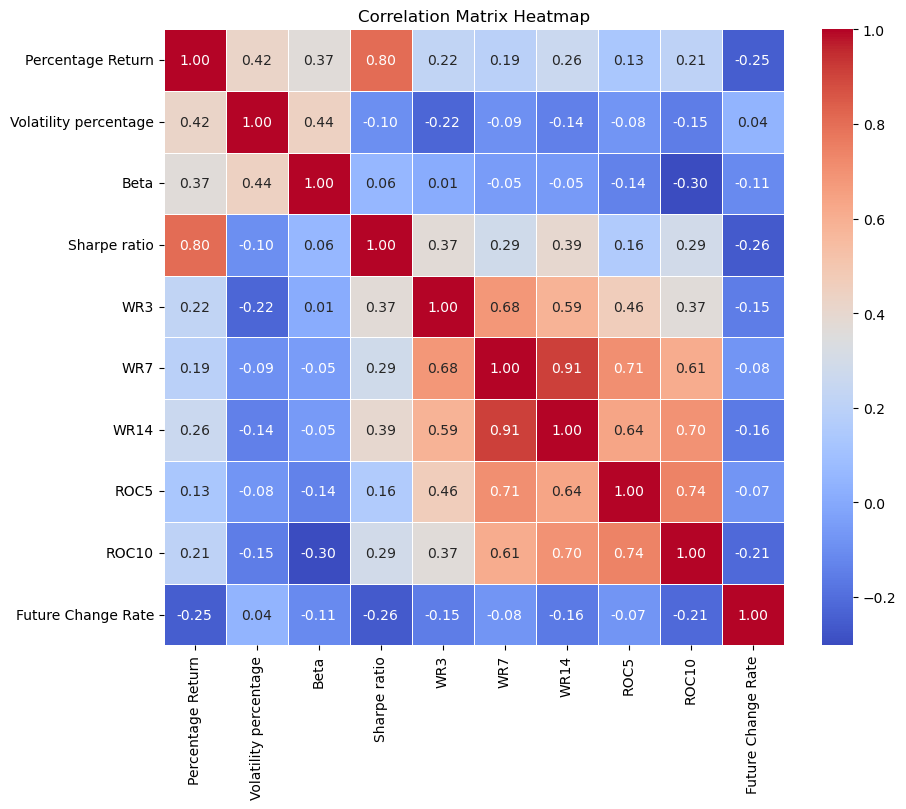

In [54]:
correlation_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- We will remove the <b>'Percentage Return'</b> and <b>'Volatility Percentage'</b> columns because they have already been used in the calculations of the beta and Sharpe ratio values.

In [55]:
combined_df2 = combined_df[['Beta','Sharpe ratio','WR3','WR7','WR14','ROC5','ROC10','Future Change Rate']]

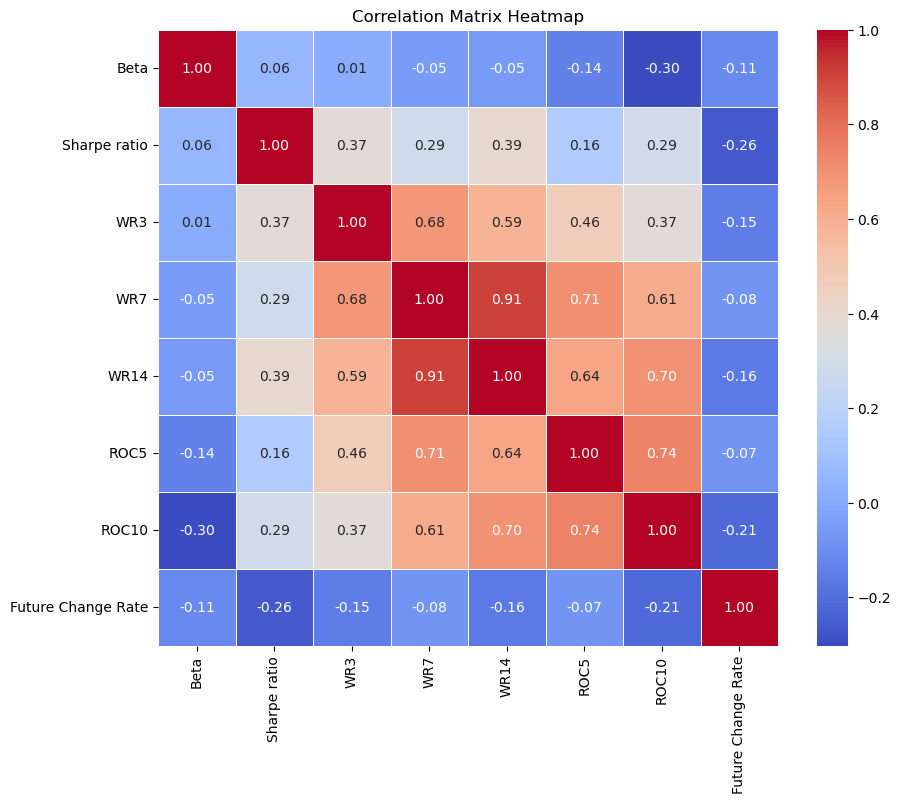

In [56]:
correlation_matrix2 = combined_df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [57]:
df_combined_clust = combined_df2.reset_index().rename(columns={'index': 'stock_name'})

In [58]:
df_combined_clust

stock_name      Beta  Sharpe ratio         WR3         WR7       WR14  \
0           A  0.975385      4.001101  -27.045548  -65.591442 -52.136773   
1          AA  1.552010      0.324778  -30.042952  -44.065060 -51.928472   
2        AACG  0.744478     -0.071229  -24.999981  -24.999981 -50.000000   
3        AACI -0.004645      0.530331  -45.436098  -50.243129 -48.595305   
4        AACT  0.006121      3.030840  -66.666667  -66.666667 -33.333863   
5        AADI  0.574460     -1.045639  -30.769248  -47.058826 -60.439565   
6        AAGR  0.068614     -1.089981  -55.555565  -47.222227 -64.814811   
7         AAL  1.392439     -1.159273  -13.333384  -50.931698 -59.693880   
8        AAMC  0.675100     -0.592757  -65.055760  -73.786406 -73.786406   
9        AAME  0.331921     -0.420810 -100.000000  -81.818202 -86.666677   
10        AAN  0.763437     -0.948745  -57.142273  -63.157657 -57.142792   
11       AAOI  1.371386     -0.558912  -51.912574  -68.292682 -70.786521   
12       AAON  0.905205      7.576918  -59.857597  -46.938784 -46.938784   
13        AAP  0.911595     -1.492528  -40.875988  -52.102122 -57.804259   
14       AAPL  1.209668     14.970119   -5.197241  -31.621617 -34.583051   
15        AAT  1.049554     -0.545319  -82.524407  -67.460335 -73.556255   
16         AB  1.177733      2.600276  -33.009640  -46.666627 -46.666627   
17       ABAT  1.138824     -0.526756  -35.294180  -18.750016 -18.750016   
18       ABBV  0.572709      7.069907  -21.471215  -36.614602 -18.000954   
19       ABCB  1.255515      2.127275  -52.360612  -61.279495 -71.416751   
20       ABCL  0.835524     -1.403678  -64.705862  -84.415568 -86.285700   
21       ABEO  1.083543     -0.939401  -86.956535  -81.250014 -87.500012   
22       ABEV  0.805028     -0.892432   -7.692308   -3.846150  -3.846150   
23        ABG  1.261185      5.144099  -38.949273  -74.020154 -75.634523   
24       ABIO  0.416351     -0.287428  -70.000018  -74.468111 -81.250014   
25        ABL  0.062829      0.220547  -21.808501  -19.294110 -24.282565   
26      ABLLL  0.011064      0.431600  -82.353106  -91.666733 -91.666733   
27       ABLV  0.205337     -0.736059  -75.999999  -71.698116 -71.698116   
28        ABM  1.025965      2.361056  -26.143846  -74.082548 -75.593935   
29       ABNB  1.064811     -0.405064  -22.314013  -84.013591 -88.500112   
30       ABOS  0.998651     -0.824115  -89.552214  -94.814802 -96.482403   
31        ABR  1.125155      2.733419  -35.185110  -25.619790 -25.619790   
32       ABSI  1.528109     -0.854424  -69.696941  -69.026533 -74.264693   
33        ABT  0.789735      2.830927  -78.111641  -60.465140 -29.283985   
34       ABTS  1.245014     -0.459272 -100.000000 -100.000000 -81.355935   
35       ABUS  1.001625     -0.086991  -10.526303  -35.185154 -48.529396   
36       ABVC -0.432348     -0.171350  -45.652101  -50.555549 -63.967614   
37       ABVX  0.215070      0.790181  -50.632986  -69.531291 -76.073659   
38         AC  0.884401     -0.053429  -18.032613  -35.151362 -33.105480   
39        ACA  1.133195      4.794975  -31.320330  -59.887788 -62.285706   
40       ACAB  0.001246      0.719769  -82.352826  -82.352826 -82.352826   
41       ACAC -0.004357      2.158816   -0.000000  -55.555673 -60.000191   
42       ACAD  0.887412     -0.092291  -43.298909  -87.327185 -87.385318   
43        ACB  1.504202     -0.916338  -56.034475  -32.338310 -32.338310   
44       ACCD  2.780722      0.206178  -96.153850  -78.947357 -82.608692   
45       ACCO  0.975733     -0.382444  -50.000099  -52.564130 -58.888906   
46       ACDC  0.816969     -1.063446  -91.457284  -95.526313 -95.629818   
47       ACEL  0.964252      0.189920  -14.999881  -71.578944 -76.623373   
48       ACET  1.081404     -1.004759  -61.538405  -80.769203 -87.804863   
49       ACGL  0.977294      8.642635   -5.714153  -27.426801 -27.426801   
50      ACGLN  0.260057     -0.434518  -77.419414  -35.460997 -41.290304   
51      ACGLO  0.384825      2.814487  -48.276157  

## Clustering 

With our dataset complete and all necessary features in place, we can now proceed to <b>clustering</b>. The first step is to determine the optimal number of clusters, which we will do using the elbow method.

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

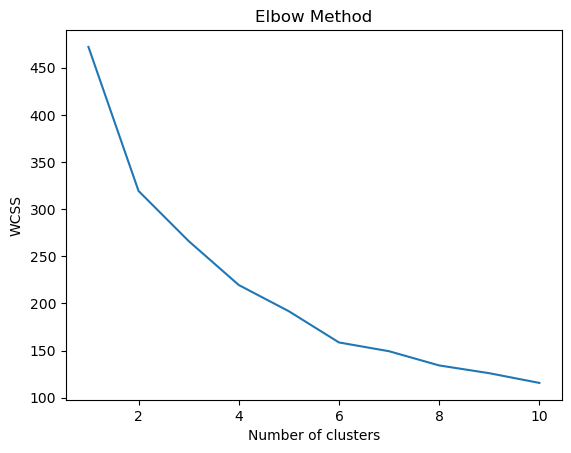

In [59]:
df_clustering = df_combined_clust[['Beta','Sharpe ratio','WR3','WR7','WR14','ROC5','ROC10','Future Change Rate']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)


wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Based on the graph, it appears that our dataset is <b>binary</b>.

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


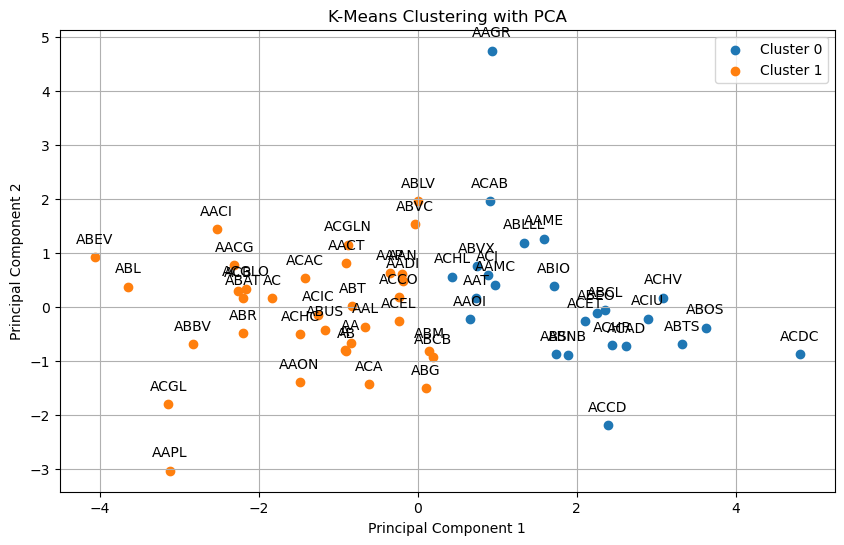

In [60]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pca_components)

df_combined_clust['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
for cluster_label in range(2):
    df_clustering = pca_components[df_combined_clust['cluster'] == cluster_label]
    plt.scatter(df_clustering[:, 0], df_clustering[:, 1], label=f'Cluster {cluster_label}')
    for i, (x, y) in enumerate(zip(df_clustering[:, 0], df_clustering[:, 1])):
        stock_name = df_combined_clust.loc[df_combined_clust['cluster'] == cluster_label].iloc[i]['stock_name']
        plt.annotate(stock_name, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()


- This graph shows the clusters and indicates which cluster each stock belongs to.

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


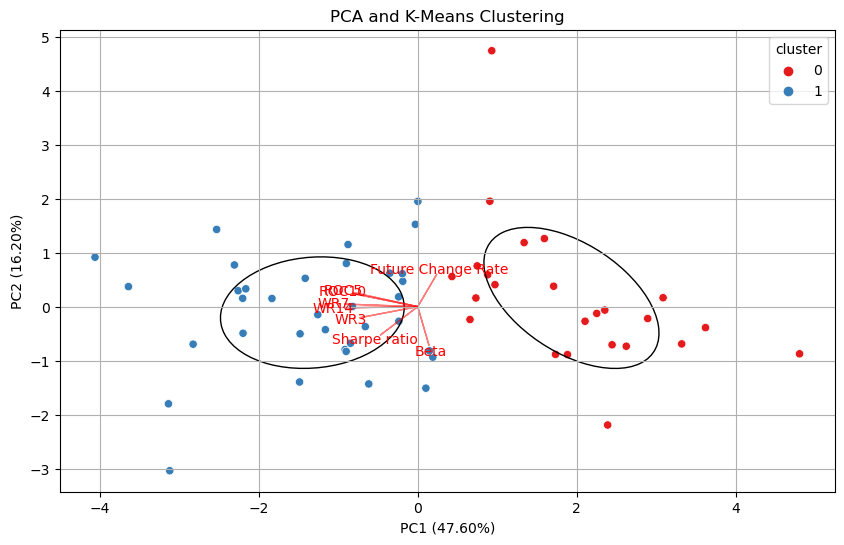

In [61]:
df_clustering = df_combined_clust[['Beta','Sharpe ratio','WR3','WR7','WR14','ROC5','ROC10','Future Change Rate']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=2, random_state=0)
df_combined_clust['cluster'] = kmeans.fit_predict(pca_components)

df_plot = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_plot['cluster'] = df_combined_clust['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_plot, palette='Set1')


for cluster_label in df_plot['cluster'].unique():
    cluster_data = df_plot[df_plot['cluster'] == cluster_label]
    covariance = np.cov(cluster_data[['PC1', 'PC2']].T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    ellipse_angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    ellipse_width, ellipse_height = 2 * np.sqrt(eigenvalues)
    ellipse = Ellipse(cluster_data[['PC1', 'PC2']].mean(),
                      width=ellipse_width, height=ellipse_height,
                      angle=ellipse_angle, edgecolor='black', facecolor='none')
    plt.gca().add_patch(ellipse)


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(df_clustering.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='red', ha='center', va='center')

plt.title('PCA and K-Means Clustering')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.show()


C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


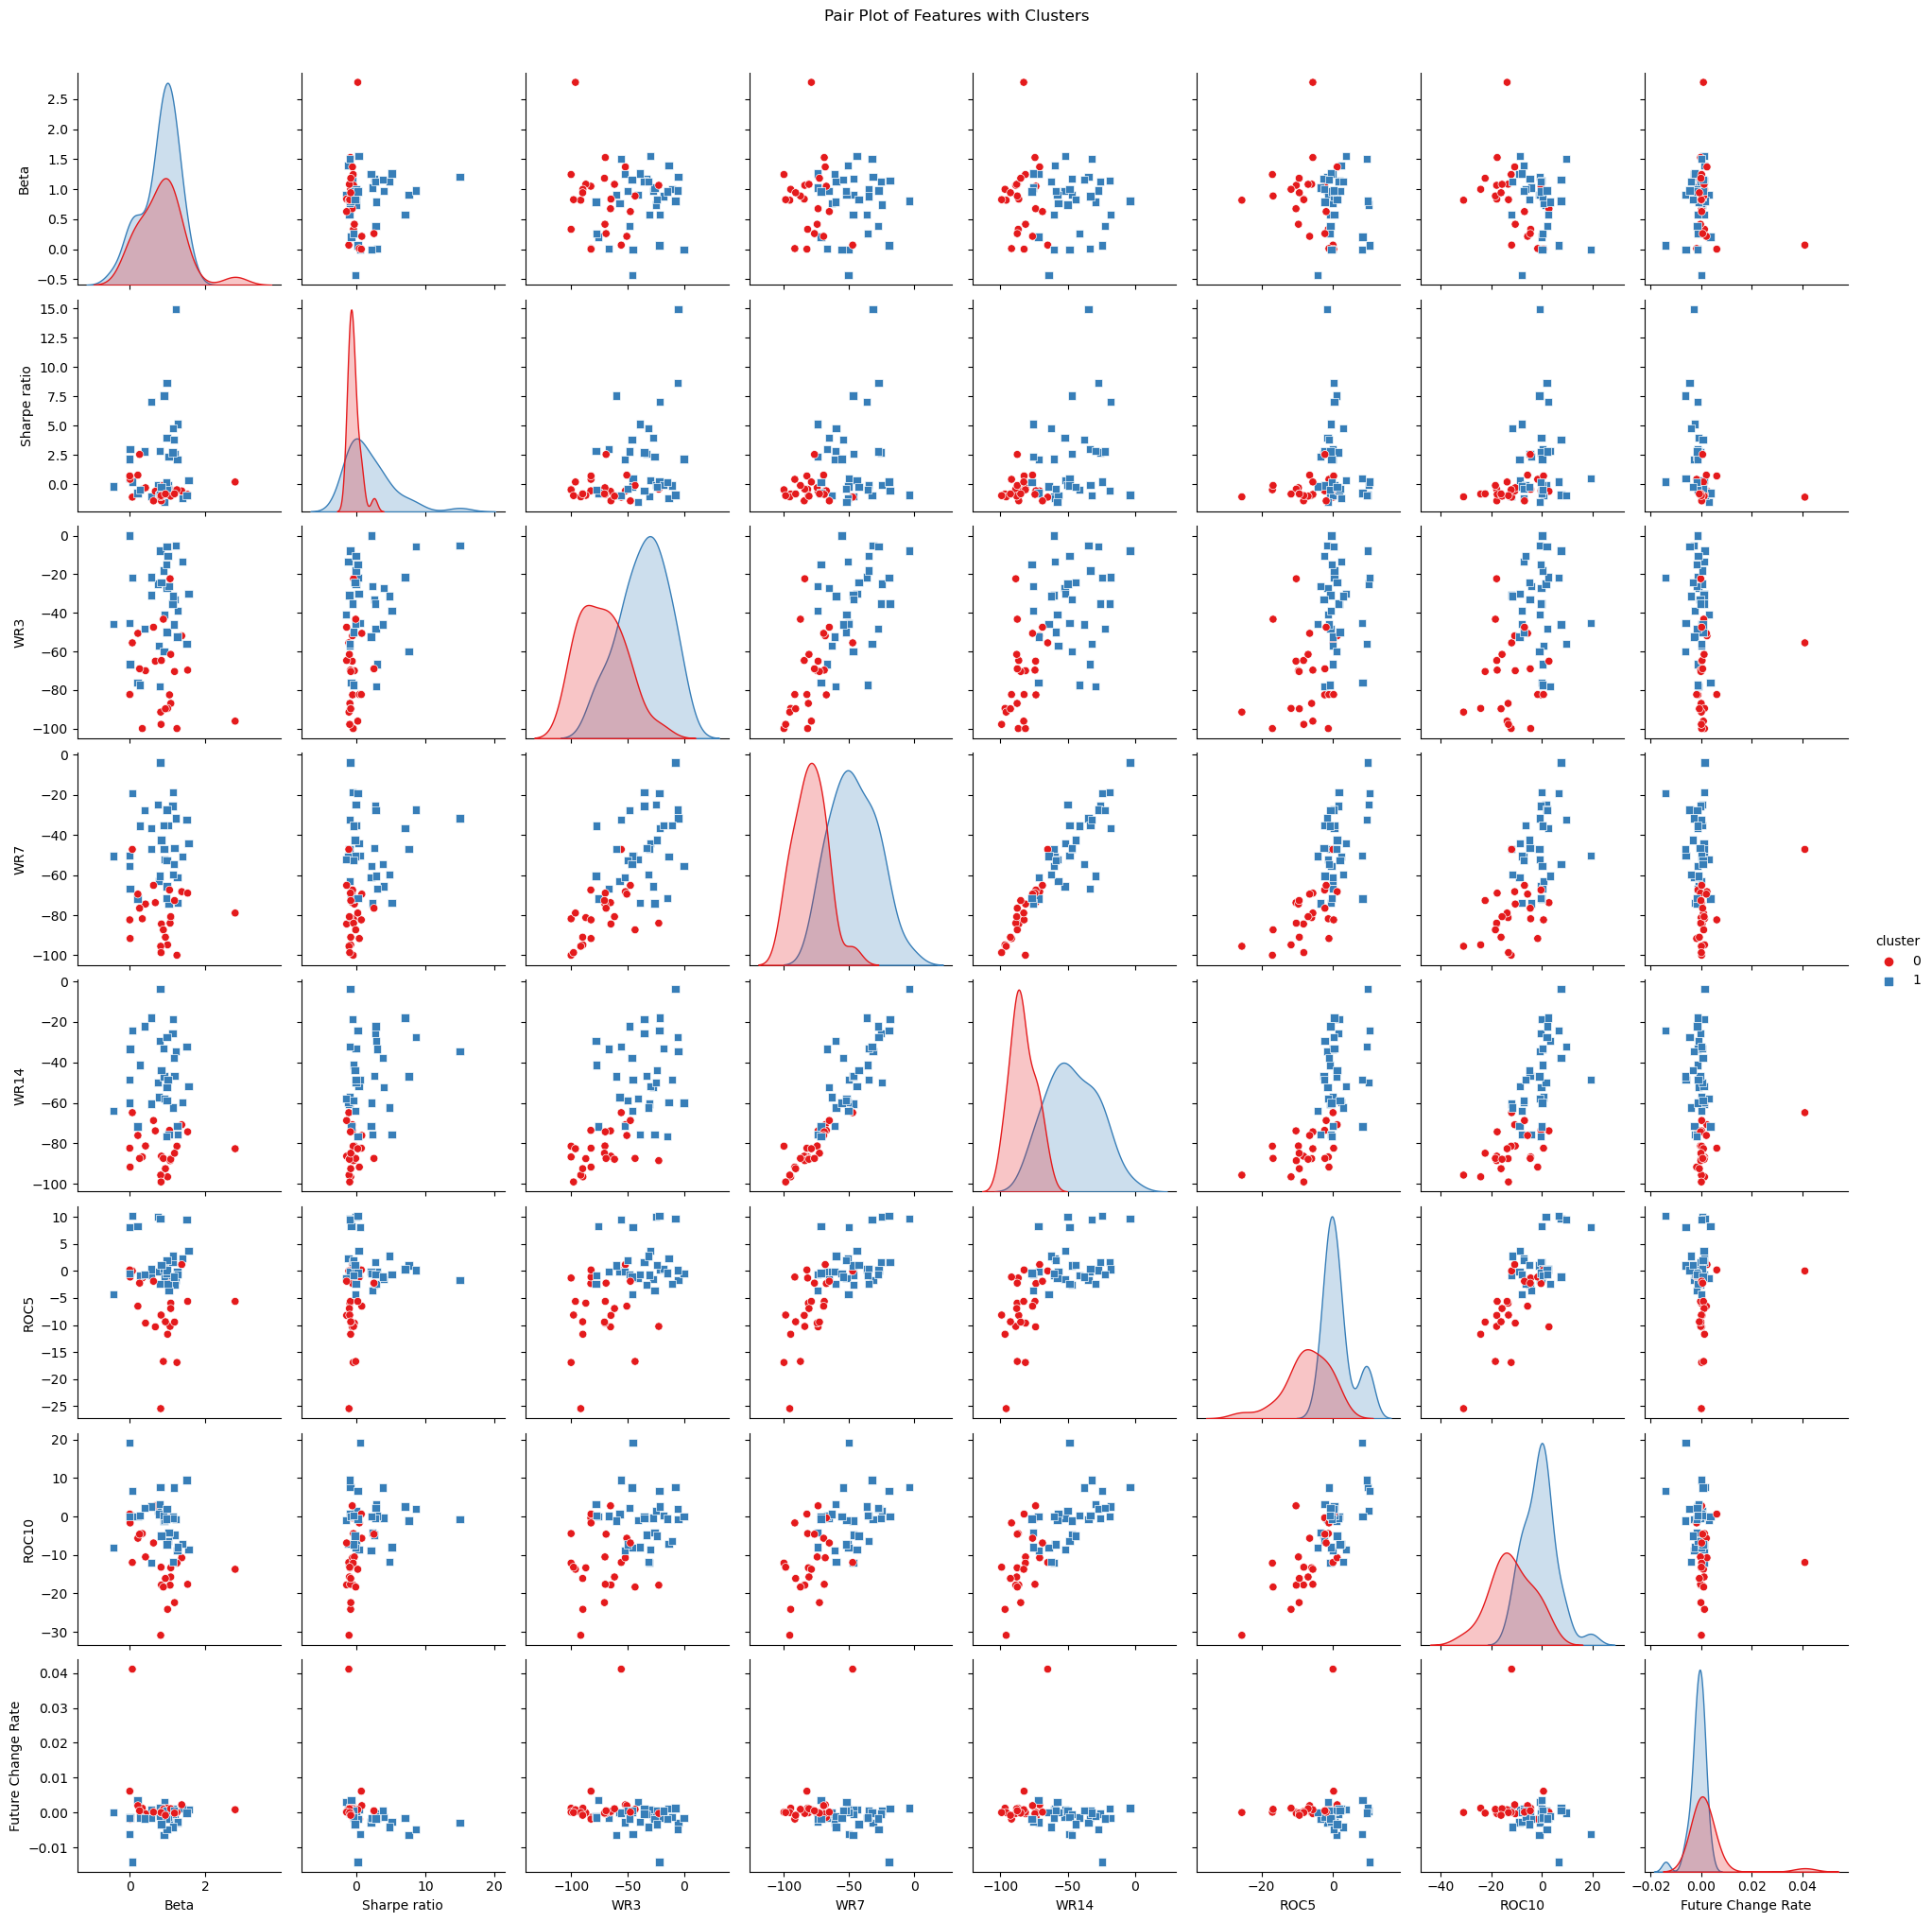

In [62]:
df_combined_clust_pca = df_combined_clust.copy() 
df_combined_clust_pca['PCA1'] = pca_components[:, 0]
df_combined_clust_pca['PCA2'] = pca_components[:, 1]

df_for_plot = df_combined_clust_pca[['Beta', 'Sharpe ratio', 'WR3', 'WR7', 'WR14', 'ROC5', 'ROC10', 'Future Change Rate', 'cluster']]

sns.pairplot(df_for_plot, hue='cluster', palette='Set1', diag_kind='kde', markers=['o', 's'])

plt.suptitle('Pair Plot of Features with Clusters', y=1.02)
plt.show()

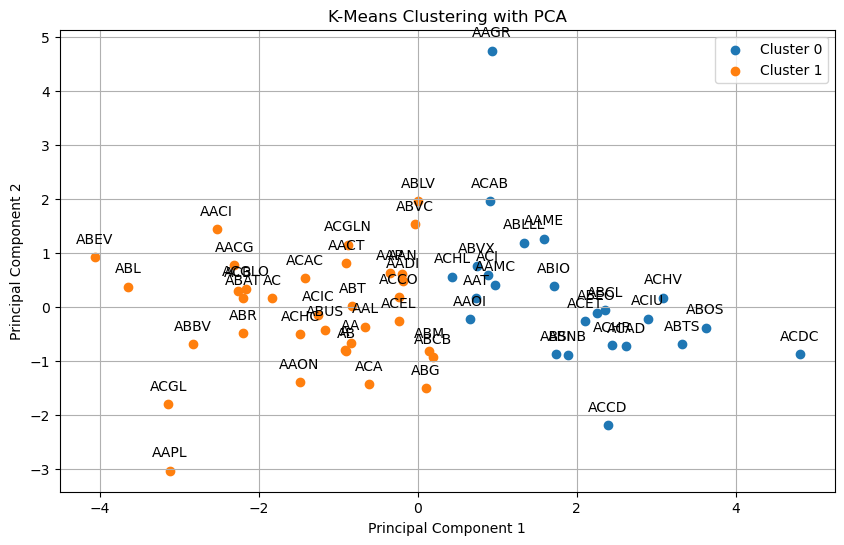

In [63]:
plt.figure(figsize=(10, 6))
for cluster_label in range(2):
    df_clustering = pca_components[df_combined_clust['cluster'] == cluster_label]
    plt.scatter(df_clustering[:, 0], df_clustering[:, 1], label=f'Cluster {cluster_label}')
    for i, (x, y) in enumerate(zip(df_clustering[:, 0], df_clustering[:, 1])):
        stock_name = df_combined_clust.loc[df_combined_clust['cluster'] == cluster_label].iloc[i]['stock_name']
        plt.annotate(stock_name, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()

- We will observe the boxplots of each feature for each cluster

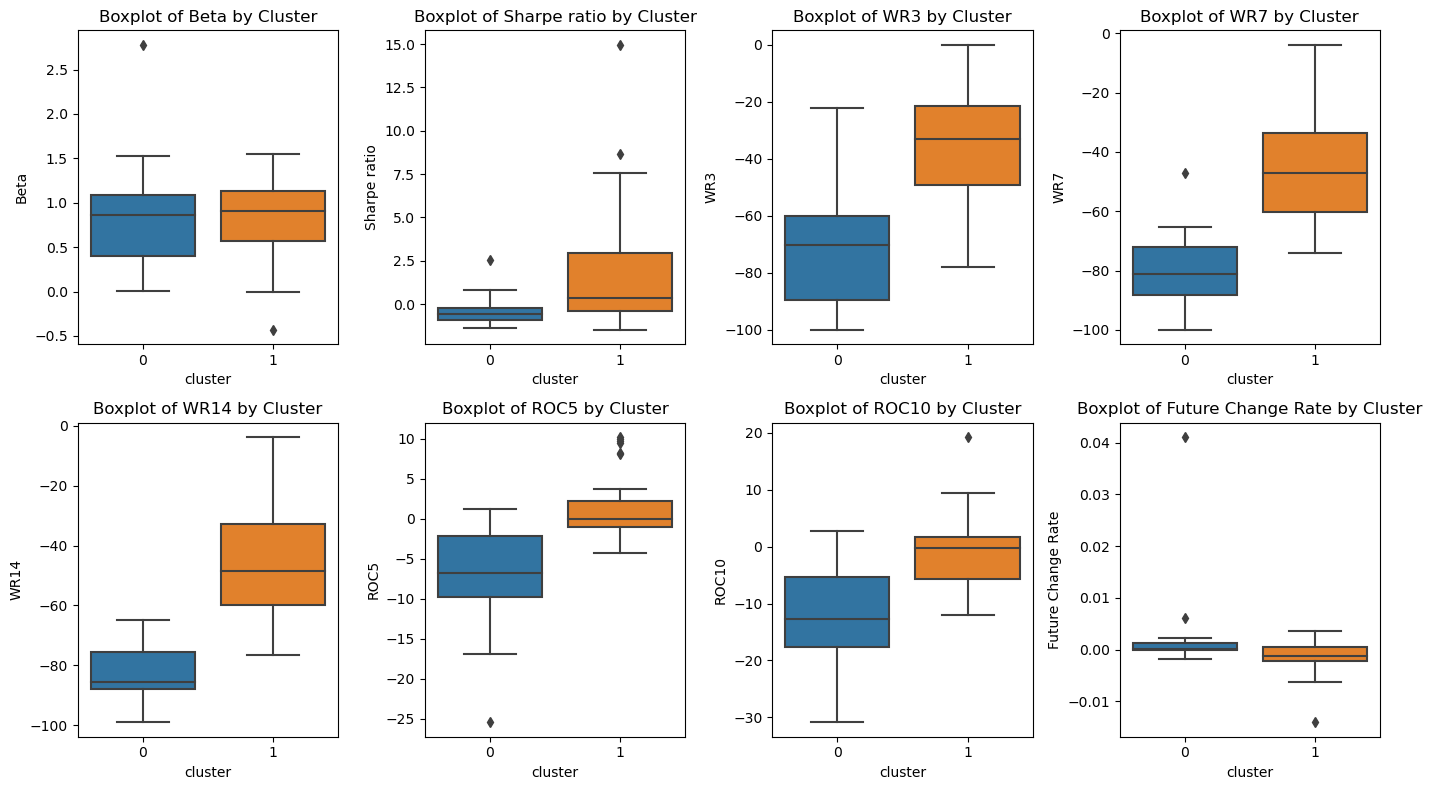

In [64]:
features = ['Beta', 'Sharpe ratio', 'WR3', 'WR7', 'WR14', 'ROC5', 'ROC10', 'Future Change Rate']

plt.figure(figsize=(14, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_combined_clust)
    plt.title(f'Boxplot of {feature} by Cluster')

plt.tight_layout()
plt.show()


From the boxplots, we can observe the following patterns for each feature across the two clusters:<br>

1.<strong>Beta:</strong></br>

- Cluster 0 generally has a higher Beta value distribution compared to Cluster 1. This suggests that the stocks in Cluster 0 tend to be more volatile relative to the market.</br>

2.<strong>Sharpe Ratio:</strong></br>

- The Sharpe Ratio is notably higher in Cluster 0, with a wider range of values. Cluster 1 has a lower and more compact distribution, indicating that the stocks in Cluster 0 have had higher risk-adjusted returns.</br>

3.<strong>WR3 (Williams %R 3 days):</strong></br>

- WR3 is higher (closer to zero) in Cluster 0 compared to Cluster 1, where the values are much lower (more negative). This indicates that stocks in Cluster 0 are less oversold in the short term compared to those in Cluster 1.</br>

4.<strong>WR7 (Williams %R 7 days):</strong></br>

- Similar to WR3, WR7 is higher in Cluster 0, indicating less oversold conditions in the medium term for Cluster 0 compared to Cluster 1.</br>

5.<strong>WR14 (Williams %R 14 days):</strong></br>

- WR14 also shows a similar trend, with Cluster 0 having higher (less negative) values than Cluster 1. Stocks in Cluster 0 are generally less oversold in the longer term compared to those in Cluster 1.</br>

6.<strong>ROC5 (Rate of Change 5 days):</strong></br>

- The ROC5 is more positive in Cluster 0, indicating that stocks in this cluster tend to have had higher short-term momentum compared to Cluster 1.</br>

7.<strong>ROC10 (Rate of Change 10 days):</strong></br>

- ROC10 follows a similar pattern as ROC5, with Cluster 0 showing higher values, suggesting stronger momentum over a slightly longer period in Cluster 0 compared to Cluster 1.</br>

8.<strong>Future Change Rate:</strong></br>

- The Future Change Rate is relatively similar between the two clusters, but Cluster 1 shows a slightly wider distribution. This suggests that the future price change potential is somewhat more variable for stocks in Cluster 1.</br>

- <strong>Cluster 0</strong>: Stocks in this cluster generally have higher volatility (Beta), better risk-adjusted returns (Sharpe Ratio), and stronger momentum (ROC) across short, medium, and long-term indicators. They are less oversold according to the Williams %R indicators.

- <strong>Cluster 1</strong>: Stocks in this cluster are characterized by lower volatility, lower risk-adjusted returns, and lower momentum. They tend to be more oversold across the Williams %R indicators, indicating potentially more buying opportunities.

In [65]:
df_cluster0 = df_combined_clust[df_combined_clust['cluster'] == 0]
df_cluster1 = df_combined_clust[df_combined_clust['cluster'] == 1]

df_clust0 = pd.DataFrame()
df_clust1 = pd.DataFrame()

###########Beta##############
df_clust0['mean beta'] = [df_cluster0['Beta'].mean()]
df_clust1['mean beta'] = [df_cluster1['Beta'].mean()]

##########Sharpe ratio#######
df_clust0['mean SR'] = [df_cluster0['Sharpe ratio'].mean()]
df_clust1['mean SR'] = [df_cluster1['Sharpe ratio'].mean()]

##########Williams######
df_clust0['mean WR3'] = [df_cluster0['WR3'].mean()]
df_clust0['mean WR7'] = [df_cluster0['WR7'].mean()]
df_clust0['mean WR14'] = [df_cluster0['WR14'].mean()]

df_clust1['mean WR3'] = [df_cluster1['WR3'].mean()]
df_clust1['mean WR7'] = [df_cluster1['WR7'].mean()]
df_clust1['mean WR14'] = [df_cluster1['WR14'].mean()]

##########ROC###########
df_clust0['mean ROC5'] = [df_cluster0['ROC5'].mean()]
df_clust0['mean ROC10'] = [df_cluster0['ROC10'].mean()]

df_clust1['mean ROC5'] = [df_cluster1['ROC5'].mean()]
df_clust1['mean ROC10'] = [df_cluster1['ROC10'].mean()]

##########Future rate############
df_clust0['mean future rate'] = [df_cluster0['Future Change Rate'].mean()]
df_clust1['mean future rate'] = [df_cluster1['Future Change Rate'].mean()]

- Here we calculated the mean of each feature in each cluster to better understand and identify our clusters.

In [66]:
df_clust0

mean beta   mean SR   mean WR3   mean WR7  mean WR14  mean ROC5  \
0   0.845831 -0.409303 -72.521871 -79.868463 -83.380984   -7.27121   

   mean ROC10  mean future rate  
0  -11.940599          0.002258

<strong>Cluster 0:</strong>
- Identification: "<strong>Defensive or Recovering Stocks</strong>"
- Characteristics: These stocks are more volatile (Beta), currently underperforming (negative Sharpe Ratio), and may be oversold (Williams %R), but they have the potential for slight future recovery. They could appeal to investors looking for conservative investments or turnaround opportunities.</br>
**Conservative : a strategy or approach that prioritizes preserving capital and minimizing risk over seeking high returns.

In [67]:
df_clust1

mean beta   mean SR   mean WR3   mean WR7  mean WR14  mean ROC5  \
0   0.802612  1.965697 -35.875286 -46.176265 -46.340889   1.368169   

   mean ROC10  mean future rate  
0   -0.932884         -0.001338

<strong>Cluster 1:</strong>
- Identification: "<strong>Growth-Oriented Stocks</strong>"
- Explanation: These stocks are characterized by lower volatility (Beta), strong risk-adjusted returns (Sharpe Ratio), and recent price growth (ROC). They may be in a stable or upward trend, making them attractive for investors seeking growth.

In [68]:
df_combined_clust = df_combined_clust.set_index("stock_name")
df_combined_clust

Beta  Sharpe ratio         WR3         WR7       WR14  \
stock_name                                                              
A           0.975385      4.001101  -27.045548  -65.591442 -52.136773   
AA          1.552010      0.324778  -30.042952  -44.065060 -51.928472   
AACG        0.744478     -0.071229  -24.999981  -24.999981 -50.000000   
AACI       -0.004645      0.530331  -45.436098  -50.243129 -48.595305   
AACT        0.006121      3.030840  -66.666667  -66.666667 -33.333863   
AADI        0.574460     -1.045639  -30.769248  -47.058826 -60.439565   
AAGR        0.068614     -1.089981  -55.555565  -47.222227 -64.814811   
AAL         1.392439     -1.159273  -13.333384  -50.931698 -59.693880   
AAMC        0.675100     -0.592757  -65.055760  -73.786406 -73.786406   
AAME        0.331921     -0.420810 -100.000000  -81.818202 -86.666677   
AAN         0.763437     -0.948745  -57.142273  -63.157657 -57.142792   
AAOI        1.371386     -0.558912  -51.912574  -68.292682 -70.786521   
AAON        0.905205      7.576918  -59.857597  -46.938784 -46.938784   
AAP         0.911595     -1.492528  -40.875988  -52.102122 -57.804259   
AAPL        1.209668     14.970119   -5.197241  -31.621617 -34.583051   
AAT         1.049554     -0.545319  -82.524407  -67.460335 -73.556255   
AB          1.177733      2.600276  -33.009640  -46.666627 -46.666627   
ABAT        1.138824     -0.526756  -35.294180  -18.750016 -18.750016   
ABBV        0.572709      7.069907  -21.471215  -36.614602 -18.000954   
ABCB        1.255515      2.127275  -52.360612  -61.279495 -71.416751   
ABCL        0.835524     -1.403678  -64.705862  -84.415568 -86.285700   
ABEO        1.083543     -0.939401  -86.956535  -81.250014 -87.500012   
ABEV        0.805028     -0.892432   -7.692308   -3.846150  -3.846150   
ABG         1.261185      5.144099  -38.949273  -74.020154 -75.634523   
ABIO        0.416351     -0.287428  -70.000018  -74.468111 -81.250014   
ABL         0.062829      0.220547  -21.808501  -19.294110 -24.282565   
ABLLL       0.011064      0.431600  -82.353106  -91.666733 -91.666733   
ABLV        0.205337     -0.736059  -75.999999  -71.698116 -71.698116   
ABM         1.025965      2.361056  -26.143846  -74.082548 -75.593935   
ABNB        1.064811     -0.405064  -22.314013  -84.013591 -88.500112   
ABOS        0.998651     -0.824115  -89.552214  -94.814802 -96.482403   
ABR         1.125155      2.733419  -35.185110  -25.619790 -25.619790   
ABSI        1.528109     -0.854424  -69.696941  -69.026533 -74.264693   
ABT         0.789735      2.830927  -78.111641  -60.465140 -29.283985   
ABTS        1.245014     -0.459272 -100.000000 -100.000000 -81.355935   
ABUS        1.001625     -0.086991  -10.526303  -35.185154 -48.529396   
ABVC       -0.432348     -0.171350  -45.652101  -50.555549 -63.967614   
ABVX        0.215070      0.790181  -50.632986  -69.531291 -76.073659   
AC          0.884401     -0.053429  -18.032613  -35.151362 -33.105480   
ACA         1.133195      4.794975  -31.320330  -59.887788 -62.285706   
ACAB        0.001246      0.719769  -82.352826  -82.352826 -82.352826   
ACAC       -0.004357      2.158816   -0.000000  -55.555673 -60.000191   
ACAD        0.887412     -0.092291  -43.298909  -87.327185 -87.385318   
ACB         1.504202     -0.916338  -56.034475  -32.338310 -32.338310   
ACCD        2.780722      0.206178  -96.153850  -78.947357 -82.608692   
ACCO        0.975733     -0.382444  -50.000099  -52.564130 -58.888906   
ACDC        0.816969     -1.063446  -91.457284  -95.526313 -95.629818   
ACEL        0.964252      0.189920  -14.999881  -71.578944 -76.623373   
ACET        1.081404     -1.004759  -61.538405  -80.769203 -87.804863   
ACGL        0.977294      8.642635   -5.714153  -27.426801 -27.426801   
ACGLN       0.260057     -0.434518  -77.419414  -35.460997 -41.290304   
ACGLO       0.384825      2.814487  -48.276157  -27.586513 -22.222428   
ACHC        1.160565      3.821497  -46.090328  -54.580590 -37.937202   
A

## IV.Modeling & Evaluation

### Classification

After completing the clustering, we need to determine which classification model to use.

In [69]:
X = df_combined_clust.drop(columns=['cluster'])
y = df_combined_clust['cluster']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Some of the models we will work on require scaling.

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- We will work with different classification models and choose the one with the best performance.

In [72]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

classifiers_2 = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

### Training and Evaluating Distance-Based Models


Logistic Regression:



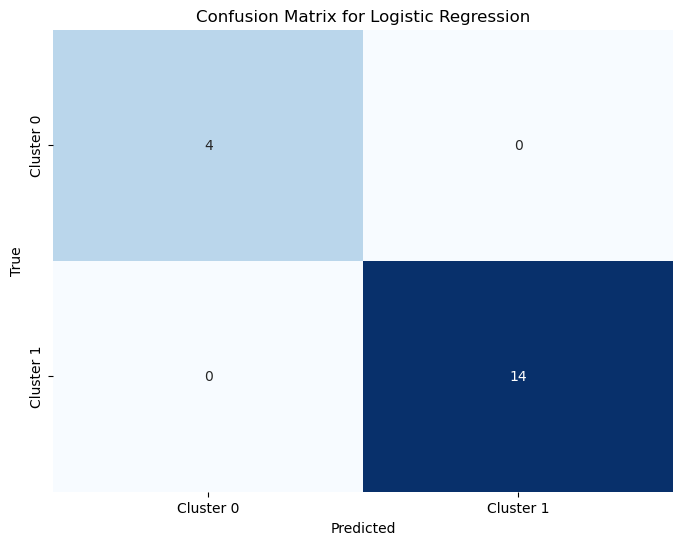

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

F1 Score: 1.0

Support Vector Classifier:



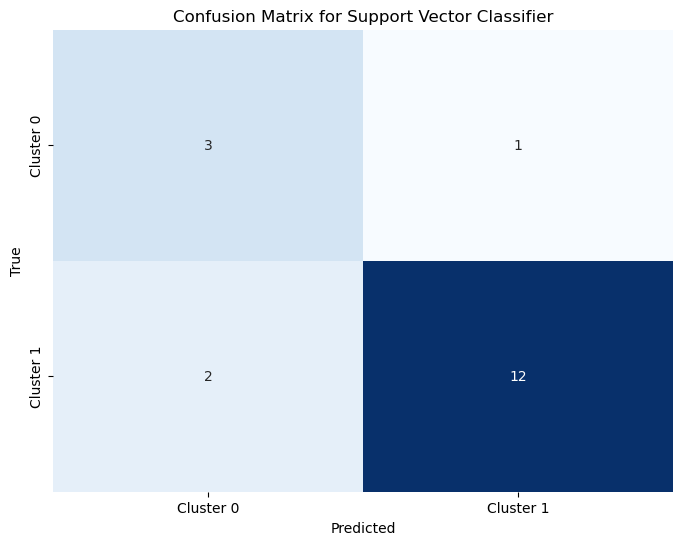

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.92      0.86      0.89        14

    accuracy                           0.83        18
   macro avg       0.76      0.80      0.78        18
weighted avg       0.85      0.83      0.84        18

F1 Score: 0.888888888888889

K-Nearest Neighbors:



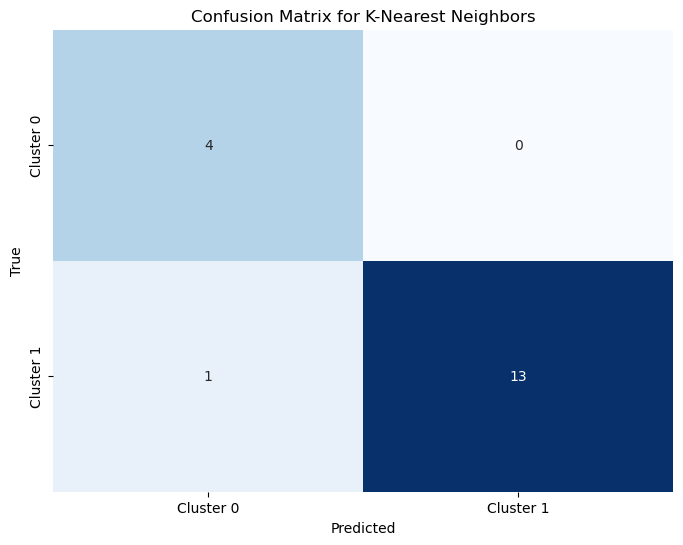

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18

F1 Score: 0.962962962962963


In [73]:
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    print(f'\n{name}:\n')
    
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Cluster 0', 'Cluster 1'],
                yticklabels=['Cluster 0', 'Cluster 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    

    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

<b> Interpretation </b>

1.Logistic Regression:
- achieved perfect scores on your test set, indicating that it predicted all instances correctly. However, this may indicate <b>overfitting</b> because it performed perfectly on the training data and the small test set.

2.Support Vector Machine (SVM):
- The model performed well on class 1 but struggled with class 0, which is reflected in the lower precision, recall, and F1-score for class 0. This suggests that the SVM may be <b>biased toward the majority class (class 1)</b>, which is typical when dealing with imbalanced datasets.

3.K-Nearest Neighbors (KNN):
- KNN performed very well, especially in correctly classifying the minority class (class 0). The slightly lower precision for class 0 suggests that it had one false positive. Overall, this model is <b>well-balanced</b> in terms of both precision and recall.

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='f1_weighted')
print(f'Cross-Validation F1 Scores: {scores}')
print(f'Mean F1 Score: {scores.mean()}')


Cross-Validation F1 Scores: [0.91481481 1.         0.74475524 1.         1.        ]
Mean F1 Score: 0.9319140119140119


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

- The cross-validation F1 scores range from 0.74 to 1.0, with a mean F1 score of approximately 0.93. The variance in these scores indicates that the model's performance is not consistent across different folds of the data. This inconsistency further supports the possibility of <b>overfitting</b>.

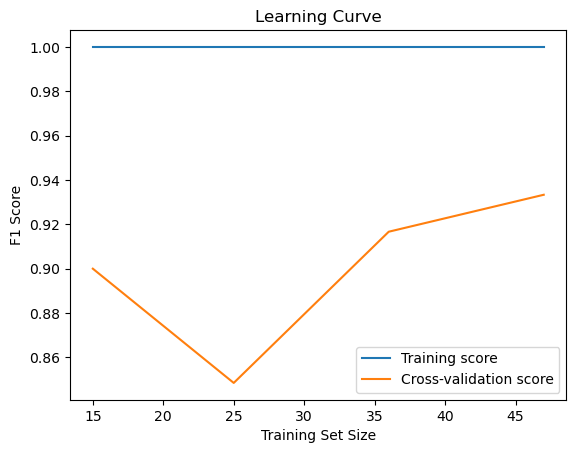

In [75]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=5, n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


<b> Interpretation </b>

- Training Score (Blue Line): The training score is consistently at 1.0, which indicates that the model is perfectly fitting the training data, likely memorizing it without generalizing well.
- Cross-Validation Score (Orange Line): The cross-validation score is lower and fluctuates as the training set size increases. The dip and rise in the cross-validation score suggest that this model is indeed <b>overfitting</b> to the training data.

### Training and Evaluating Tree-Based Models


Decision Tree:



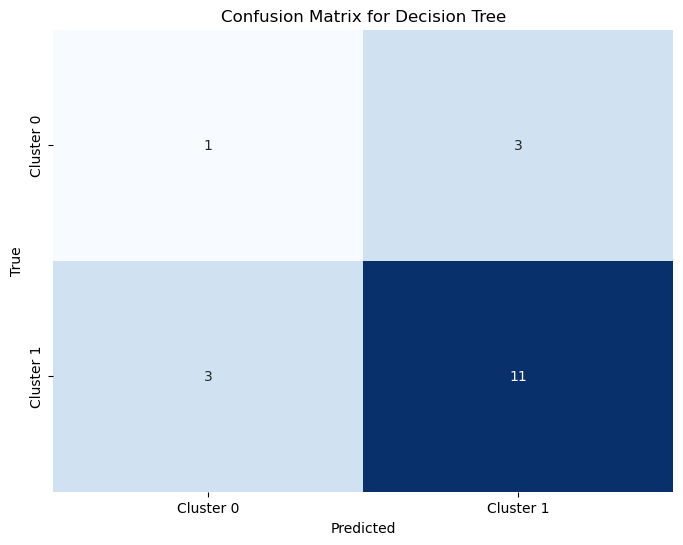

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.79      0.79      0.79        14

    accuracy                           0.67        18
   macro avg       0.52      0.52      0.52        18
weighted avg       0.67      0.67      0.67        18

F1 Score: 0.7857142857142857

Random Forest:



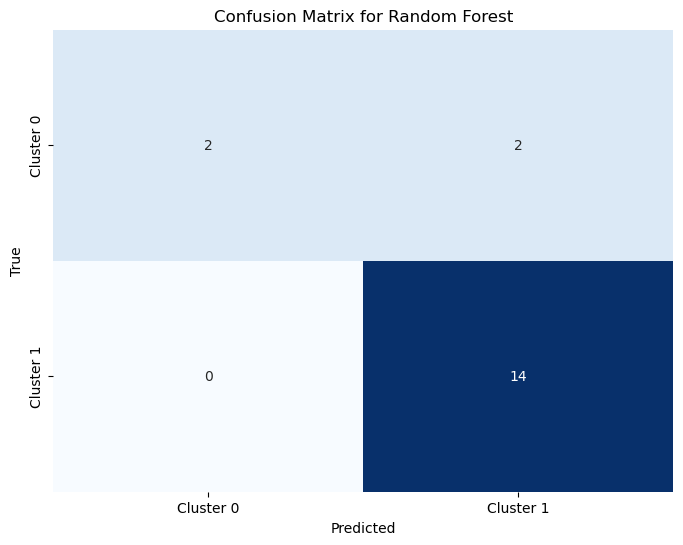

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.88      1.00      0.93        14

    accuracy                           0.89        18
   macro avg       0.94      0.75      0.80        18
weighted avg       0.90      0.89      0.87        18

F1 Score: 0.9333333333333333


In [76]:
for name, clf in classifiers_2.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(f'\n{name}:\n')
    
   
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Cluster 0', 'Cluster 1'],
                yticklabels=['Cluster 0', 'Cluster 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

<b> Interpretation </b>

4.Decision Tree:
- The Decision Tree struggled significantly, especially with the minority class (class 0). It <b>misclassified several instances</b>, leading to <b>low precision, recall, and F1-scores</b>. The model might benefit from tuning or using ensemble methods.

5.Random Forest:
- <b>performed well overall</b> but had issues with recall for class 0. This indicates that while it was very precise when it predicted class 0, it often missed class 0 instances, likely due to an imbalance in the dataset.

<strong>Conclusion</strong>:</br>

- <b>KNN and Random Forest</b> appear to be the most <b>balanced models</b>, with KNN having a slightly higher F1 score but potentially more variability depending on the size of the dataset.

In [77]:
model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)
scores = cross_val_score(model_1, X_train, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9027777777777779


In [78]:
model_2 = KNeighborsClassifier()
model_2.fit(X_train_scaled, y_train)
scores = cross_val_score(model_2, X_train_scaled, y_train, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9277777777777778


### Save the Best model

In [79]:
import joblib

joblib.dump(model_2, 'best_Class_model.pkl')  

['best_Class_model.pkl']